In [47]:
import pandas as pd
import numpy as np

### Data collection of 30 crypto currencies

In [48]:
import yfinance as yf, pandas as pd, glob, os, time, sys
from pathlib import Path
from datetime import datetime
from dateutil.relativedelta import relativedelta
import shutil

from pathlib import Path

if "__file__" in globals():
    PROJECT_ROOT = Path(__file__).resolve().parents[1]  
else:
    PROJECT_ROOT = Path.cwd().parent  

print("Project root:", PROJECT_ROOT)


OUT_DIR = PROJECT_ROOT / "dataset" / "30_cryptosets"

if OUT_DIR.exists():
    shutil.rmtree(OUT_DIR)
OUT_DIR.mkdir(parents=True, exist_ok=True)

print(f"Emptied folder: {OUT_DIR}")
OUT_DIR.mkdir(parents=True, exist_ok=True)


name_to_ticker = {
    "Aave": "AAVE-USD","Cardano": "ADA-USD","Algorand": "ALGO-USD","Arweave": "AR-USD",
    "Cosmos": "ATOM-USD","Avalanche": "AVAX-USD","Binance Coin": "BNB-USD","Bitcoin": "BTC-USD",
    "PancakeSwap": "CAKE-USD","Litecoin": "LTC-USD","Curve DAO Token": "CRV-USD","Dash": "DASH-USD",
    "Dogecoin": "DOGE-USD","Enjin Coin": "ENJ-USD","EOS": "EOS-USD","Ethereum": "ETH-USD",
    "Filecoin": "FIL-USD","Internet Computer": "ICP-USD","Chainlink": "LINK-USD","Monero": "XMR-USD",
    "NEO": "NEO-USD","Shiba Inu": "SHIB-USD","Solana": "SOL-USD","TRON": "TRX-USD",
    "VeChain": "VET-USD","Stellar": "XLM-USD","Zcash": "ZEC-USD","The Sandbox": "SAND-USD",
    "Decentraland": "MANA-USD","Quant": "QNT-USD"
}

tickers = list(name_to_ticker.values())
end_date = datetime.today().date()
start_date = (end_date - relativedelta(years=4)).isoformat()
end_date = end_date.isoformat()

for i, (name, ticker) in enumerate(name_to_ticker.items(), 1):
    out_path = OUT_DIR / f"{ticker}.csv"
    try:
        df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)
        if df is None or df.empty:
            print(f"[{i}/{len(tickers)}] WARNING: no data for {ticker}")
            continue
        if isinstance(df.columns, pd.MultiIndex):
            df.columns = [' '.join([str(x) for x in col if str(x) != '']).strip() for col in df.columns.values]
        df = df.reset_index()
        rename_map = {}
        for c in df.columns:
            lc = c.lower()
            if 'date' in lc: rename_map[c] = 'Date'
            elif lc.startswith('open'): rename_map[c] = 'Open'
            elif lc.startswith('high'): rename_map[c] = 'High'
            elif lc.startswith('low'): rename_map[c] = 'Low'
            elif 'adj' in lc and 'close' in lc: rename_map[c] = 'Adj Close'
            elif lc.startswith('close'): rename_map[c] = 'Close'
            elif 'volume' in lc: rename_map[c] = 'Volume'
        df = df.rename(columns=rename_map)
        df["Name"] = name
        df["Symbol"] = ticker
        ordered = ["Date","Name","Symbol","Open","High","Low","Close","Adj Close","Volume"]
        df = df[[c for c in ordered if c in df.columns]]
        df.to_csv(out_path, index=False)
        print(f"[{i}/{len(tickers)}] Saved {name} ({ticker}) rows:{len(df)}")
        time.sleep(1)
    except KeyboardInterrupt:
        print("Interrupted"); sys.exit(1)
    except Exception as e:
        print(f"[{i}/{len(tickers)}] ERROR {ticker}: {e}"); time.sleep(1)

data_path = PROJECT_ROOT / "dataset" / "30_cryptosets"
save_path = PROJECT_ROOT / "dataset" / "final_dataset.csv"

all_files = glob.glob(os.path.join(data_path, "*.csv"))
final_df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
final_df = final_df.sort_values(["Symbol","Date"]).reset_index(drop=True)
final_df.to_csv(save_path, index=False)

print(f"\nMerged {len(all_files)} files.")
print(f"Final shape: {final_df.shape}")
print(f"Saved merged dataset to: {save_path}")

Project root: c:\Users\metalvampire77\Desktop\solent university\programming_for_problem_solving\com724
Emptied folder: c:\Users\metalvampire77\Desktop\solent university\programming_for_problem_solving\com724\dataset\30_cryptosets


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[1/30] Saved Aave (AAVE-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[2/30] Saved Cardano (ADA-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[3/30] Saved Algorand (ALGO-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[4/30] Saved Arweave (AR-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[5/30] Saved Cosmos (ATOM-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[6/30] Saved Avalanche (AVAX-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[7/30] Saved Binance Coin (BNB-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[8/30] Saved Bitcoin (BTC-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[9/30] Saved PancakeSwap (CAKE-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[10/30] Saved Litecoin (LTC-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[11/30] Saved Curve DAO Token (CRV-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[12/30] Saved Dash (DASH-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[13/30] Saved Dogecoin (DOGE-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[14/30] Saved Enjin Coin (ENJ-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[15/30] Saved EOS (EOS-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[16/30] Saved Ethereum (ETH-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[17/30] Saved Filecoin (FIL-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[18/30] Saved Internet Computer (ICP-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[19/30] Saved Chainlink (LINK-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[20/30] Saved Monero (XMR-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[21/30] Saved NEO (NEO-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[22/30] Saved Shiba Inu (SHIB-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[23/30] Saved Solana (SOL-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[24/30] Saved TRON (TRX-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[25/30] Saved VeChain (VET-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[26/30] Saved Stellar (XLM-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[27/30] Saved Zcash (ZEC-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[28/30] Saved The Sandbox (SAND-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[29/30] Saved Decentraland (MANA-USD) rows:1461


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\4057187945.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[30/30] Saved Quant (QNT-USD) rows:1461

Merged 30 files.
Final shape: (43830, 8)
Saved merged dataset to: c:\Users\metalvampire77\Desktop\solent university\programming_for_problem_solving\com724\dataset\final_dataset.csv


In [49]:
file_path = PROJECT_ROOT / "dataset" / "final_dataset.csv"
df = pd.read_csv(file_path)

In [50]:
df.head()

Date  Name    Symbol        Open        High         Low       Close  \
0  2022-01-16  Aave  AAVE-USD  239.296478  244.664581  231.571823  241.747620   
1  2022-01-17  Aave  AAVE-USD  241.900726  243.494461  221.965958  226.931946   
2  2022-01-18  Aave  AAVE-USD  226.937454  240.094894  223.860596  232.465759   
3  2022-01-19  Aave  AAVE-USD  232.455414  235.590286  211.016129  211.251526   
4  2022-01-20  Aave  AAVE-USD  211.210342  220.631638  198.583542  198.596115   

      Volume  
0  333448922  
1  351558593  
2  546952886  
3  329946754  
4  190061350

#Data Preprocessing

In [51]:
missing_data = df.isnull().sum()

print("Missing data per column:")
print(missing_data)

Missing data per column:
Date      0
Name      0
Symbol    0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [52]:
df.dtypes

Date       object
Name       object
Symbol     object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Name'] = df['Name'].astype('string')
df['Symbol'] = df['Symbol'].astype('string')
df['Volume'] = df['Volume'].astype(float)

df.dtypes

Date      datetime64[ns]
Name      string[python]
Symbol    string[python]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [54]:
duplicate_rows_all = df[df.duplicated(keep=False)]

num_duplicate_rows_all = len(duplicate_rows_all)
print(f"Number of duplicate rows across all columns: {num_duplicate_rows_all}")

print("\nDuplicate rows across all columns:")
display(duplicate_rows_all)

Number of duplicate rows across all columns: 0

Duplicate rows across all columns:


Empty DataFrame
Columns: [Date, Name, Symbol, Open, High, Low, Close, Volume]
Index: []

In [55]:
df.head()

Date  Name    Symbol        Open        High         Low       Close  \
0 2022-01-16  Aave  AAVE-USD  239.296478  244.664581  231.571823  241.747620   
1 2022-01-17  Aave  AAVE-USD  241.900726  243.494461  221.965958  226.931946   
2 2022-01-18  Aave  AAVE-USD  226.937454  240.094894  223.860596  232.465759   
3 2022-01-19  Aave  AAVE-USD  232.455414  235.590286  211.016129  211.251526   
4 2022-01-20  Aave  AAVE-USD  211.210342  220.631638  198.583542  198.596115   

        Volume  
0  333448922.0  
1  351558593.0  
2  546952886.0  
3  329946754.0  
4  190061350.0

In [56]:
import pandas as pd

all_dates = pd.date_range(start=df["Date"].min(), end=df["Date"].max(), freq="D")

aligned = []
for sym, df_sym in df.groupby("Symbol"):
    df_sym = df_sym.set_index("Date").reindex(all_dates)
    df_sym["Symbol"] = sym
    df_sym = df_sym.ffill().bfill().reset_index().rename(columns={"index": "Date"})
    aligned.append(df_sym)

df = pd.concat(aligned).sort_values(["Symbol", "Date"]).reset_index(drop=True)

print("Reindexed shape:", df.shape)
print("Date range:", df['Date'].min(), "to", df['Date'].max())

Reindexed shape: (43830, 8)
Date range: 2022-01-16 00:00:00 to 2026-01-15 00:00:00


In [ ]:

df.to_csv(PROJECT_ROOT / "dataset" / "main_crypto_dataset.csv", index=False)


### Exploratory data analysis

In [58]:
df['Symbol'] = df['Symbol'].astype('string')

In [59]:
print(f'rows and columns {df.shape}')#
print(df.dtypes)
print(df.Symbol.unique())
df.head()

rows and columns (43830, 8)
Date      datetime64[ns]
Name      string[python]
Symbol    string[python]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object
<StringArray>
['AAVE-USD',  'ADA-USD', 'ALGO-USD',   'AR-USD', 'ATOM-USD', 'AVAX-USD',
  'BNB-USD',  'BTC-USD', 'CAKE-USD',  'CRV-USD', 'DASH-USD', 'DOGE-USD',
  'ENJ-USD',  'EOS-USD',  'ETH-USD',  'FIL-USD',  'ICP-USD', 'LINK-USD',
  'LTC-USD', 'MANA-USD',  'NEO-USD',  'QNT-USD', 'SAND-USD', 'SHIB-USD',
  'SOL-USD',  'TRX-USD',  'VET-USD',  'XLM-USD',  'XMR-USD',  'ZEC-USD']
Length: 30, dtype: string


Date  Name    Symbol        Open        High         Low       Close  \
0 2022-01-16  Aave  AAVE-USD  239.296478  244.664581  231.571823  241.747620   
1 2022-01-17  Aave  AAVE-USD  241.900726  243.494461  221.965958  226.931946   
2 2022-01-18  Aave  AAVE-USD  226.937454  240.094894  223.860596  232.465759   
3 2022-01-19  Aave  AAVE-USD  232.455414  235.590286  211.016129  211.251526   
4 2022-01-20  Aave  AAVE-USD  211.210342  220.631638  198.583542  198.596115   

        Volume  
0  333448922.0  
1  351558593.0  
2  546952886.0  
3  329946754.0  
4  190061350.0

In [60]:
df.describe()

Date           Open           High            Low  \
count                43830   43830.000000   43830.000000   43830.000000   
mean   2024-01-16 00:00:00    2013.997383    2050.416942    1976.540370   
min    2022-01-16 00:00:00       0.000007       0.000007       0.000006   
25%    2023-01-16 00:00:00       0.350514       0.361138       0.338848   
50%    2024-01-16 00:00:00       6.179850       6.370254       5.964960   
75%    2025-01-15 00:00:00      67.387598      69.529768      65.340033   
max    2026-01-15 00:00:00  124752.140625  126198.070312  123196.046875   
std                    NaN   11759.678404   11958.302339   11553.543943   

               Close        Volume  
count   43830.000000  4.383000e+04  
mean     2015.218419  2.147574e+09  
min         0.000007  9.010100e+04  
25%         0.350361  5.684967e+07  
50%         6.174327  1.509456e+08  
75%        67.375471  5.048635e+08  
max    124752.531250  1.817464e+11  
std     11766.585019  8.268701e+09

In [ ]:
df.groupby('Symbol')['Date'].agg(['min', 'max'])

min        max
Symbol                        
AAVE-USD 2022-01-16 2026-01-15
ADA-USD  2022-01-16 2026-01-15
ALGO-USD 2022-01-16 2026-01-15
AR-USD   2022-01-16 2026-01-15
ATOM-USD 2022-01-16 2026-01-15
AVAX-USD 2022-01-16 2026-01-15
BNB-USD  2022-01-16 2026-01-15
BTC-USD  2022-01-16 2026-01-15
CAKE-USD 2022-01-16 2026-01-15
CRV-USD  2022-01-16 2026-01-15
DASH-USD 2022-01-16 2026-01-15
DOGE-USD 2022-01-16 2026-01-15
ENJ-USD  2022-01-16 2026-01-15
EOS-USD  2022-01-16 2026-01-15
ETH-USD  2022-01-16 2026-01-15
FIL-USD  2022-01-16 2026-01-15
ICP-USD  2022-01-16 2026-01-15
LINK-USD 2022-01-16 2026-01-15
LTC-USD  2022-01-16 2026-01-15
MANA-USD 2022-01-16 2026-01-15
NEO-USD  2022-01-16 2026-01-15
QNT-USD  2022-01-16 2026-01-15
SAND-USD 2022-01-16 2026-01-15
SHIB-USD 2022-01-16 2026-01-15
SOL-USD  2022-01-16 2026-01-15
TRX-USD  2022-01-16 2026-01-15
VET-USD  2022-01-16 2026-01-15
XLM-USD  2022-01-16 2026-01-15
XMR-USD  2022-01-16 2026-01-15
ZEC-USD  2022-01-16 2026-01-15

In [ ]:
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df[numeric_cols].agg(['mean', 'median', 'std', 'min', 'max'])

Open           High            Low          Close  \
mean      2013.997383    2050.416942    1976.540370    2015.218419   
median       6.179850       6.370254       5.964960       6.174327   
std      11759.678404   11958.302339   11553.543943   11766.585019   
min          0.000007       0.000007       0.000006       0.000007   
max     124752.140625  126198.070312  123196.046875  124752.531250   

              Volume  
mean    2.147574e+09  
median  1.509456e+08  
std     8.268701e+09  
min     9.010100e+04  
max     1.817464e+11

In [ ]:
df.groupby('Symbol')['Close'].std().sort_values(ascending=False)


Symbol
BTC-USD     32518.342575
ETH-USD       868.524093
BNB-USD       231.800196
ZEC-USD       104.744906
AAVE-USD       79.739322
XMR-USD        78.718387
SOL-USD        69.238575
QNT-USD        23.848614
DASH-USD       22.999684
LTC-USD        20.183292
AVAX-USD       17.728604
AR-USD         10.547367
ATOM-USD        6.289956
LINK-USD        5.354079
NEO-USD         4.692622
FIL-USD         4.637986
ICP-USD         4.554495
CAKE-USD        1.675208
SAND-USD        0.802816
CRV-USD         0.614163
MANA-USD        0.580446
EOS-USD         0.518850
ENJ-USD         0.394342
ADA-USD         0.240473
ALGO-USD        0.193299
XLM-USD         0.108324
TRX-USD         0.092601
DOGE-USD        0.079445
VET-USD         0.012505
SHIB-USD        0.000006
Name: Close, dtype: float64

In [ ]:
df.groupby('Symbol')['Close'].mean().sort_values(ascending=False)


Symbol
BTC-USD     56668.538853
ETH-USD      2471.485330
BNB-USD       480.992790
XMR-USD       195.876766
AAVE-USD      139.222313
SOL-USD       103.019777
QNT-USD       101.743068
LTC-USD        84.239062
ZEC-USD        74.280033
DASH-USD       41.694572
AVAX-USD       27.589662
AR-USD         13.975315
LINK-USD       12.668457
NEO-USD        10.604550
ATOM-USD        9.376074
ICP-USD         7.753401
FIL-USD         5.705256
CAKE-USD        3.086866
EOS-USD         0.891146
CRV-USD         0.822931
SAND-USD        0.710043
MANA-USD        0.605892
ADA-USD         0.548620
ENJ-USD         0.370405
ALGO-USD        0.262914
XLM-USD         0.178704
TRX-USD         0.145232
DOGE-USD        0.136255
VET-USD         0.028272
SHIB-USD        0.000014
Name: Close, dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


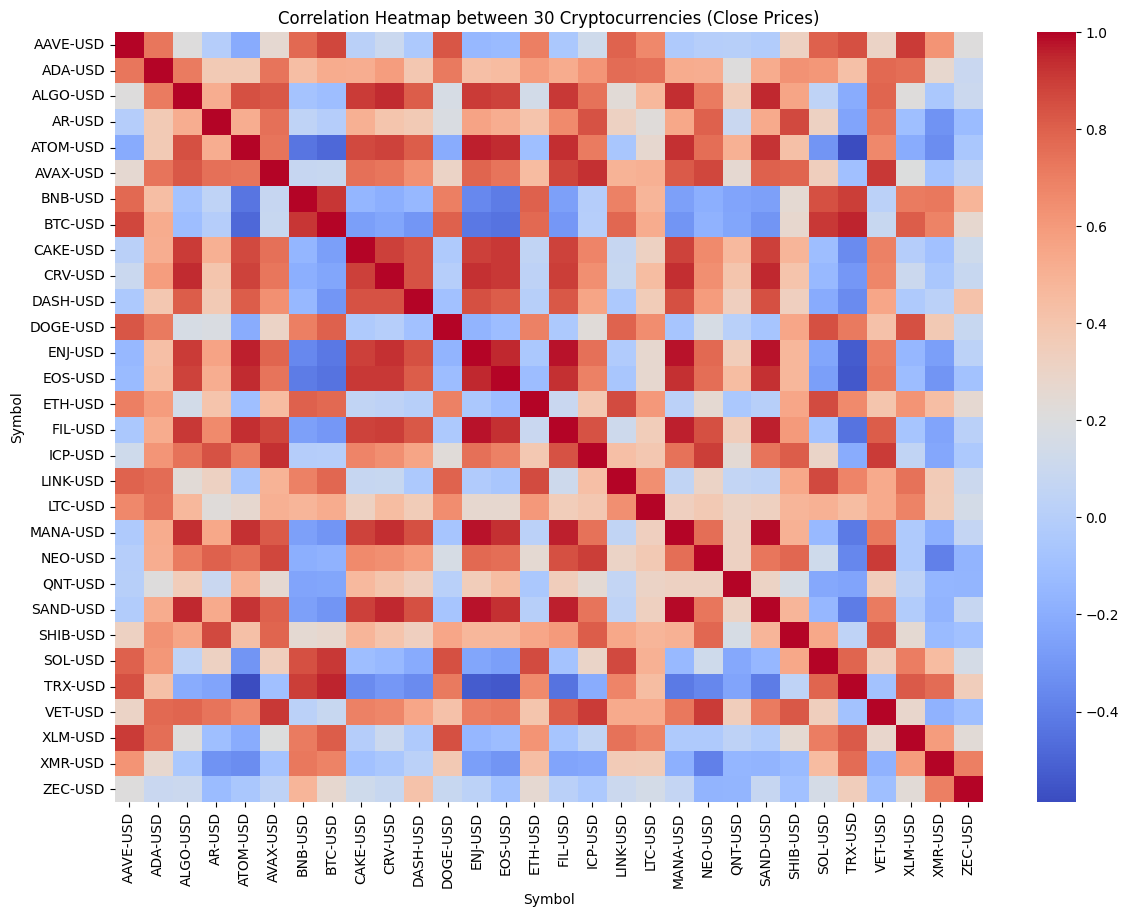

In [66]:
close_prices = df.pivot(index='Date', columns='Symbol', values='Close')
corr_matrix = close_prices.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap between 30 Cryptocurrencies (Close Prices)')
plt.show()


In [ ]:
corr_matrix.index.name = "Base_Coin"
corr_matrix.columns.name = "Related_Coin"

corr_df = (
    corr_matrix
    .stack()
    .reset_index(name="Correlation")
)

corr_df = corr_df[corr_df["Base_Coin"] != corr_df["Related_Coin"]]

corr_df.to_csv(PROJECT_ROOT / "dataset" / "correlation_results.csv", index=False)


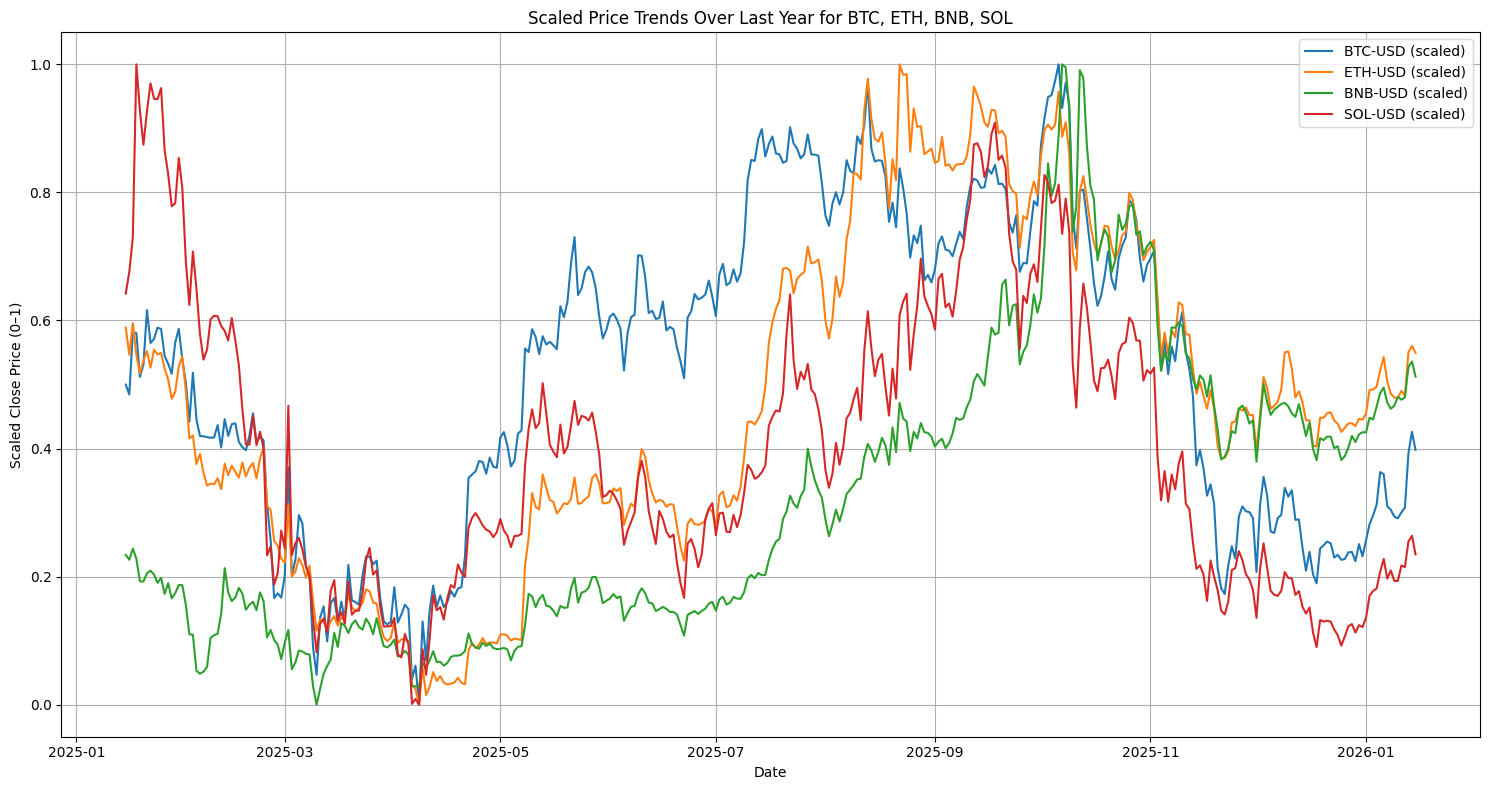

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

selected_symbols = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'SOL-USD']

filtered_df = df[df['Symbol'].isin(selected_symbols)].copy()

filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

one_year_ago = filtered_df['Date'].max() - pd.DateOffset(years=1)

plt.figure(figsize=(15, 8))

scaler = MinMaxScaler()

for symbol in selected_symbols:
    symbol_df = filtered_df[filtered_df['Symbol'] == symbol]

    symbol_df_last_year = symbol_df[symbol_df['Date'] >= one_year_ago]

    scaled_close = scaler.fit_transform(symbol_df_last_year[['Close']])

    plt.plot(symbol_df_last_year['Date'], scaled_close, label=f"{symbol} (scaled)")

plt.title('Scaled Price Trends Over Last Year for BTC, ETH, BNB, SOL')
plt.xlabel('Date')
plt.ylabel('Scaled Close Price (0–1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#find daily returns and percnetage of daily returns and log returns

In [ ]:
df = df.sort_values(["Symbol", "Date"]).reset_index(drop=True)

df["Daily_Return"] = df.groupby("Symbol")["Close"].pct_change()

df["Daily_Return_%"] = df["Daily_Return"] * 100

df["Log_Return"] = df.groupby("Symbol")["Close"].transform(lambda x: np.log(x) - np.log(x.shift(1)))

display(df[["Symbol", "Date", "Close", "Daily_Return", "Daily_Return_%", "Log_Return"]].head(10))

Symbol       Date       Close  Daily_Return  Daily_Return_%  Log_Return
0  AAVE-USD 2022-01-16  241.747620           NaN             NaN         NaN
1  AAVE-USD 2022-01-17  226.931946     -0.061286       -6.128571   -0.063244
2  AAVE-USD 2022-01-18  232.465759      0.024385        2.438534    0.024093
3  AAVE-USD 2022-01-19  211.251526     -0.091257       -9.125745   -0.095693
4  AAVE-USD 2022-01-20  198.596115     -0.059907       -5.990684   -0.061776
5  AAVE-USD 2022-01-21  170.320496     -0.142378      -14.237751   -0.153591
6  AAVE-USD 2022-01-22  146.417267     -0.140343      -14.034264   -0.151221
7  AAVE-USD 2022-01-23  158.031403      0.079322        7.932217    0.076333
8  AAVE-USD 2022-01-24  151.998398     -0.038176       -3.817599   -0.038924
9  AAVE-USD 2022-01-25  152.035858      0.000246        0.024645    0.000246

reindex dates

In [70]:
df.Name.unique()

<StringArray>
[             'Aave',           'Cardano',          'Algorand',
           'Arweave',            'Cosmos',         'Avalanche',
      'Binance Coin',           'Bitcoin',       'PancakeSwap',
   'Curve DAO Token',              'Dash',          'Dogecoin',
        'Enjin Coin',               'EOS',          'Ethereum',
          'Filecoin', 'Internet Computer',         'Chainlink',
          'Litecoin',      'Decentraland',               'NEO',
             'Quant',       'The Sandbox',         'Shiba Inu',
            'Solana',              'TRON',           'VeChain',
           'Stellar',            'Monero',             'Zcash']
Length: 30, dtype: string

In [71]:
missing_data = df.isnull().sum()

print("Missing data per column:")
print(missing_data)

Missing data per column:
Date               0
Name               0
Symbol             0
Open               0
High               0
Low                0
Close              0
Volume             0
Daily_Return      30
Daily_Return_%    30
Log_Return        30
dtype: int64


In [72]:
df.dropna(inplace=True)

print("Shape after dropping missing values:", df.shape)
missing_data = df.isnull().sum()
print("\nMissing data per column after dropping:")
print(missing_data)

Shape after dropping missing values: (43800, 11)

Missing data per column after dropping:
Date              0
Name              0
Symbol            0
Open              0
High              0
Low               0
Close             0
Volume            0
Daily_Return      0
Daily_Return_%    0
Log_Return        0
dtype: int64


PCA

In [73]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

df_coin = (
    df.groupby("Symbol")
      .agg(
          mean_daily_return=("Daily_Return", "mean"),
          std_daily_return=("Daily_Return", "std"),
          mean_log_return=("Log_Return", "mean"),
          std_log_return=("Log_Return", "std")
      )
      .dropna()
      .reset_index()
)

print("Number of coins used:", df_coin.shape[0])


features = [
    "mean_daily_return",
    "std_daily_return",
    "mean_log_return",
    "std_log_return"
]

X = df_coin[features].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)


kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)


cluster_df = pd.DataFrame({
    "Symbol": df_coin["Symbol"],
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "Cluster": clusters
})


for c in sorted(cluster_df["Cluster"].unique()):
    print(f"\n🔹 Cluster {c} coins:")
    print(cluster_df[cluster_df["Cluster"] == c]["Symbol"].tolist())


cluster_df.to_csv(PROJECT_ROOT / "dataset" / "pca_components.csv", index=False)
cluster_df[["Symbol", "Cluster"]].to_csv(PROJECT_ROOT / "dataset" / "clustered_coins.csv", index=False)

print("\nSaved:")



Number of coins used: 30

🔹 Cluster 0 coins:
['AAVE-USD', 'ADA-USD', 'DASH-USD', 'DOGE-USD', 'LINK-USD', 'LTC-USD', 'QNT-USD', 'SOL-USD', 'XLM-USD', 'ZEC-USD']

🔹 Cluster 1 coins:
['ALGO-USD', 'ATOM-USD', 'AVAX-USD', 'CAKE-USD', 'ENJ-USD', 'EOS-USD', 'FIL-USD', 'MANA-USD', 'NEO-USD', 'SAND-USD', 'VET-USD']

🔹 Cluster 2 coins:
['BNB-USD', 'BTC-USD', 'ETH-USD', 'TRX-USD', 'XMR-USD']

🔹 Cluster 3 coins:
['AR-USD', 'CRV-USD', 'ICP-USD', 'SHIB-USD']

Saved:


K-Means

In [74]:
import numpy as np
import pandas as pd

representatives = []

for cluster_id in sorted(cluster_df["Cluster"].unique()):
    cluster_data = cluster_df[cluster_df["Cluster"] == cluster_id]

    centroid = cluster_data[["PC1", "PC2"]].mean().values

    distances = np.sqrt(
        (cluster_data["PC1"] - centroid[0])**2 +
        (cluster_data["PC2"] - centroid[1])**2
    )

    rep_idx = distances.idxmin()
    representatives.append({
        "Cluster": cluster_id,
        "Selected_Coin": cluster_data.loc[rep_idx, "Symbol"]
    })

representative_df = pd.DataFrame(representatives)

representative_df


Cluster Selected_Coin
0        0      DOGE-USD
1        1      ALGO-USD
2        2       BNB-USD
3        3       CRV-USD

In [75]:
representative_df.to_csv(
    PROJECT_ROOT / "dataset" / "cluster_representatives.csv",
    index=False
)


#create features required for forecasting

In [76]:

df = df.sort_values(["Symbol", "Date"]).reset_index(drop=True)


def create_features(group):
    group = group.copy()

    group["SMA_7"] = group["Close"].rolling(window=7).mean()
    group["SMA_14"] = group["Close"].rolling(window=14).mean()

    group["EMA_7"] = group["Close"].ewm(span=7, adjust=False).mean()
    group["EMA_14"] = group["Close"].ewm(span=14, adjust=False).mean()

    group["Volatility_7"] = group["Daily_Return"].rolling(window=7).std()
    group["Volatility_14"] = group["Daily_Return"].rolling(window=14).std()

    group["Momentum_7"] = group["Close"] - group["Close"].shift(7)
    group["Momentum_14"] = group["Close"] - group["Close"].shift(14)

    group["Volume_MA_7"] = group["Volume"].rolling(window=7).mean()
    group["Volume_MA_14"] = group["Volume"].rolling(window=14).mean()

    return group

df_features = df.groupby("Symbol", group_keys=False).apply(create_features)


output_path = PROJECT_ROOT / "dataset" / "main_crypto_dataset.csv"
df_features.to_csv(output_path, index=False)

print(" Forecasting feature dataset created")
print(f" Saved to: {output_path}")
print(" Final shape:", df_features.shape)

df = df_features

df.dtypes


C:\Users\metalvampire77\AppData\Local\Temp\ipykernel_5632\3219918115.py:24: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_features = df.groupby("Symbol", group_keys=False).apply(create_features)


 Forecasting feature dataset created
 Saved to: c:\Users\metalvampire77\Desktop\solent university\programming_for_problem_solving\com724\dataset\main_crypto_dataset.csv
 Final shape: (43800, 21)


Date              datetime64[ns]
Name              string[python]
Symbol            string[python]
Open                     float64
High                     float64
Low                      float64
Close                    float64
Volume                   float64
Daily_Return             float64
Daily_Return_%           float64
Log_Return               float64
SMA_7                    float64
SMA_14                   float64
EMA_7                    float64
EMA_14                   float64
Volatility_7             float64
Volatility_14            float64
Momentum_7               float64
Momentum_14              float64
Volume_MA_7              float64
Volume_MA_14             float64
dtype: object

In [77]:

missing_data = df.isnull().sum()

print("Missing data per column:")
print(missing_data)
print(df.shape)
print(df.columns)

Missing data per column:
Date                0
Name                0
Symbol              0
Open                0
High                0
Low                 0
Close               0
Volume              0
Daily_Return        0
Daily_Return_%      0
Log_Return          0
SMA_7             180
SMA_14            390
EMA_7               0
EMA_14              0
Volatility_7      180
Volatility_14     390
Momentum_7        210
Momentum_14       420
Volume_MA_7       180
Volume_MA_14      390
dtype: int64
(43800, 21)
Index(['Date', 'Name', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Daily_Return', 'Daily_Return_%', 'Log_Return', 'SMA_7', 'SMA_14',
       'EMA_7', 'EMA_14', 'Volatility_7', 'Volatility_14', 'Momentum_7',
       'Momentum_14', 'Volume_MA_7', 'Volume_MA_14'],
      dtype='object')


In [78]:
df.dropna(inplace=True)

print("Shape after dropping missing values:", df.shape)
missing_data = df.isnull().sum()
print("\nMissing data per column after dropping:")
print(missing_data)

Shape after dropping missing values: (43380, 21)

Missing data per column after dropping:
Date              0
Name              0
Symbol            0
Open              0
High              0
Low               0
Close             0
Volume            0
Daily_Return      0
Daily_Return_%    0
Log_Return        0
SMA_7             0
SMA_14            0
EMA_7             0
EMA_14            0
Volatility_7      0
Volatility_14     0
Momentum_7        0
Momentum_14       0
Volume_MA_7       0
Volume_MA_14      0
dtype: int64


In [ ]:


df.to_csv(PROJECT_ROOT / "dataset" / "main_crypto_dataset.csv", index=False)


In [80]:
lags = [1, 7, 14]

for lag in lags:
    df[f"Close_lag_{lag}"] = df["Close"].shift(lag)

df["Return_lag_1"] = df["Daily_Return"].shift(1)
df["Return_lag_7"] = df["Daily_Return"].shift(7)

df = df.dropna().reset_index(drop=True)


In [81]:
horizons = {
    "target_1d": 1,
    "target_7d": 7,
    "target_30d": 30,
    "target_90d": 90,
    "target_180d": 180,
    "target_365d": 365
}

for name, shift_val in horizons.items():
    df[name] = df["Close"].shift(-shift_val)

df = df.dropna().reset_index(drop=True)


In [82]:
print(df.columns)

Index(['Date', 'Name', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Daily_Return', 'Daily_Return_%', 'Log_Return', 'SMA_7', 'SMA_14',
       'EMA_7', 'EMA_14', 'Volatility_7', 'Volatility_14', 'Momentum_7',
       'Momentum_14', 'Volume_MA_7', 'Volume_MA_14', 'Close_lag_1',
       'Close_lag_7', 'Close_lag_14', 'Return_lag_1', 'Return_lag_7',
       'target_1d', 'target_7d', 'target_30d', 'target_90d', 'target_180d',
       'target_365d'],
      dtype='object')


## RANDOM FOREST FEATURE IMPORTANCE


In [83]:
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# --------------------------------
# 1. DEFINE FEATURE COLUMNS (X)
# --------------------------------
feature_cols = [
    "Open", "High", "Low", "Close", "Volume",
    "Daily_Return", "Daily_Return_%", "Log_Return",
    "SMA_7", "SMA_14", "EMA_7", "EMA_14",
    "Volatility_7", "Volatility_14",
    "Volume_MA_7", "Volume_MA_14",
    "Close_lag_1", "Close_lag_7", "Close_lag_14",
    "Return_lag_1", "Return_lag_7"
]

X = df[feature_cols]

# --------------------------------
# 2. DEFINE TARGET (SHORT HORIZON)
# --------------------------------
y = df["target_1d"]   # use target_7d if you prefer

# --------------------------------
# 3. TRAIN / TEST SPLIT (TIME-SAFE)
# --------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# --------------------------------
# 4. TRAIN RANDOM FOREST
# --------------------------------
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

# --------------------------------
# 5. FEATURE IMPORTANCE
# --------------------------------
importances = rf.feature_importances_

importance_df = pd.DataFrame({
    "Feature": feature_cols,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(importance_df)

# --------------------------------
# 6. PLOT FEATURE IMPORTANCE
# --------------------------------
plt.figure(figsize=(10, 6))
plt.barh(
    importance_df["Feature"],
    importance_df["Importance"]
)
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importance (1-Day Horizon)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
'''

'\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\n\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.model_selection import train_test_split\n\n# --------------------------------\n# 1. DEFINE FEATURE COLUMNS (X)\n# --------------------------------\nfeature_cols = [\n    "Open", "High", "Low", "Close", "Volume",\n    "Daily_Return", "Daily_Return_%", "Log_Return",\n    "SMA_7", "SMA_14", "EMA_7", "EMA_14",\n    "Volatility_7", "Volatility_14",\n    "Volume_MA_7", "Volume_MA_14",\n    "Close_lag_1", "Close_lag_7", "Close_lag_14",\n    "Return_lag_1", "Return_lag_7"\n]\n\nX = df[feature_cols]\n\n# --------------------------------\n# 2. DEFINE TARGET (SHORT HORIZON)\n# --------------------------------\ny = df["target_1d"]   # use target_7d if you prefer\n\n# --------------------------------\n# 3. TRAIN / TEST SPLIT (TIME-SAFE)\n# --------------------------------\nX_train, X_test, y_train, y_test = train_test_split(\n    X, y, test_size=0.2, shuffl

In [84]:
print(df.columns)

Index(['Date', 'Name', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Daily_Return', 'Daily_Return_%', 'Log_Return', 'SMA_7', 'SMA_14',
       'EMA_7', 'EMA_14', 'Volatility_7', 'Volatility_14', 'Momentum_7',
       'Momentum_14', 'Volume_MA_7', 'Volume_MA_14', 'Close_lag_1',
       'Close_lag_7', 'Close_lag_14', 'Return_lag_1', 'Return_lag_7',
       'target_1d', 'target_7d', 'target_30d', 'target_90d', 'target_180d',
       'target_365d'],
      dtype='object')


In [ ]:


df.to_csv(PROJECT_ROOT / "dataset" / "main_crypto_dataset.csv", index=False)


#now start of modeling

#ARIMA

In [86]:
print(df.shape)

(43001, 32)



Processing coin: DOGE-USD


c:\Users\metalvampire77\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\metalvampire77\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\metalvampire77\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


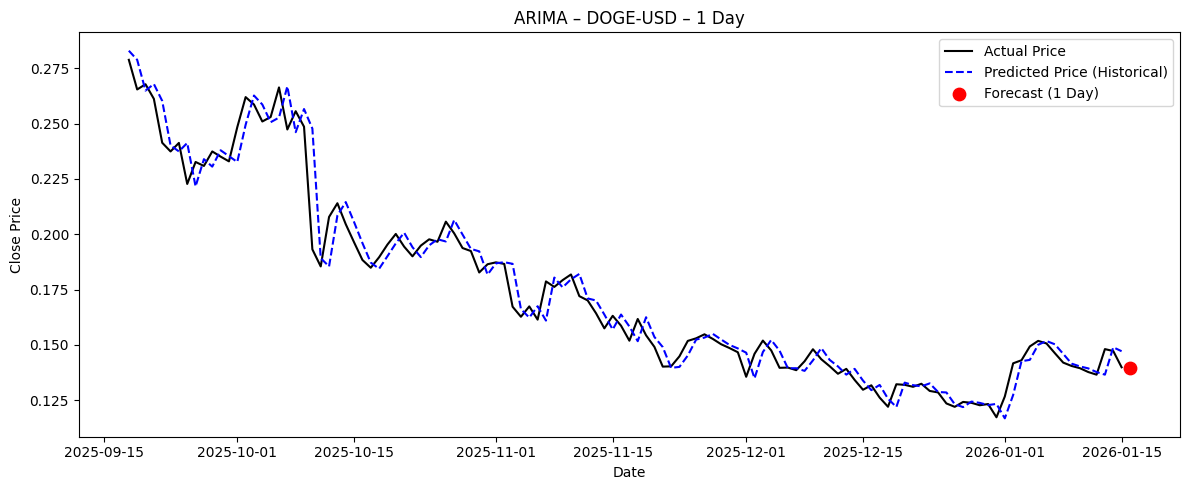

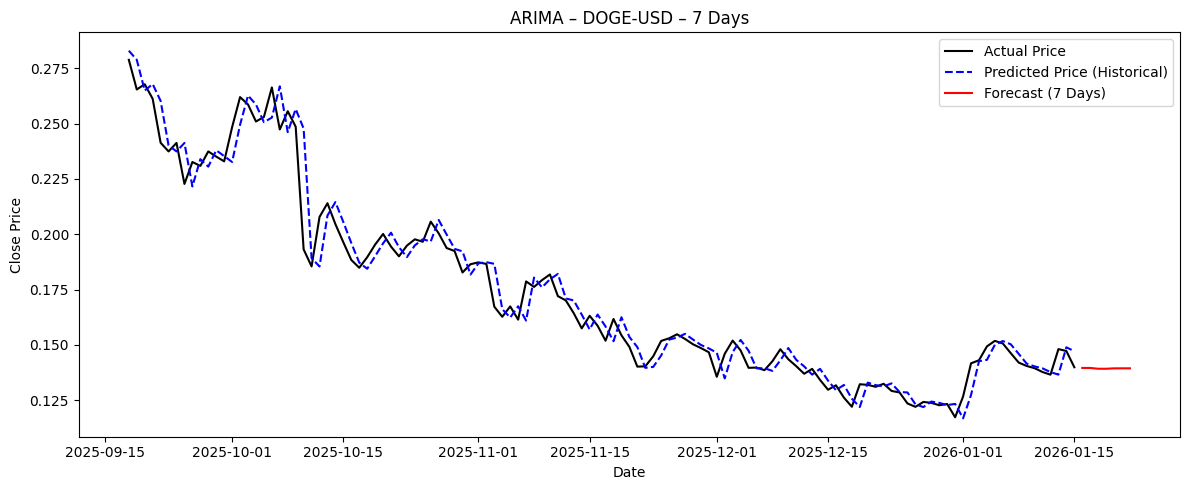

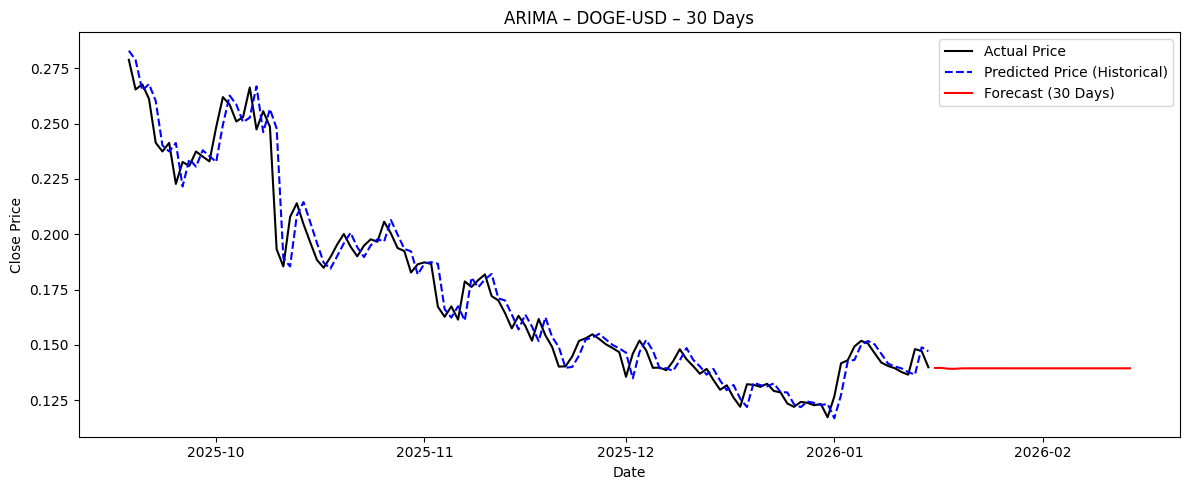

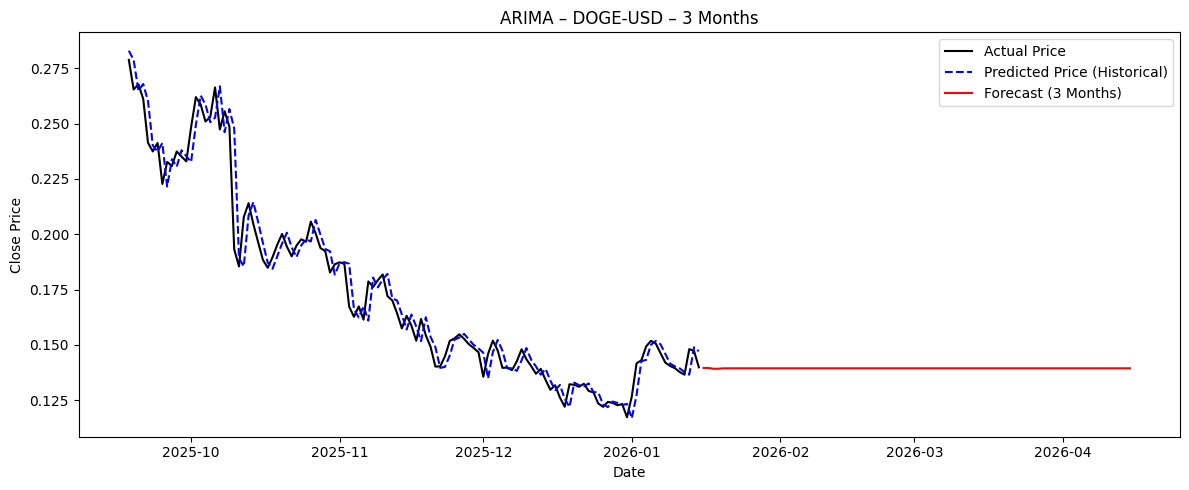

c:\Users\metalvampire77\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


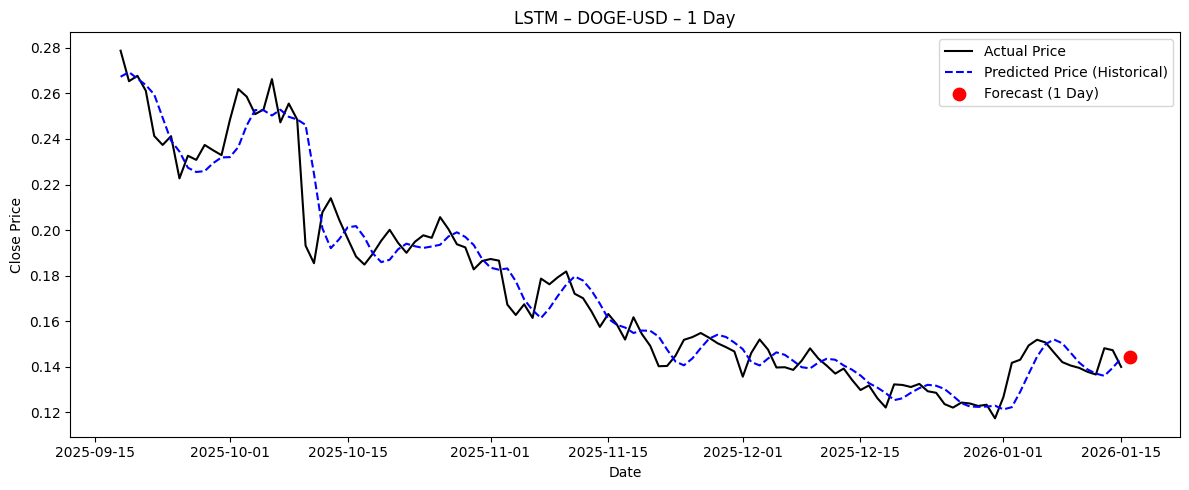

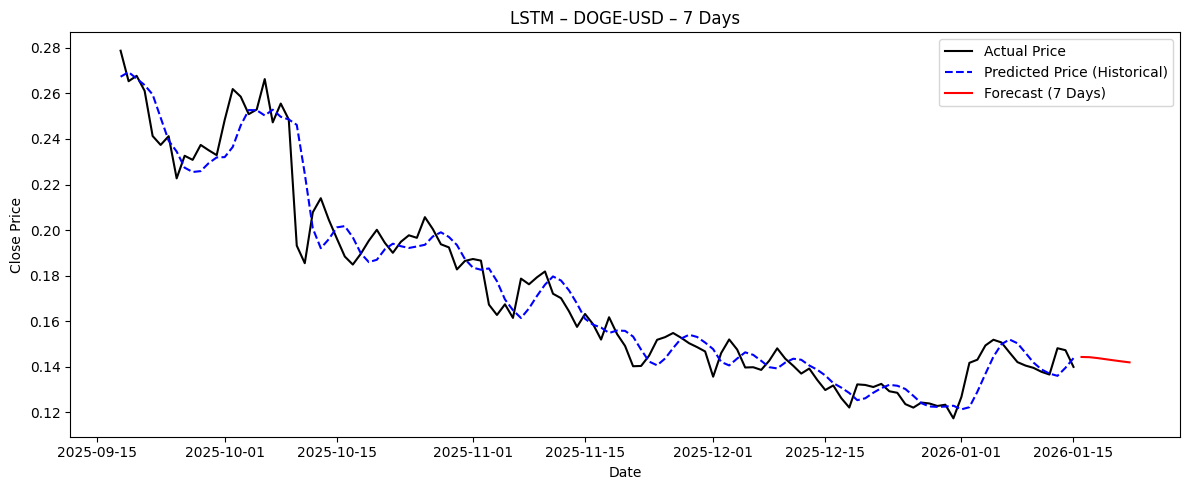

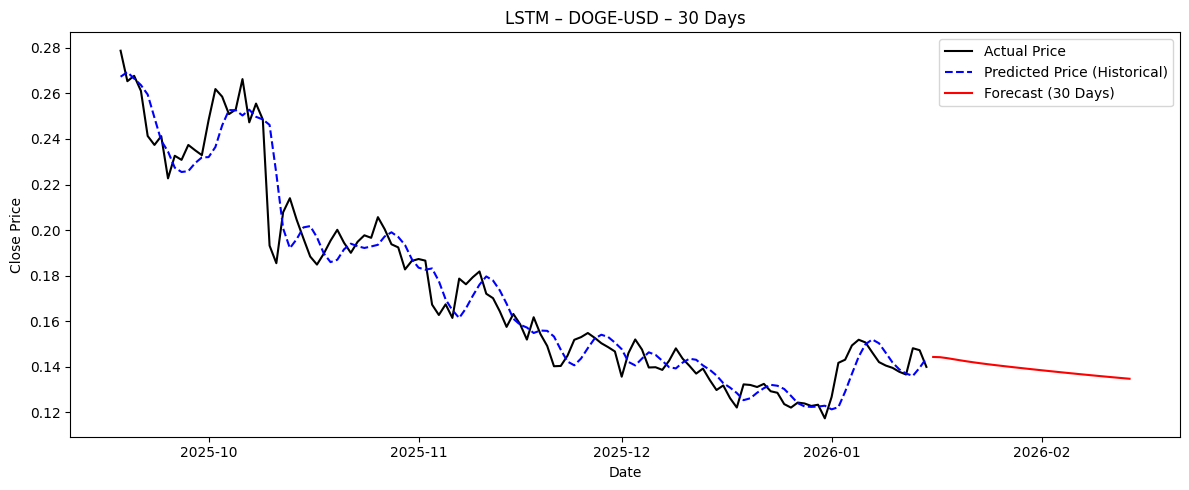

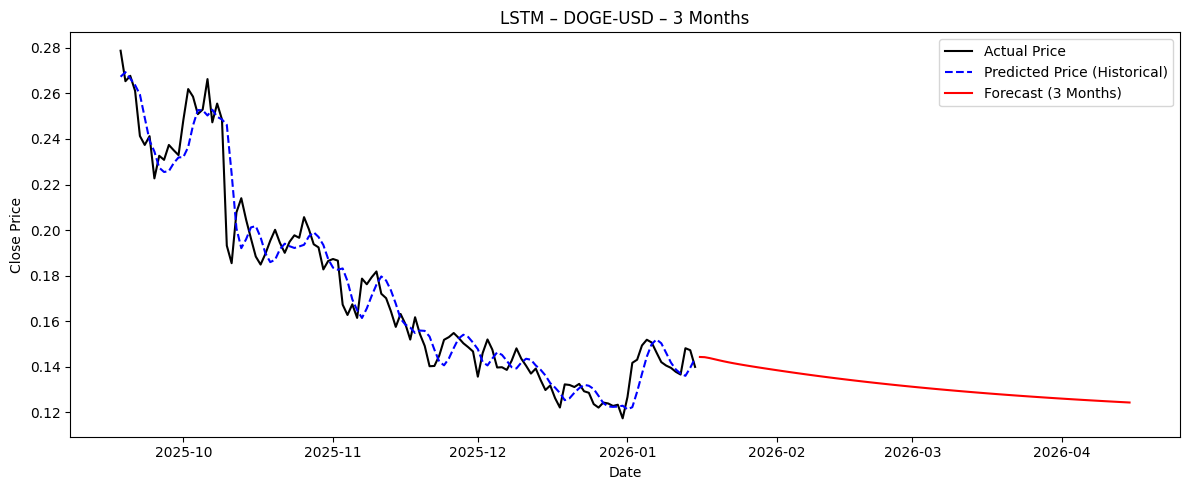


Processing coin: ALGO-USD


c:\Users\metalvampire77\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\metalvampire77\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\metalvampire77\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


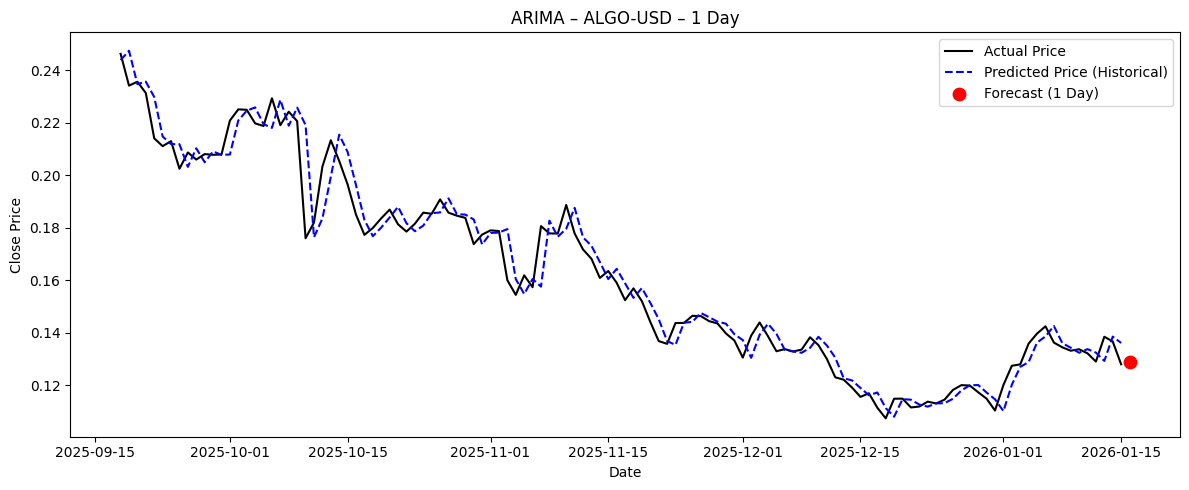

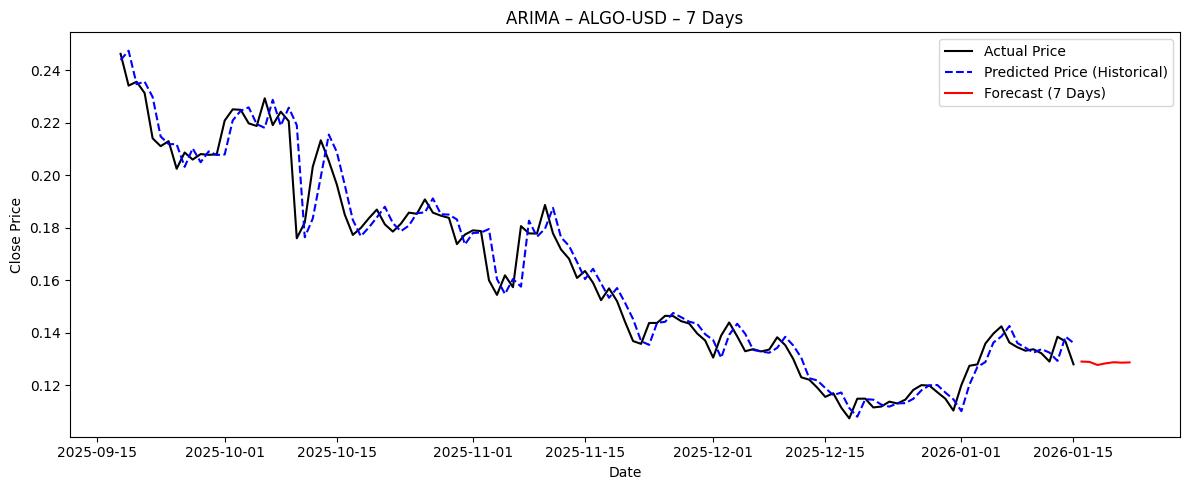

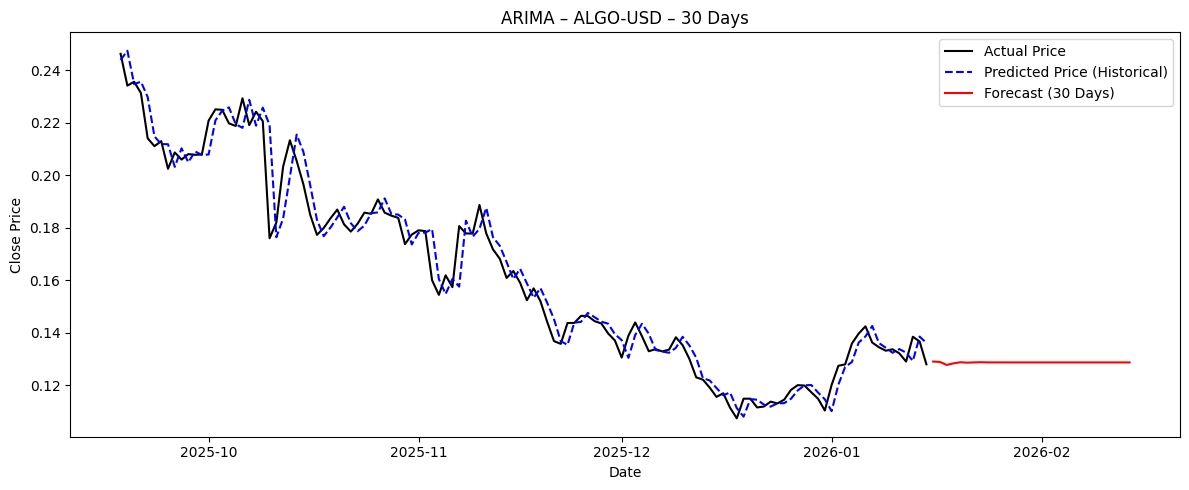

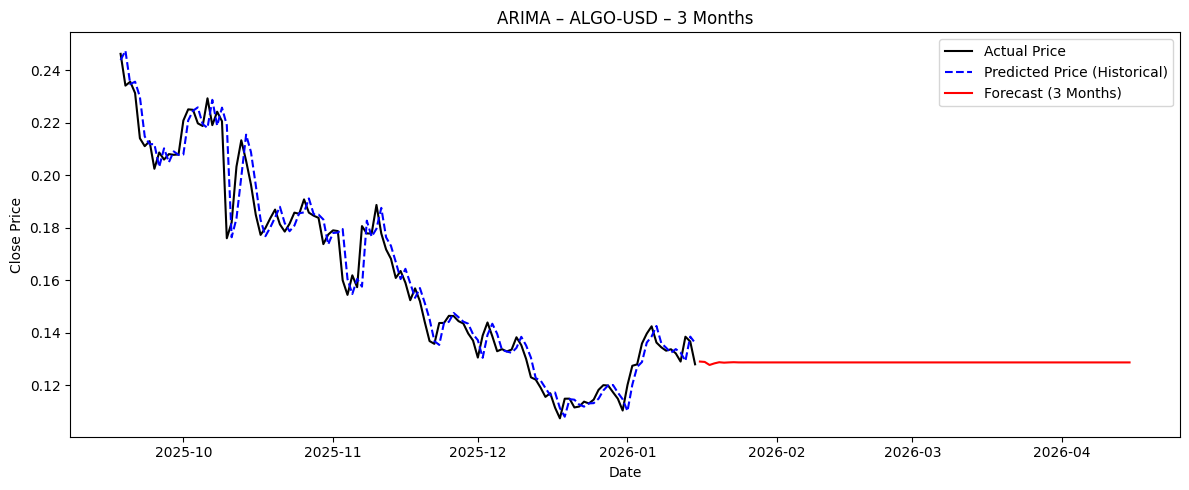

c:\Users\metalvampire77\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


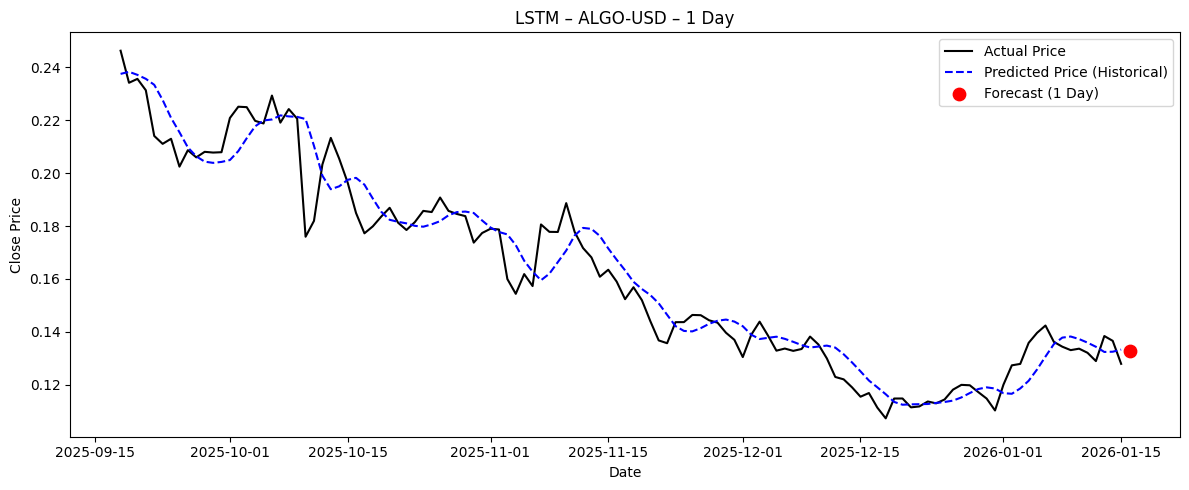

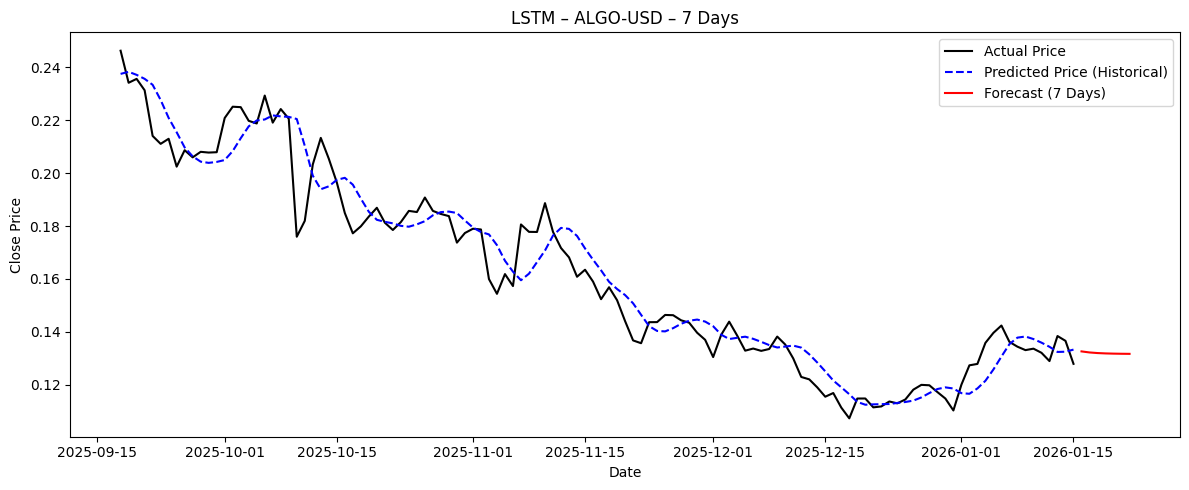

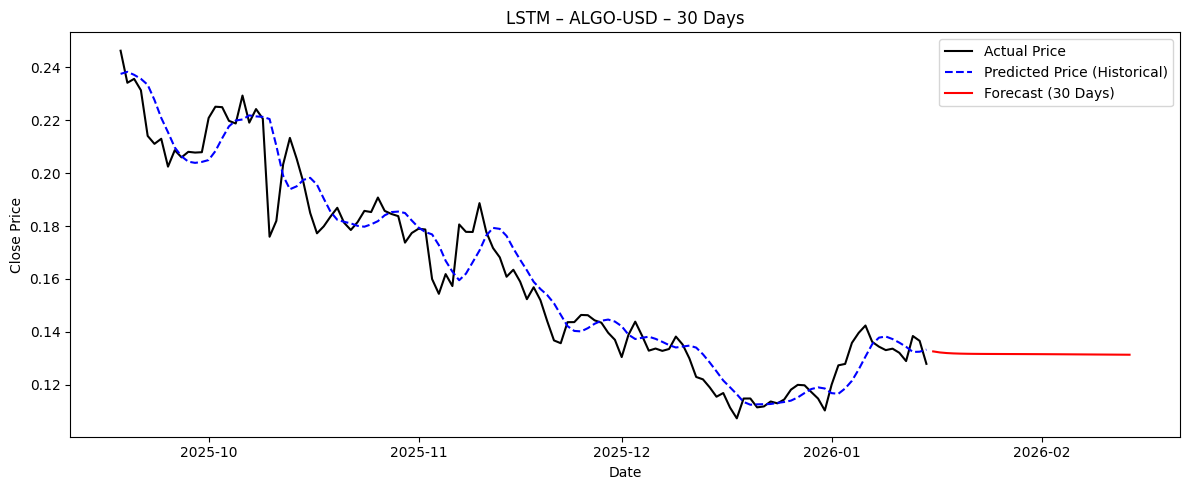

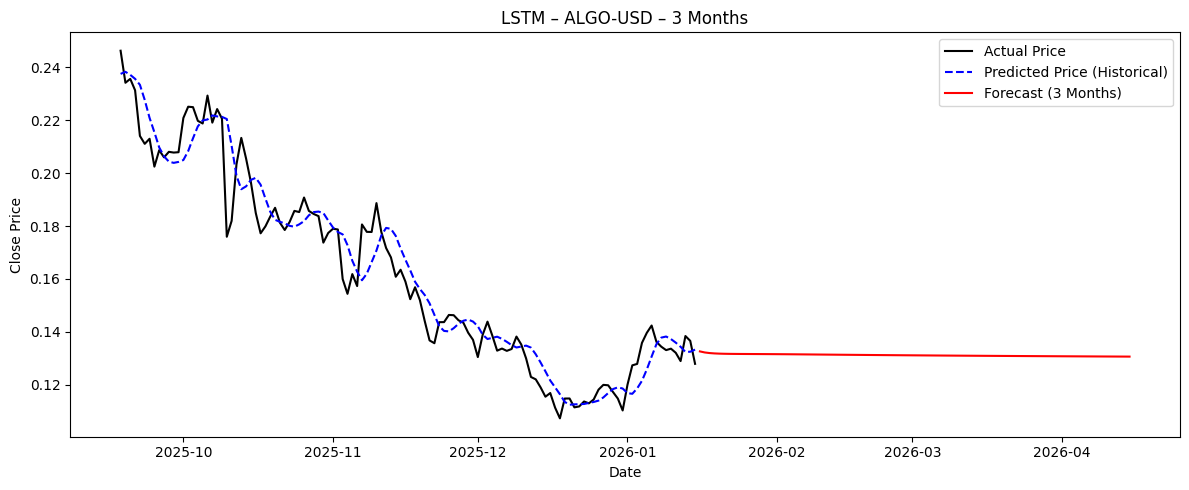


Processing coin: BNB-USD


c:\Users\metalvampire77\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\metalvampire77\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\metalvampire77\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


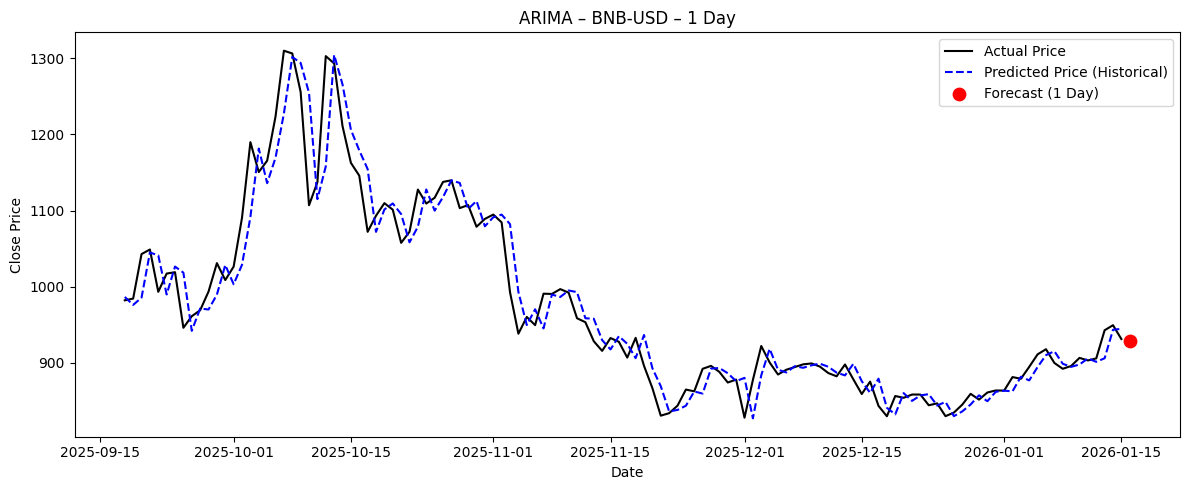

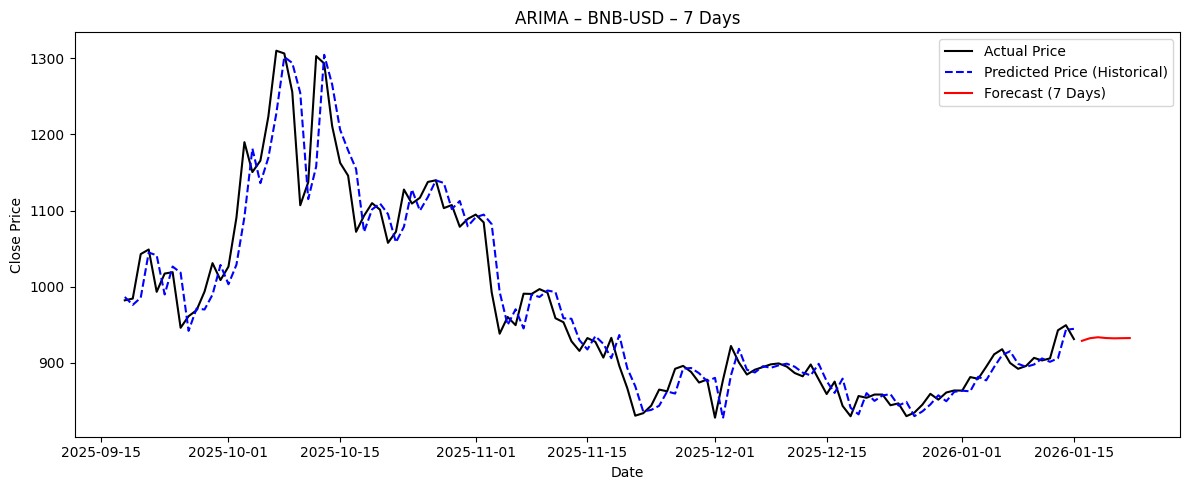

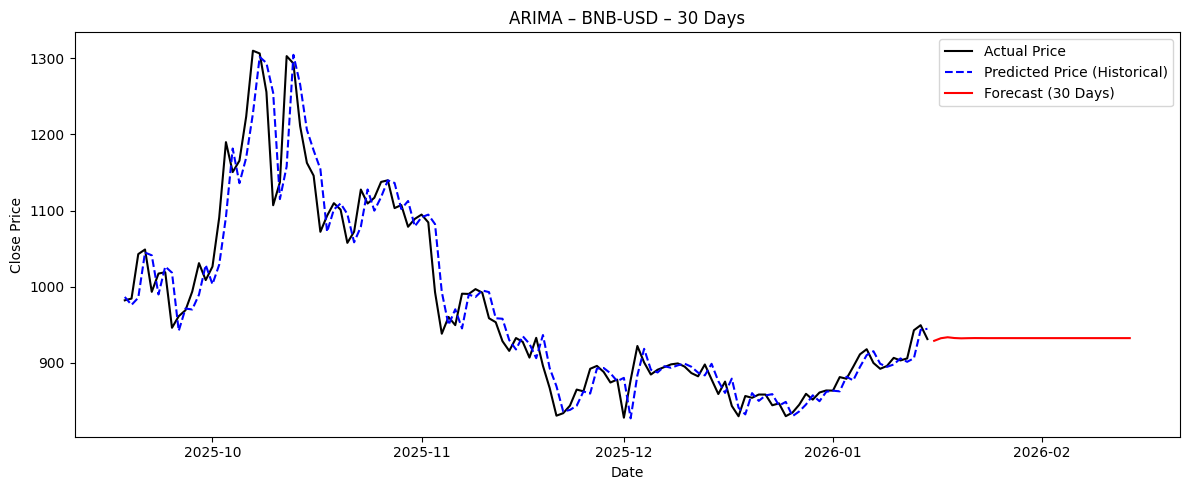

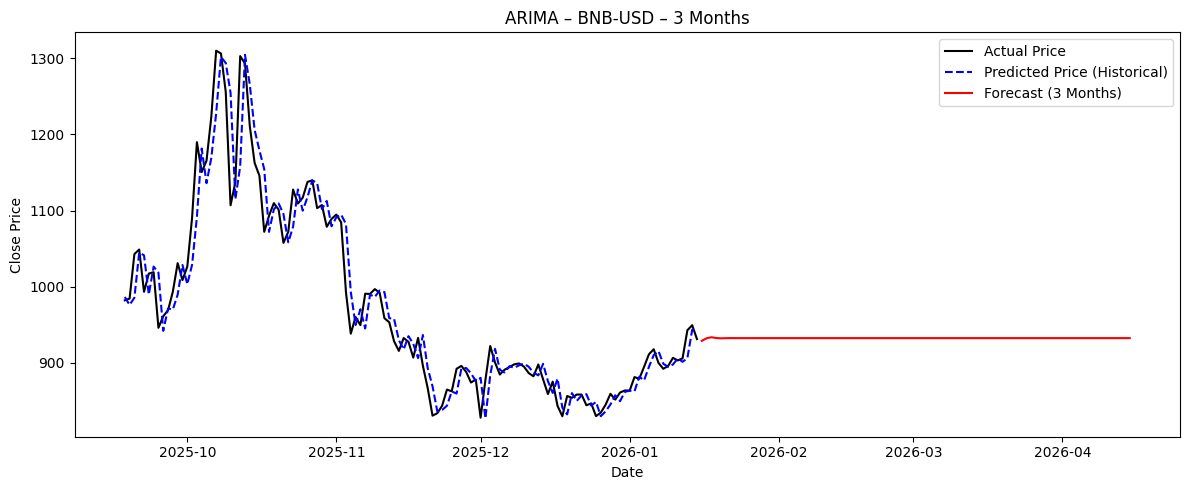

c:\Users\metalvampire77\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


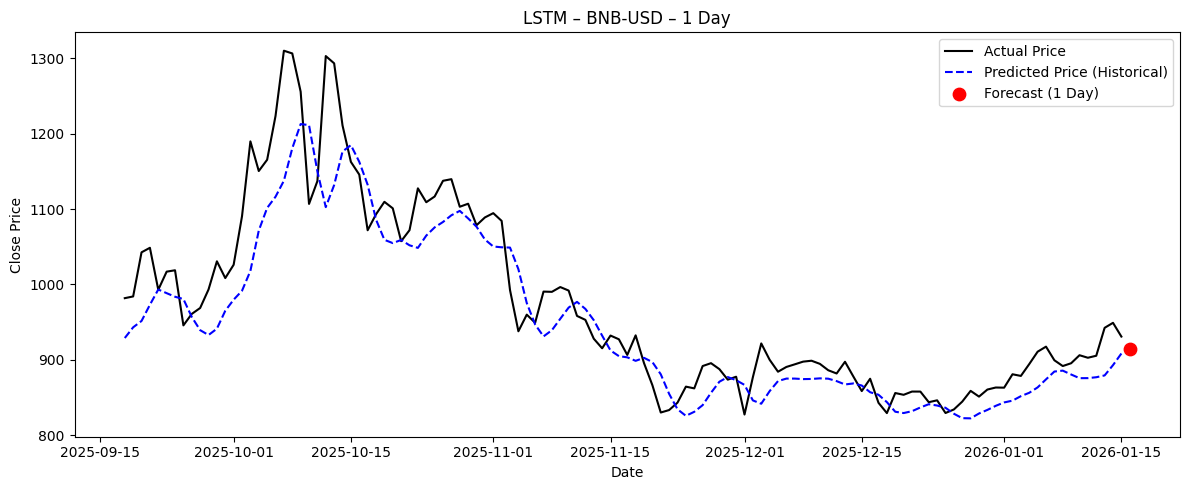

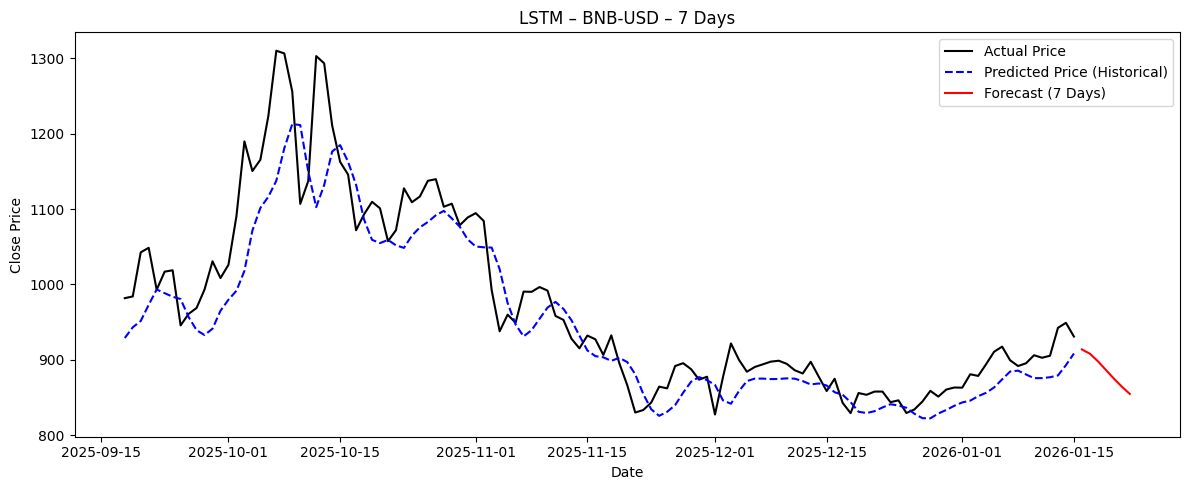

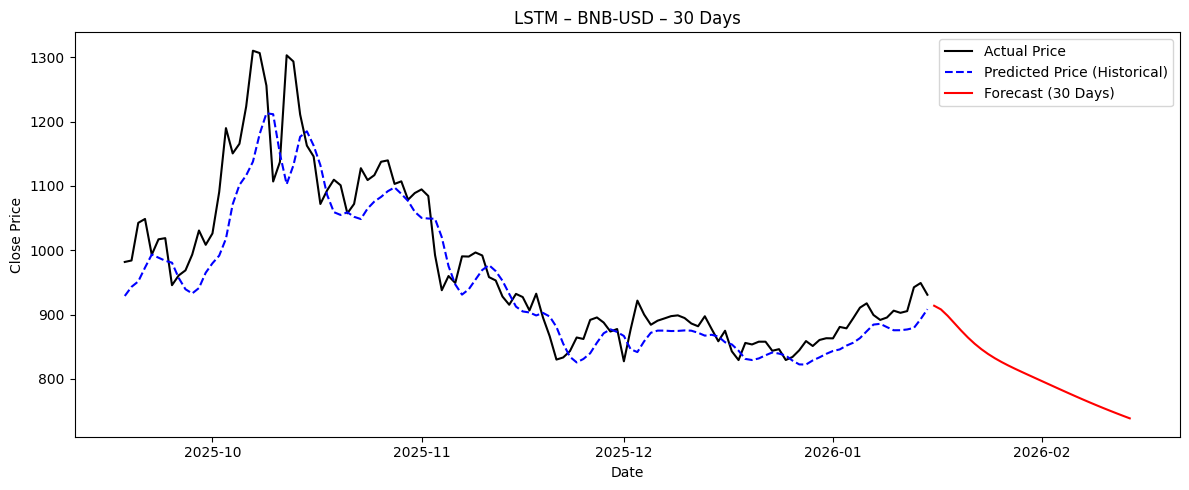

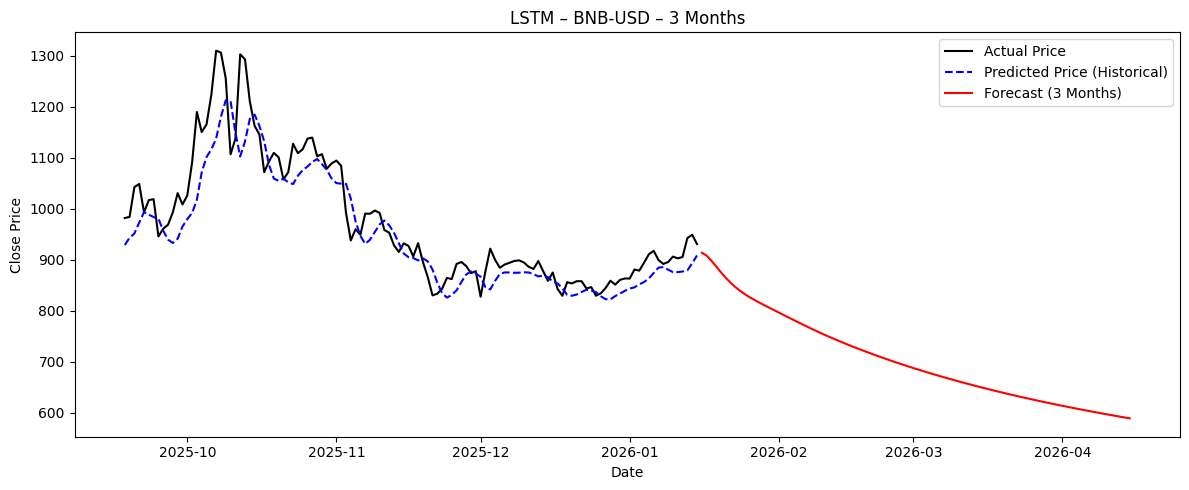


Processing coin: CRV-USD


c:\Users\metalvampire77\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\metalvampire77\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\metalvampire77\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


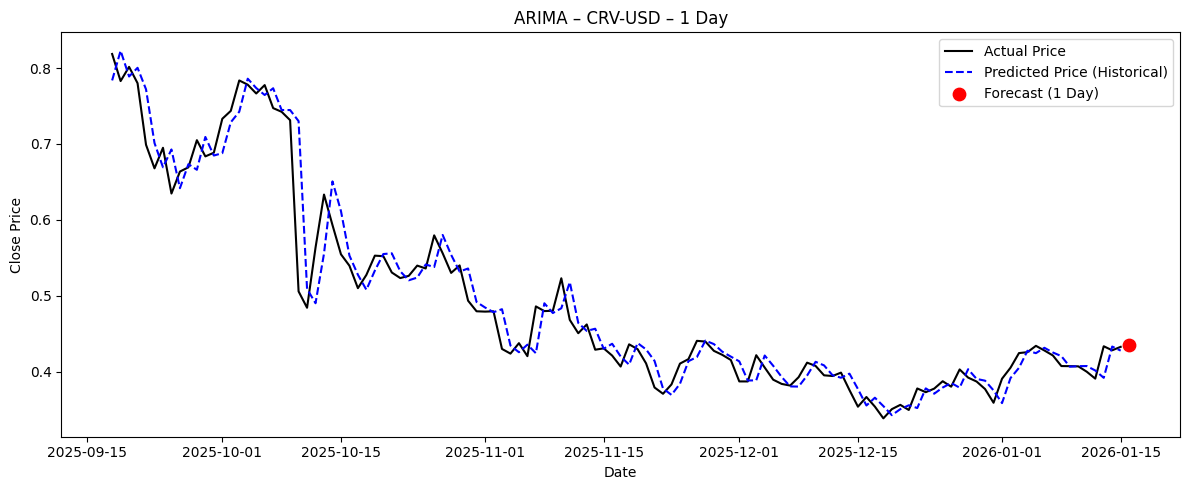

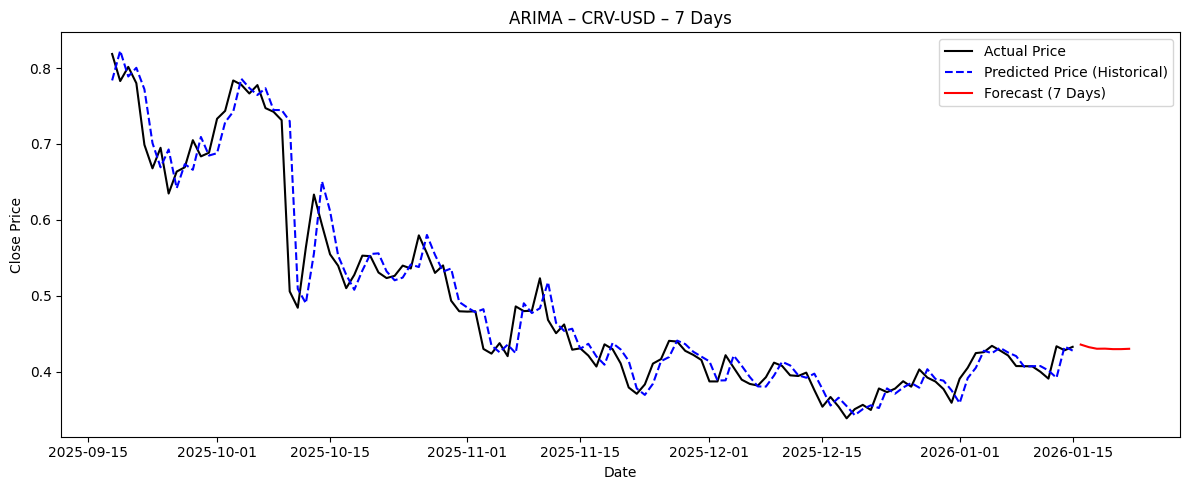

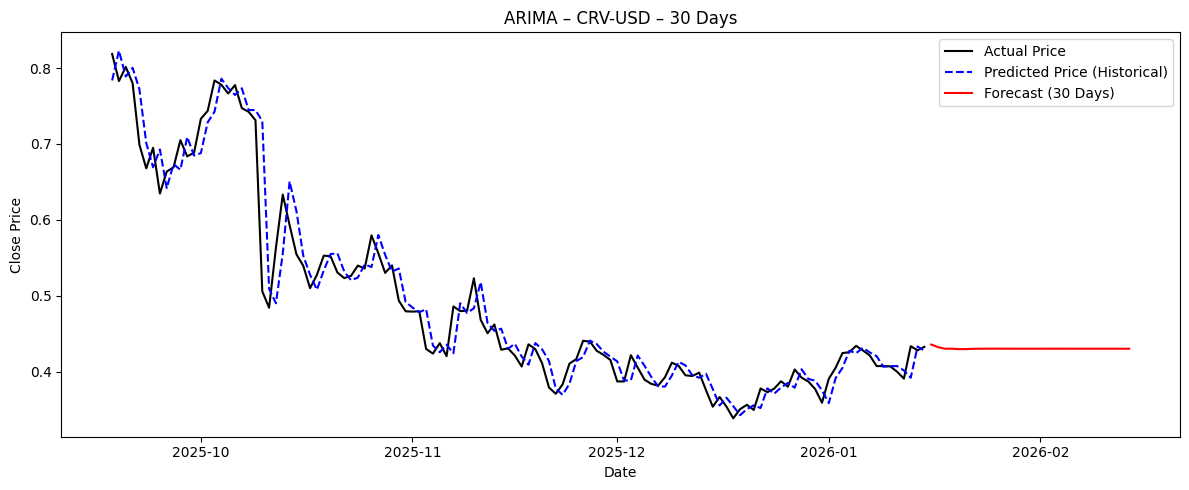

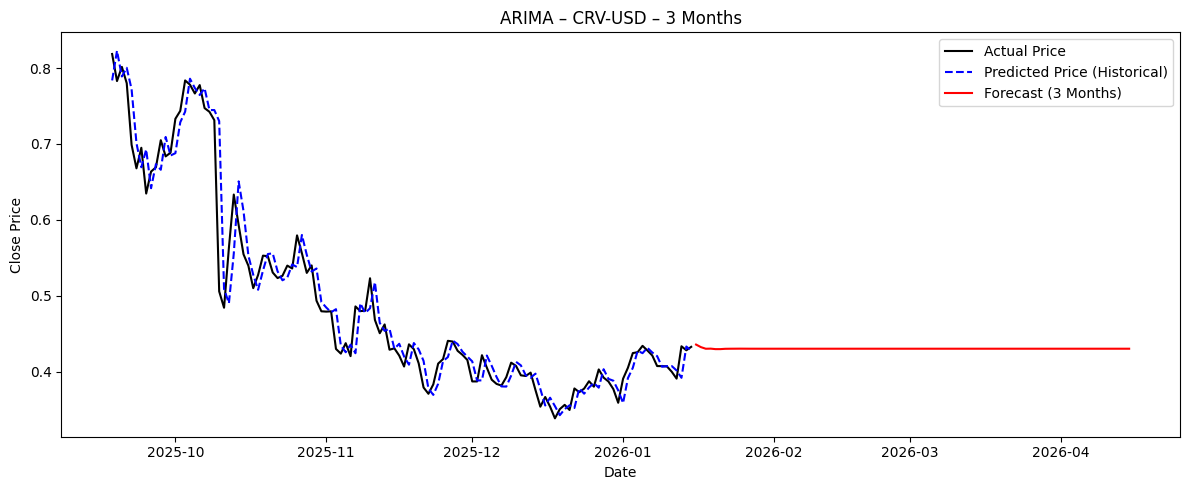

c:\Users\metalvampire77\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


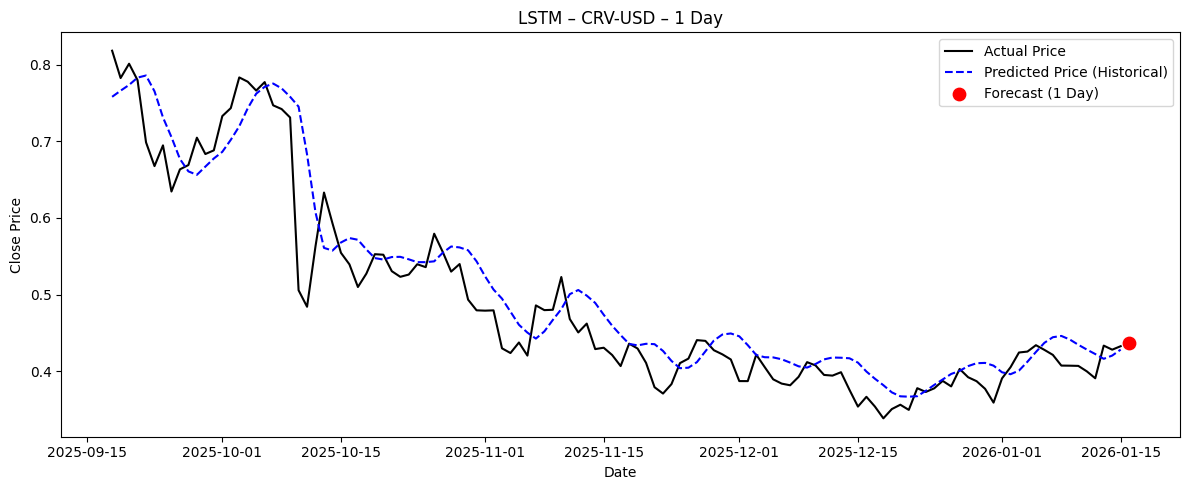

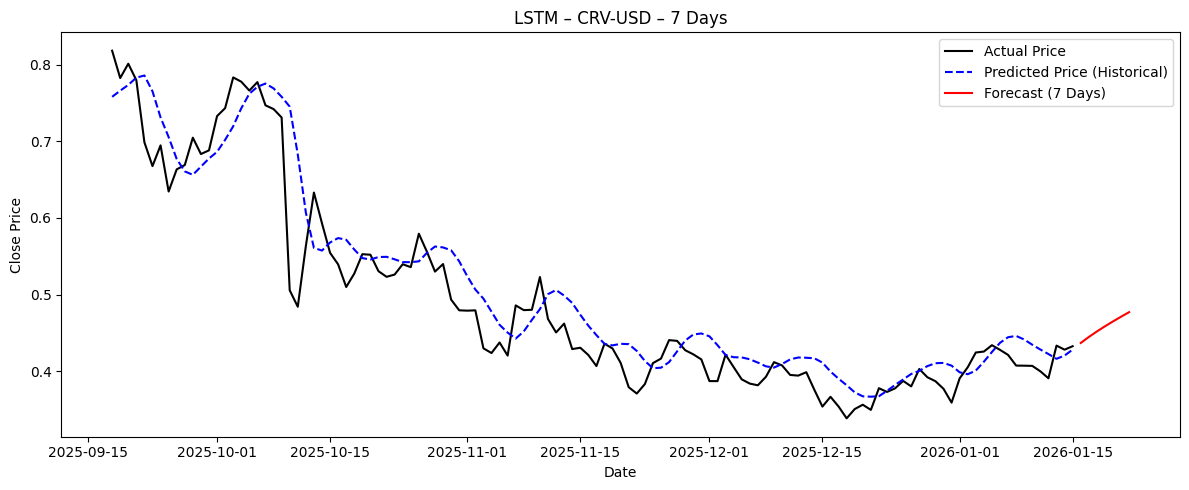

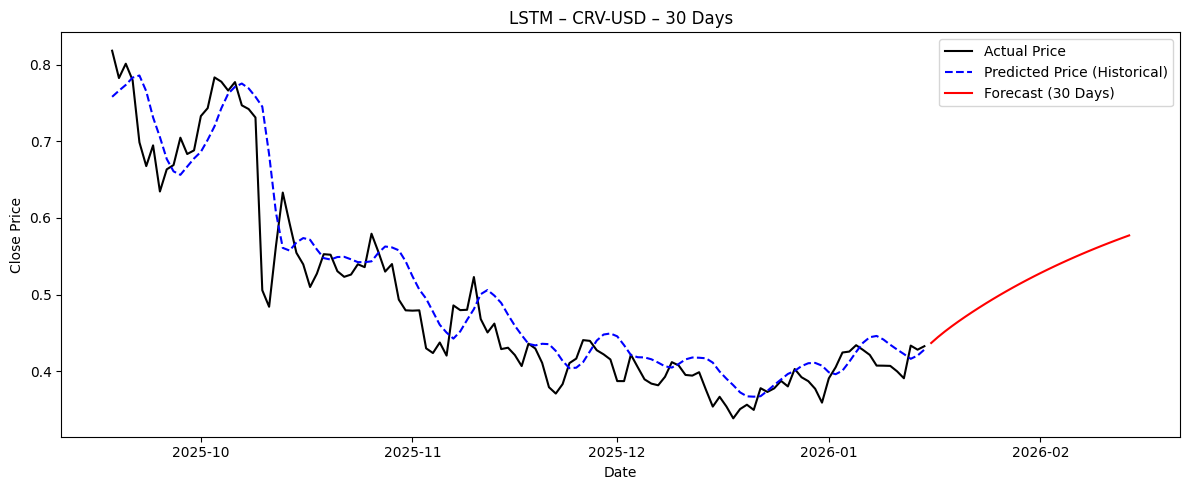

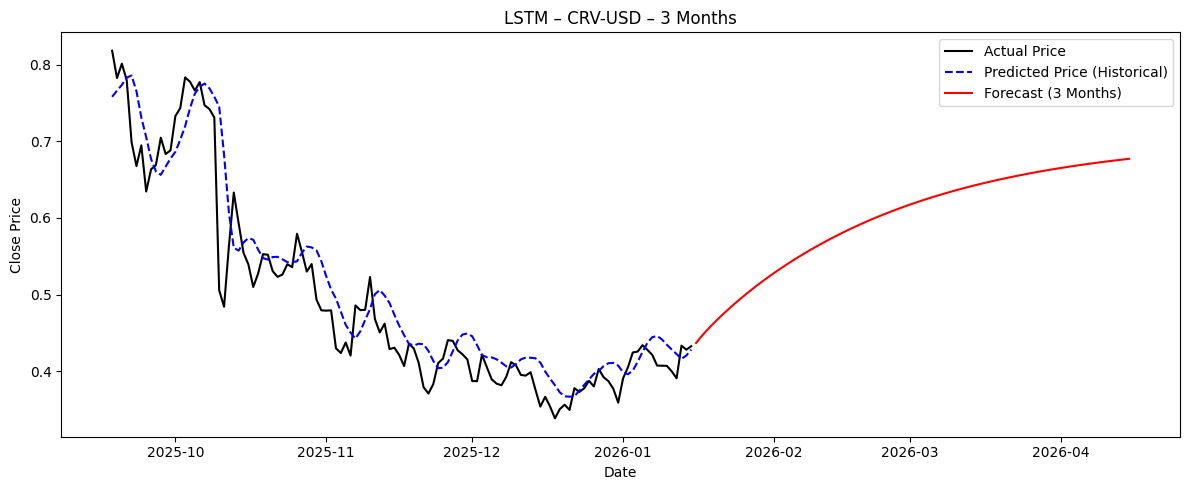


All ARIMA and LSTM models completed successfully.


In [87]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

LOOKBACK = 30
HISTORY_WINDOW = 120

HORIZONS = {
    "1 Day": 1,
    "7 Days": 7,
    "30 Days": 30,
    "3 Months": 90
}


rep_coins_df = pd.read_csv(
    PROJECT_ROOT/"dataset"/"cluster_representatives.csv"
)

selected_coins = rep_coins_df["Selected_Coin"].unique()


for coin in selected_coins:

    print("\n==============================")
    print(f"Processing coin: {coin}")
    print("==============================")

    coin_df = df[df["Symbol"] == coin].copy()
    coin_df["Date"] = pd.to_datetime(coin_df["Date"])
    coin_df = coin_df.sort_values("Date").reset_index(drop=True)

    if len(coin_df) < 200:
        print(f"Skipping {coin} (insufficient data)")
        continue

  

    ts = coin_df.set_index("Date")["Close"]

    arima_model = ARIMA(ts, order=(5, 1, 0))
    arima_fitted = arima_model.fit()

    fitted_values = arima_fitted.fittedvalues.reindex(ts.index)

    last_date = ts.index[-1]

    for label, days in HORIZONS.items():

        forecast = arima_fitted.forecast(steps=days)

        future_dates = pd.date_range(
            start=last_date + pd.Timedelta(days=1),
            periods=days,
            freq="D"
        )

        plt.figure(figsize=(12, 5))

        plt.plot(
            ts.index[-HISTORY_WINDOW:],
            ts.values[-HISTORY_WINDOW:],
            label="Actual Price",
            color="black"
        )

        plt.plot(
            fitted_values.index[-HISTORY_WINDOW:],
            fitted_values.values[-HISTORY_WINDOW:],
            linestyle="--",
            color="blue",
            label="Predicted Price (Historical)"
        )

        # Forecast
        if days == 1:
            plt.scatter(
                future_dates,
                forecast.values,
                color="red",
                s=80,
                label="Forecast (1 Day)"
            )
        else:
            plt.plot(
                future_dates,
                forecast.values,
                color="red",
                label=f"Forecast ({label})"
            )

        plt.title(f"ARIMA – {coin} – {label}")
        plt.xlabel("Date")
        plt.ylabel("Close Price")
        plt.legend()
        plt.tight_layout()
        plt.show()

    # Save ARIMA 3-month forecast
    arima_3m = arima_fitted.forecast(steps=90)

    arima_3m_df = pd.DataFrame({
        "Date": pd.date_range(
            start=last_date + pd.Timedelta(days=1),
            periods=90,
            freq="D"
        ),
        "ARIMA_Forecast_Close": arima_3m.values
    })

    arima_3m_df.to_csv(PROJECT_ROOT/"dataset"/"models"/
        f"arima_{coin}_3_month_forecast.csv",
        index=False
    )

    # =================================================
    # ================== LSTM MODEL ===================
    # =================================================

    prices = coin_df["Close"].values.reshape(-1, 1)
    dates = coin_df["Date"].values

    scaler = MinMaxScaler(feature_range=(0, 1))
    prices_scaled = scaler.fit_transform(prices)

    def create_sequences(data, window):
        X, y = [], []
        for i in range(window, len(data)):
            X.append(data[i-window:i])
            y.append(data[i])
        return np.array(X), np.array(y)

    X, y = create_sequences(prices_scaled, LOOKBACK)

    train_size = int(len(X) * 0.8)

    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    dates_test = dates[LOOKBACK + train_size:]

    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(LOOKBACK, 1)),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        Dense(1)
    ])

    model.compile(optimizer="adam", loss="mse")

    early_stop = EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True
    )

    model.fit(
        X_train,
        y_train,
        validation_split=0.1,
        epochs=50,
        batch_size=32,
        callbacks=[early_stop],
        verbose=0
    )

    y_test_pred = model.predict(X_test, verbose=0)

    y_test_inv = scaler.inverse_transform(y_test)
    y_pred_inv = scaler.inverse_transform(y_test_pred)

    last_sequence = prices_scaled[-LOOKBACK:]
    last_date = coin_df["Date"].iloc[-1]

    def forecast_lstm(model, last_seq, n_days):
        seq = last_seq.copy()
        forecasts = []
        for _ in range(n_days):
            pred = model.predict(seq.reshape(1, LOOKBACK, 1), verbose=0)
            forecasts.append(pred[0, 0])
            seq = np.vstack([seq[1:], pred])
        return scaler.inverse_transform(np.array(forecasts).reshape(-1, 1))

    for label, days in HORIZONS.items():

        forecast_prices = forecast_lstm(model, last_sequence, days)

        future_dates = pd.date_range(
            start=last_date + pd.Timedelta(days=1),
            periods=days,
            freq="D"
        )

        plt.figure(figsize=(12, 5))

        plt.plot(
            coin_df["Date"].iloc[-HISTORY_WINDOW:],
            coin_df["Close"].iloc[-HISTORY_WINDOW:],
            label="Actual Price",
            color="black"
        )

        plt.plot(
            dates_test[-HISTORY_WINDOW:],
            y_pred_inv[-HISTORY_WINDOW:],
            linestyle="--",
            color="blue",
            label="Predicted Price (Historical)"
        )

        if days == 1:
            plt.scatter(
                future_dates,
                forecast_prices,
                color="red",
                s=80,
                label="Forecast (1 Day)"
            )
        else:
            plt.plot(
                future_dates,
                forecast_prices,
                color="red",
                label=f"Forecast ({label})"
            )

        plt.title(f"LSTM – {coin} – {label}")
        plt.xlabel("Date")
        plt.ylabel("Close Price")
        plt.legend()
        plt.tight_layout()
        plt.show()

    # Save LSTM 3-month forecast
    lstm_3m = forecast_lstm(model, last_sequence, 90)

    lstm_3m_df = pd.DataFrame({
        "Date": pd.date_range(
            start=last_date + pd.Timedelta(days=1),
            periods=90,
            freq="D"
        ),
        "LSTM_Forecast_Close": lstm_3m.flatten()
    })

    lstm_3m_df.to_csv(PROJECT_ROOT/"dataset"/"models"/
        f"lstm_{coin}_3_month_forecast.csv",
        index=False
    )

print("\nAll ARIMA and LSTM models completed successfully.")


#LSTM

#PROPHET


Processing coin: DOGE-USD


05:35:03 - cmdstanpy - INFO - Chain [1] start processing
05:35:04 - cmdstanpy - INFO - Chain [1] done processing


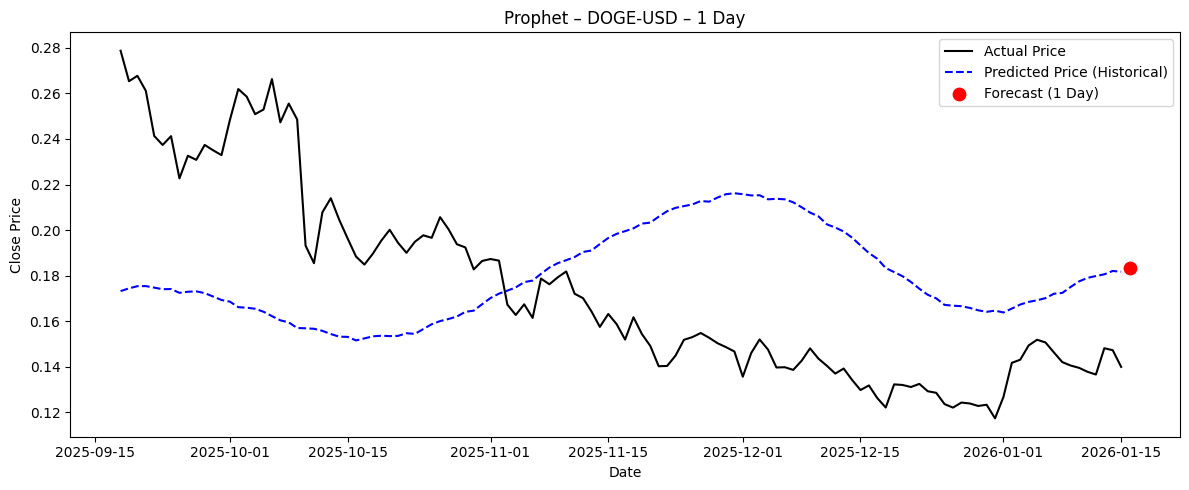

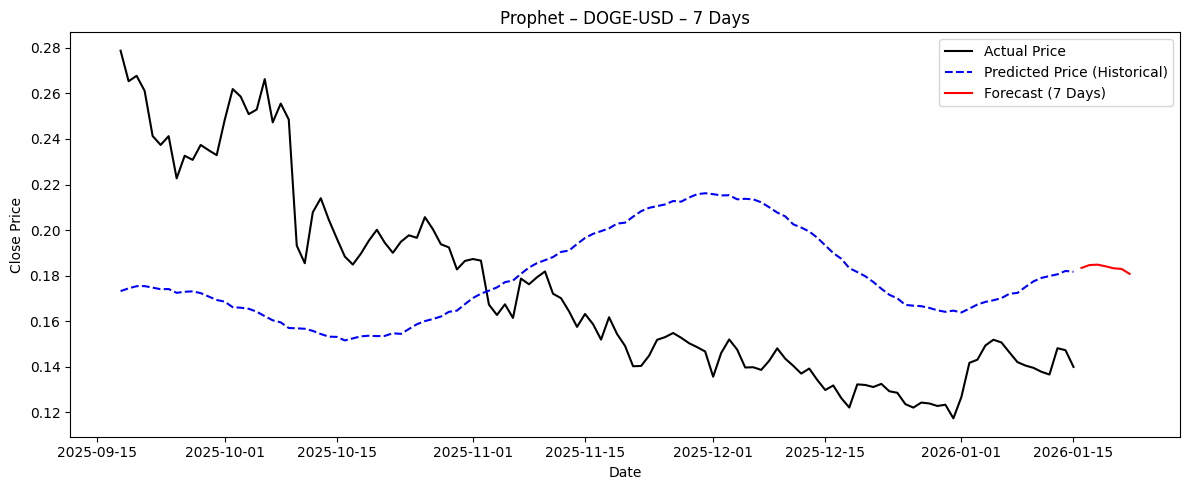

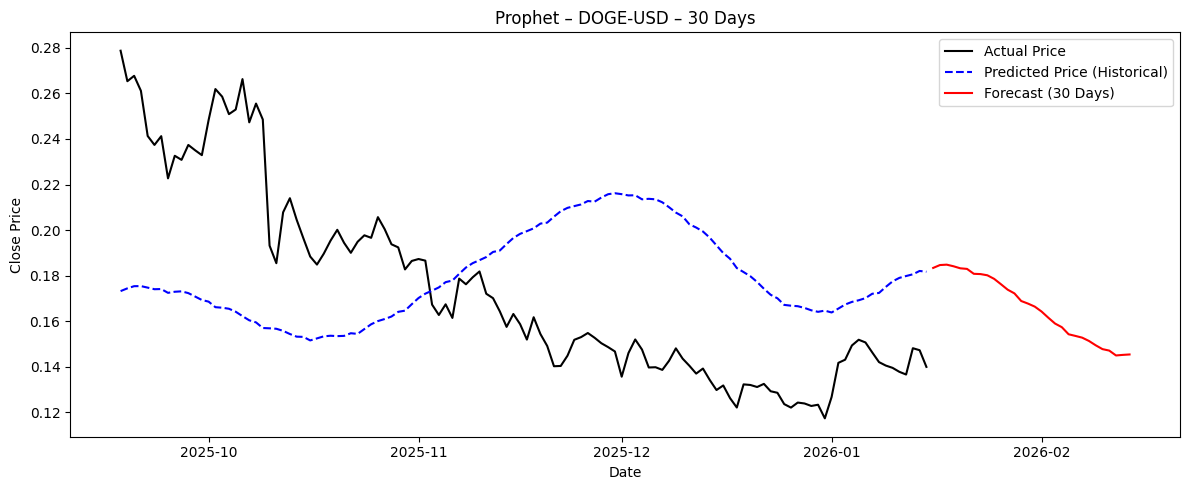

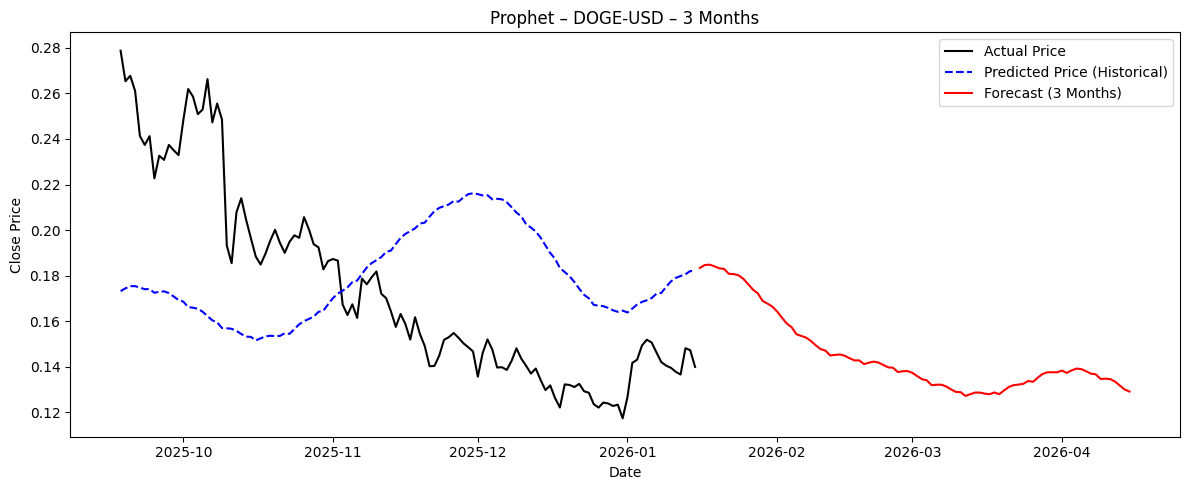


Processing coin: ALGO-USD


05:35:07 - cmdstanpy - INFO - Chain [1] start processing
05:35:08 - cmdstanpy - INFO - Chain [1] done processing


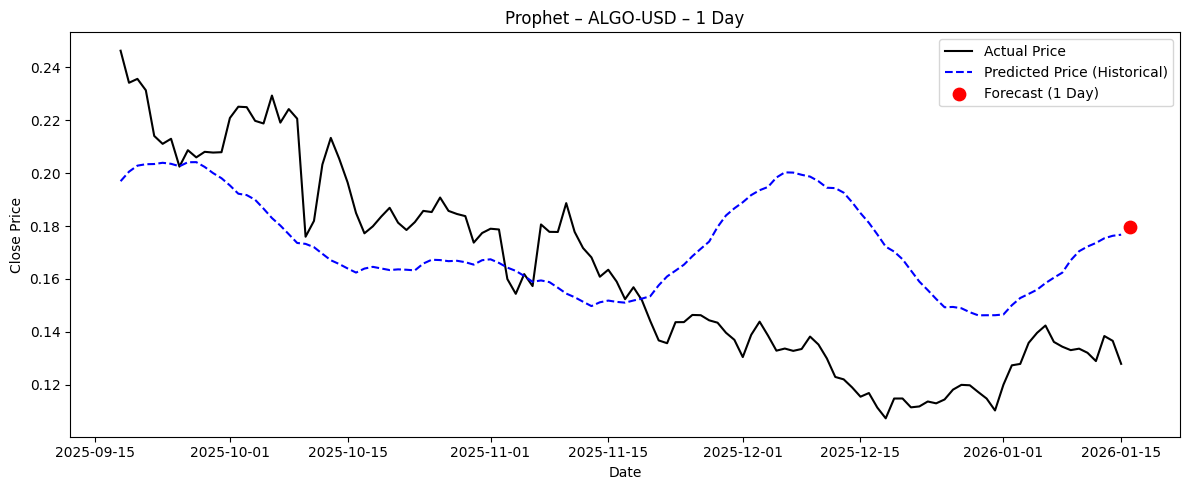

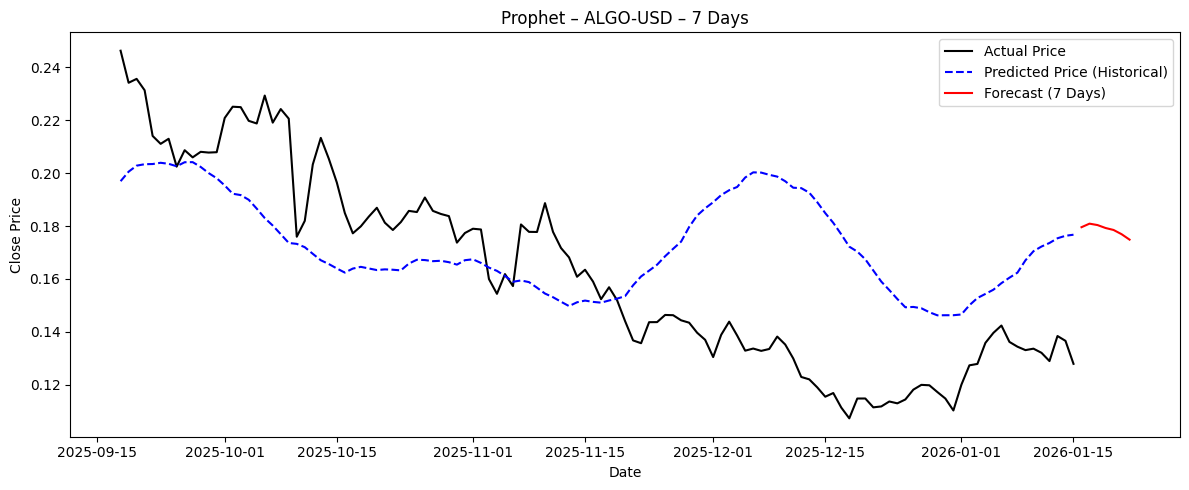

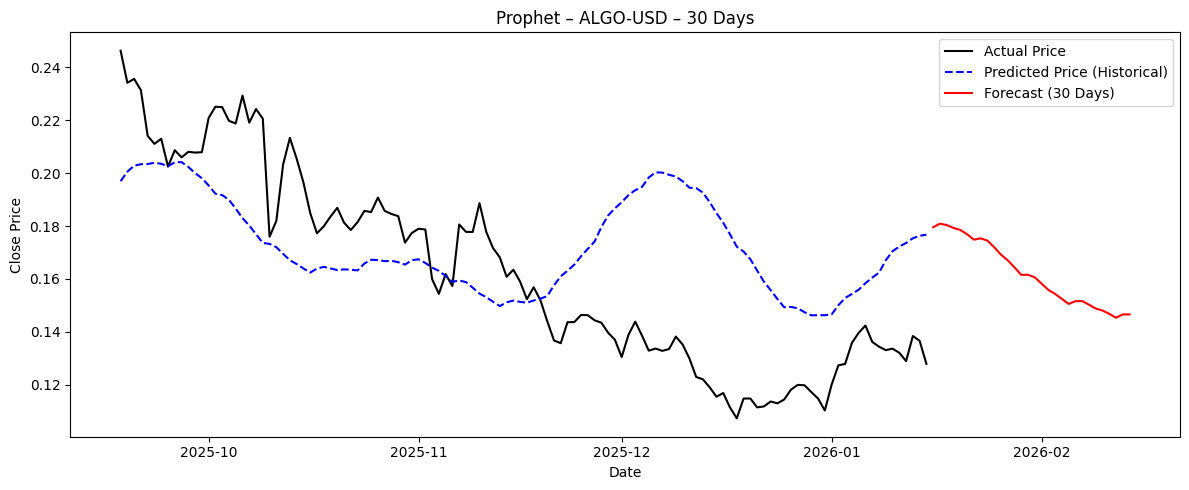

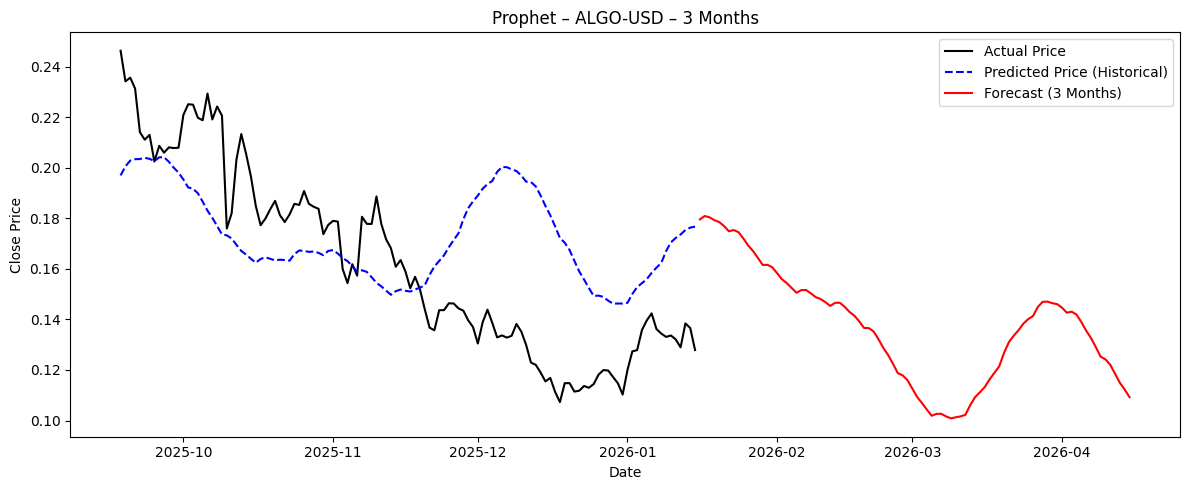


Processing coin: BNB-USD


05:35:12 - cmdstanpy - INFO - Chain [1] start processing
05:35:13 - cmdstanpy - INFO - Chain [1] done processing


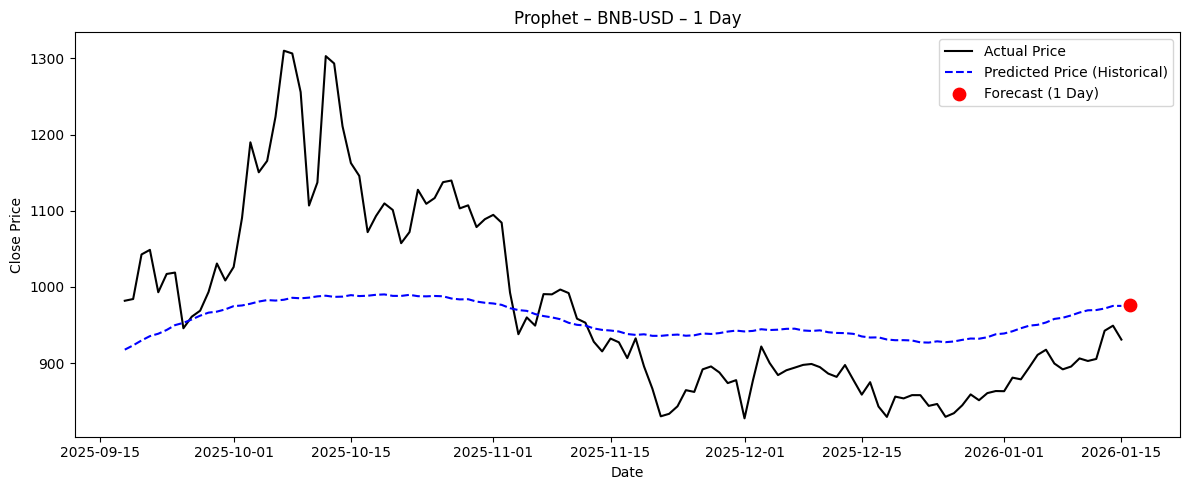

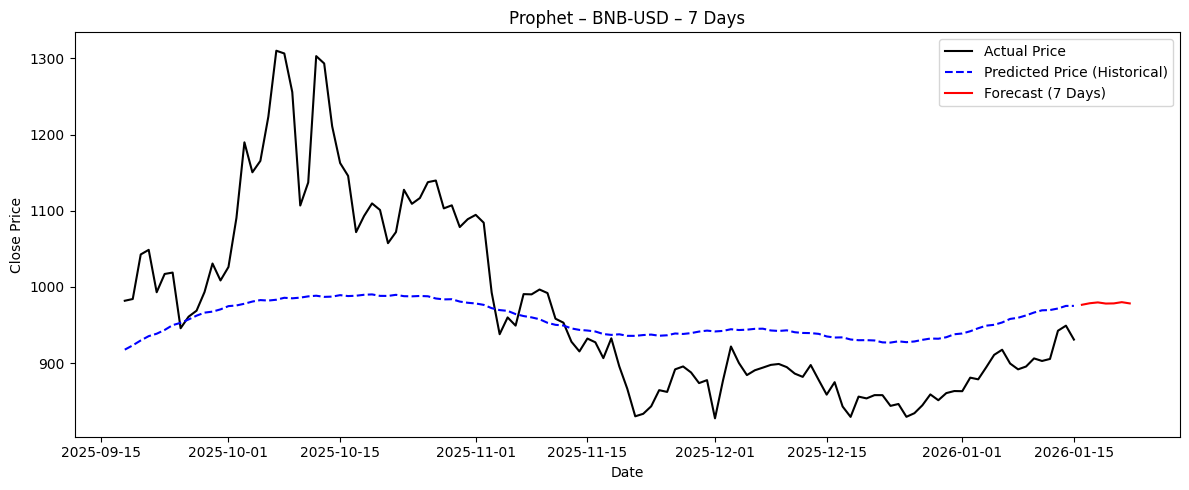

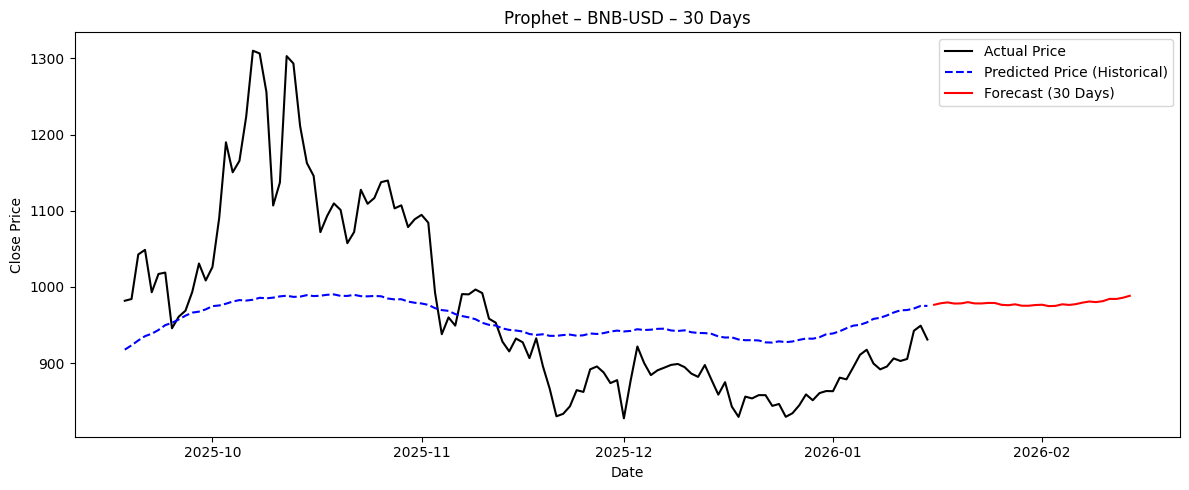

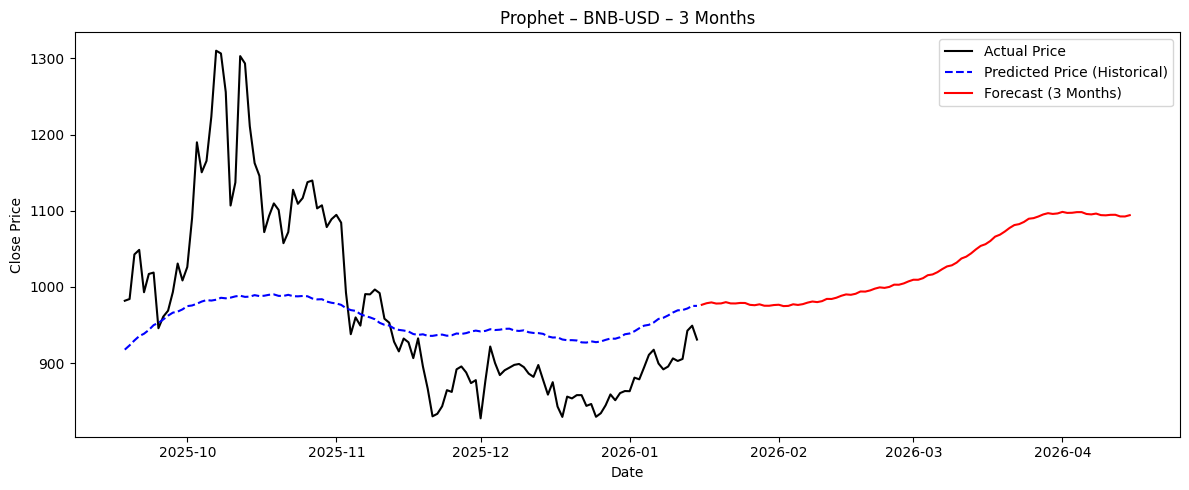


Processing coin: CRV-USD


05:35:16 - cmdstanpy - INFO - Chain [1] start processing
05:35:17 - cmdstanpy - INFO - Chain [1] done processing


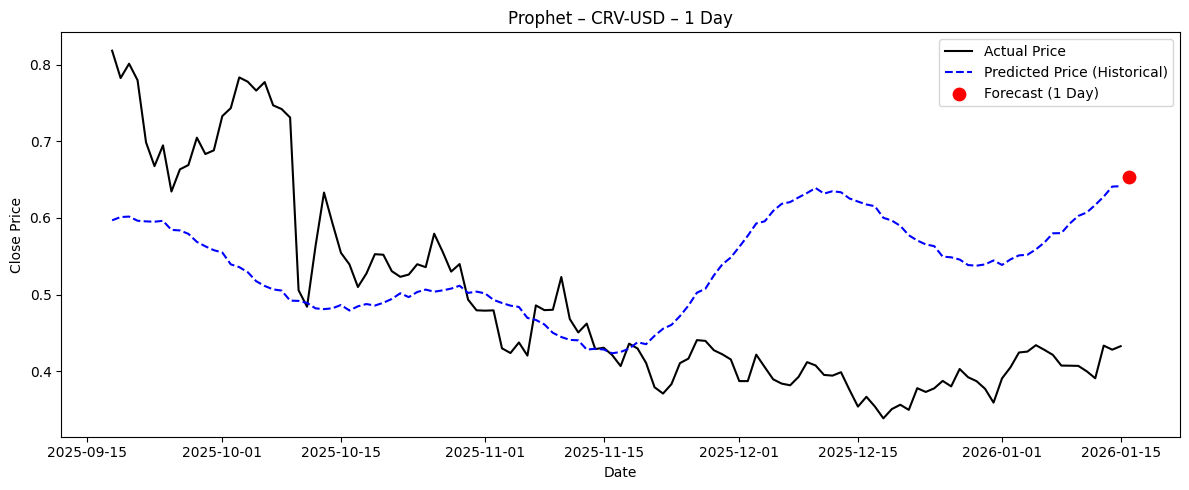

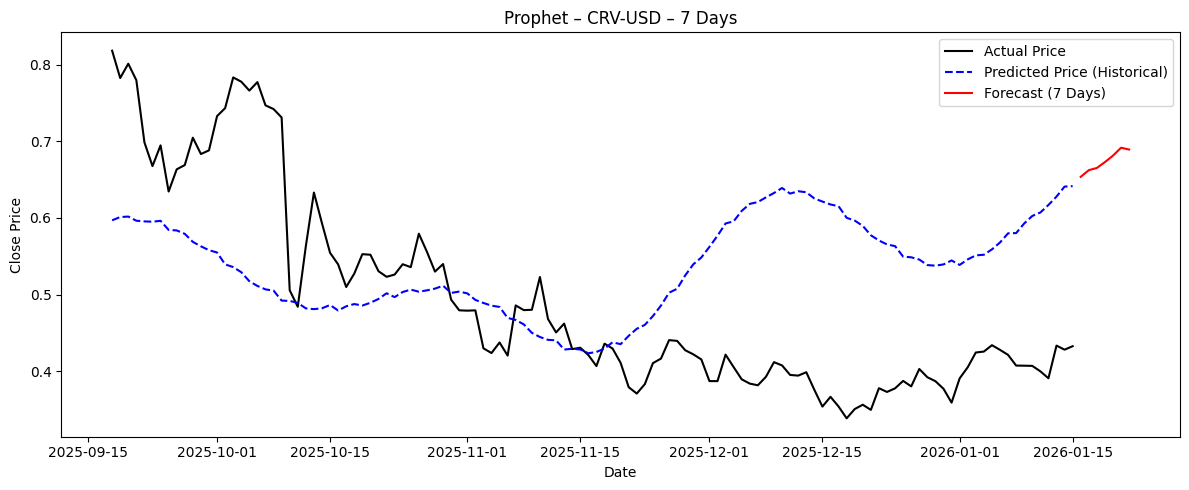

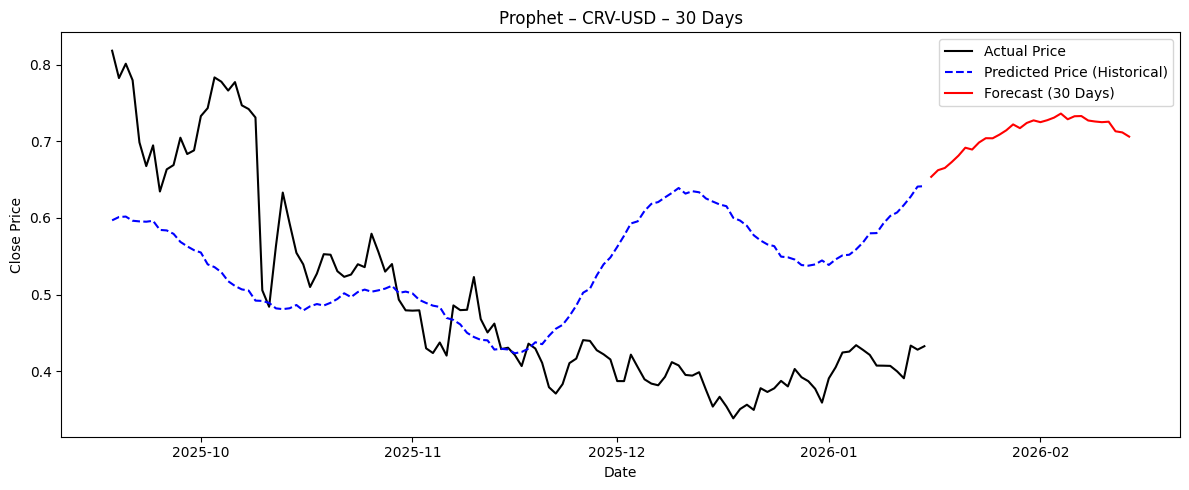

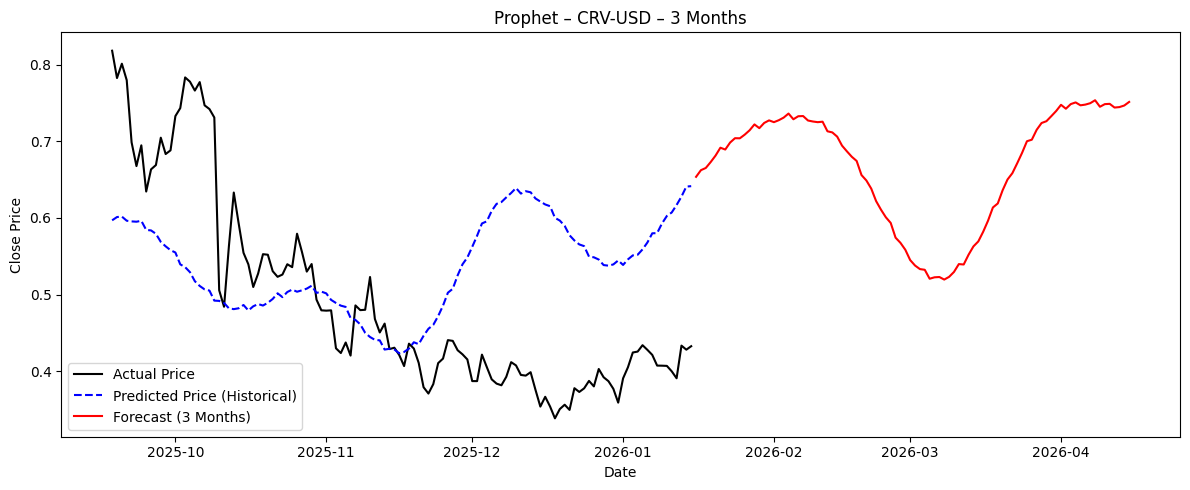


All Prophet models completed successfully.


In [89]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet



HISTORY_WINDOW = 120

HORIZONS = {
    "1 Day": 1,
    "7 Days": 7,
    "30 Days": 30,
    "3 Months": 90
}



rep_coins_df = pd.read_csv(PROJECT_ROOT/"dataset"/
    "cluster_representatives.csv"
)

selected_coins = rep_coins_df["Selected_Coin"].unique()



for coin in selected_coins:

    print("\n==============================")
    print(f"Processing coin: {coin}")
    print("==============================")

  
    coin_df = df[df["Symbol"] == coin].copy()
    coin_df["Date"] = pd.to_datetime(coin_df["Date"])
    coin_df = coin_df.sort_values("Date").reset_index(drop=True)

    if len(coin_df) < 200:
        print(f"Skipping {coin} (insufficient data)")
        continue


    prophet_df = coin_df[["Date", "Close"]].copy()
    prophet_df.columns = ["ds", "y"]


    model = Prophet(
        daily_seasonality=True,
        weekly_seasonality=True,
        yearly_seasonality=True
    )

    model.fit(prophet_df)

    historical_forecast = model.predict(prophet_df)

    last_date = prophet_df["ds"].iloc[-1]

  

    for label, days in HORIZONS.items():

        future = model.make_future_dataframe(periods=days, freq="D")
        forecast = model.predict(future)

        forecast_future = forecast.tail(days)

        plt.figure(figsize=(12, 5))

        plt.plot(
            prophet_df["ds"].iloc[-HISTORY_WINDOW:],
            prophet_df["y"].iloc[-HISTORY_WINDOW:],
            label="Actual Price",
            color="black"
        )

        plt.plot(
            historical_forecast["ds"].iloc[-HISTORY_WINDOW:],
            historical_forecast["yhat"].iloc[-HISTORY_WINDOW:],
            linestyle="--",
            color="blue",
            label="Predicted Price (Historical)"
        )

        if days == 1:
            plt.scatter(
                forecast_future["ds"],
                forecast_future["yhat"],
                color="red",
                s=80,
                label="Forecast (1 Day)"
            )
        else:
            plt.plot(
                forecast_future["ds"],
                forecast_future["yhat"],
                color="red",
                label=f"Forecast ({label})"
            )

        plt.title(f"Prophet – {coin} – {label}")
        plt.xlabel("Date")
        plt.ylabel("Close Price")
        plt.legend()
        plt.tight_layout()
        plt.show()

 
    future_3m = model.make_future_dataframe(periods=90, freq="D")
    forecast_3m = model.predict(future_3m).tail(90)

    prophet_3m_df = forecast_3m[["ds", "yhat"]].copy()
    prophet_3m_df.columns = ["Date", "Prophet_Forecast_Close"]

    prophet_3m_df.to_csv(PROJECT_ROOT/"dataset"/"models"/
        f"prophet_{coin}_3_month_forecast.csv",
        index=False
    )

print("\nAll Prophet models completed successfully.")


#RF

In [90]:
df.columns

Index(['Date', 'Name', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Daily_Return', 'Daily_Return_%', 'Log_Return', 'SMA_7', 'SMA_14',
       'EMA_7', 'EMA_14', 'Volatility_7', 'Volatility_14', 'Momentum_7',
       'Momentum_14', 'Volume_MA_7', 'Volume_MA_14', 'Close_lag_1',
       'Close_lag_7', 'Close_lag_14', 'Return_lag_1', 'Return_lag_7',
       'target_1d', 'target_7d', 'target_30d', 'target_90d', 'target_180d',
       'target_365d'],
      dtype='object')


Processing Random Forest for DOGE-USD


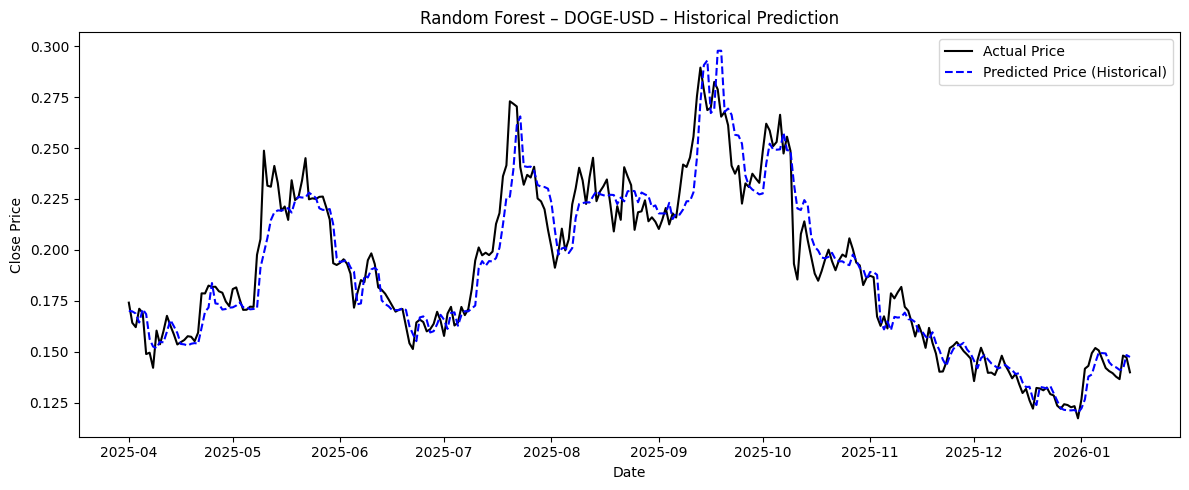

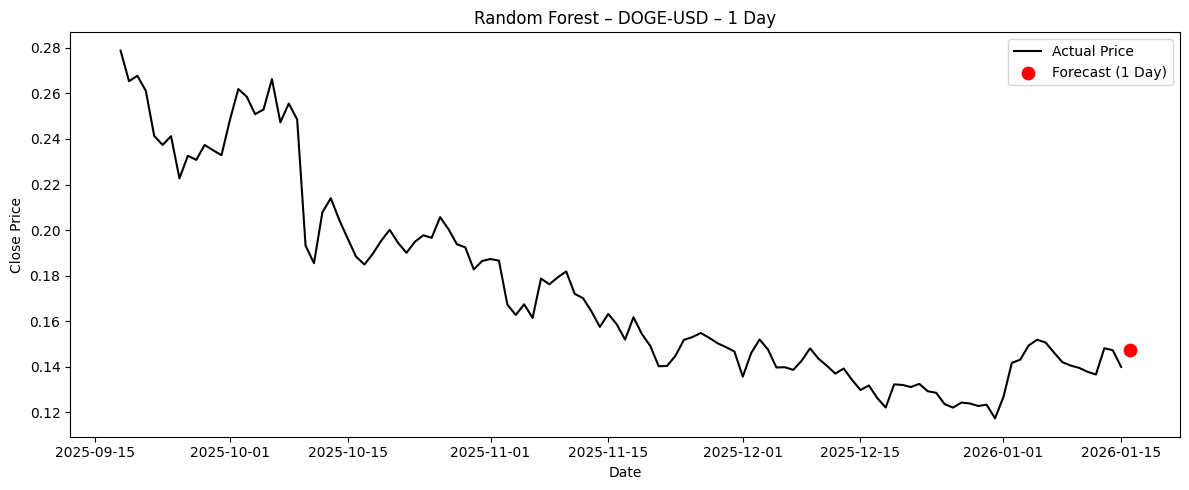

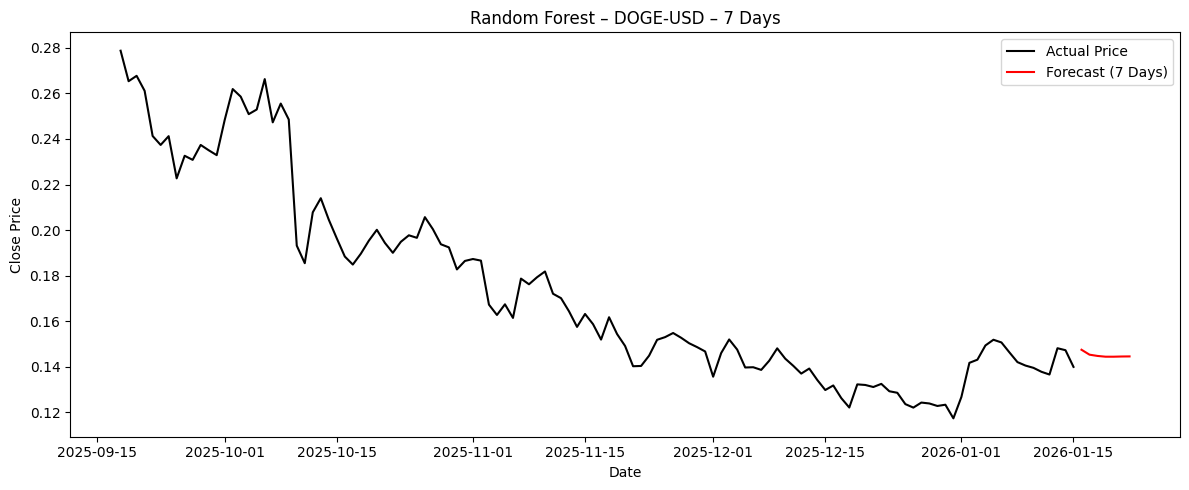

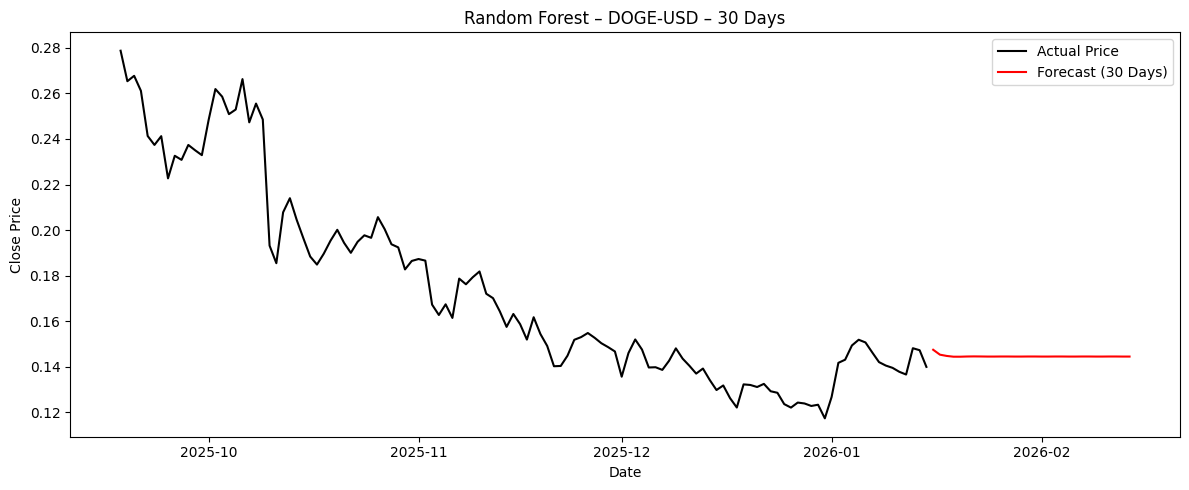

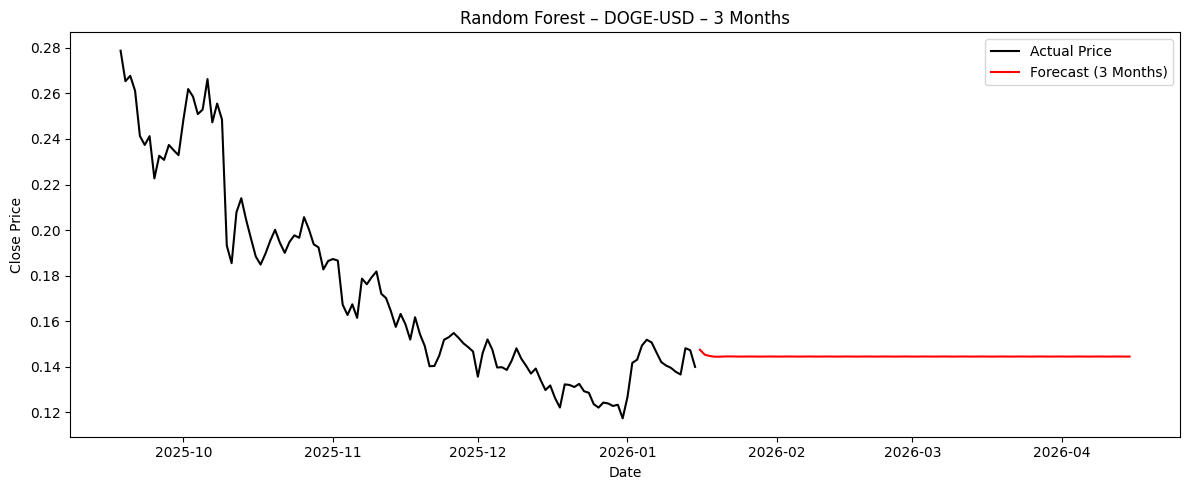


Processing Random Forest for ALGO-USD


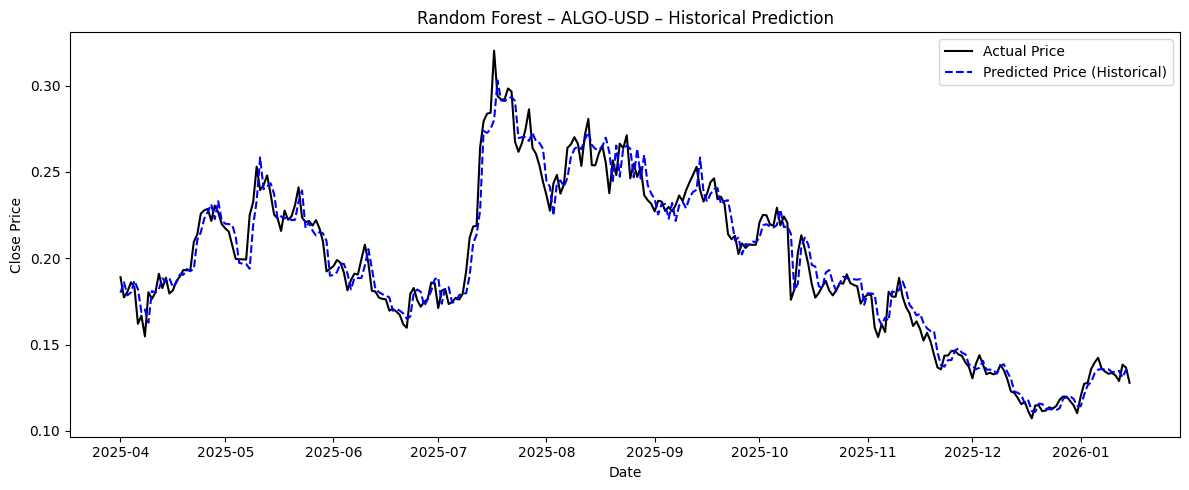

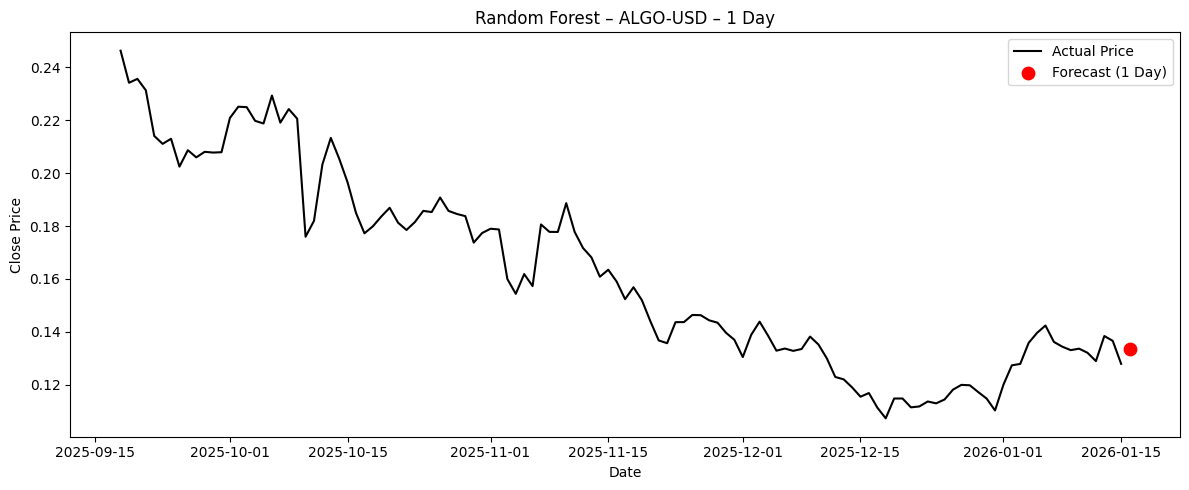

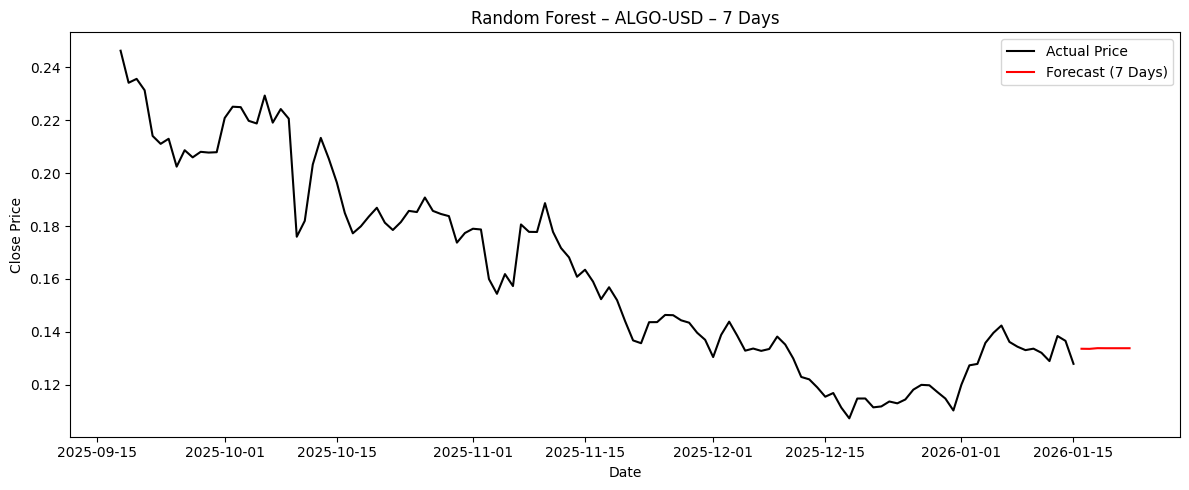

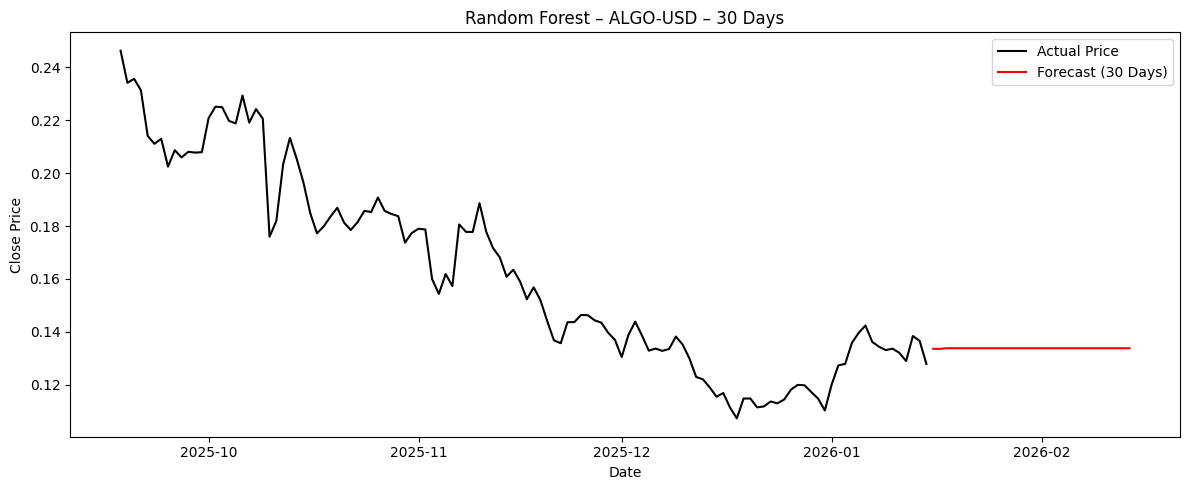

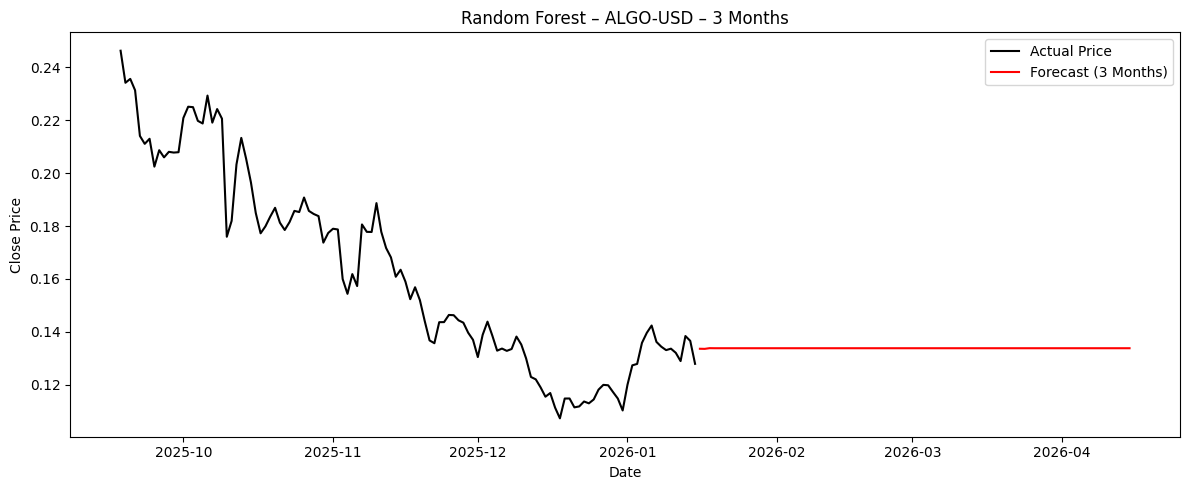


Processing Random Forest for BNB-USD


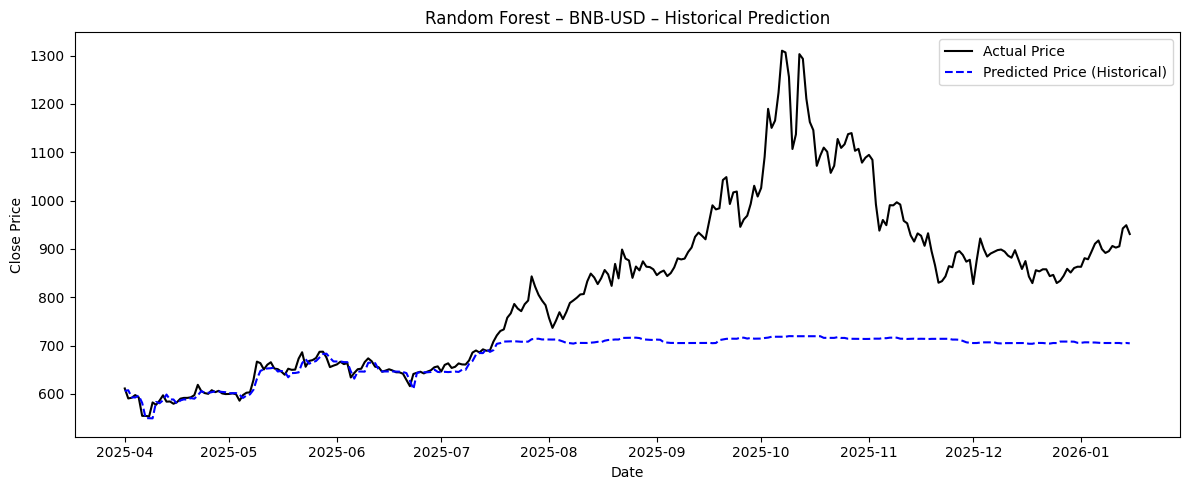

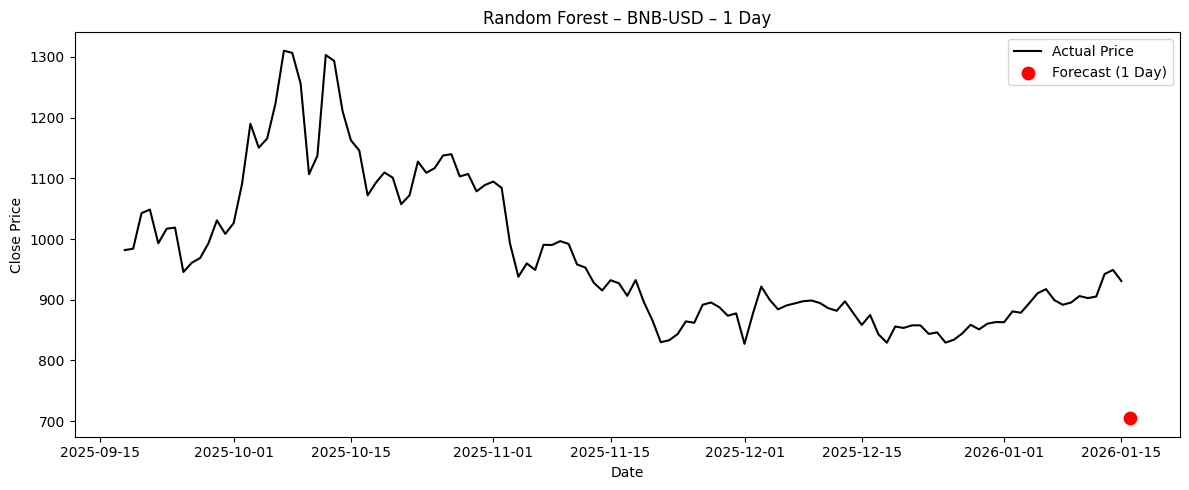

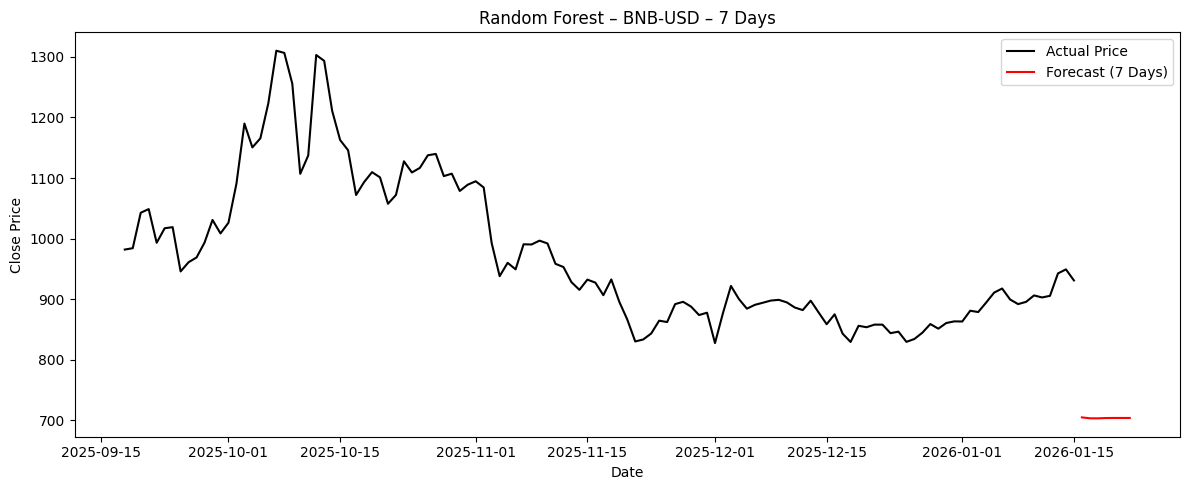

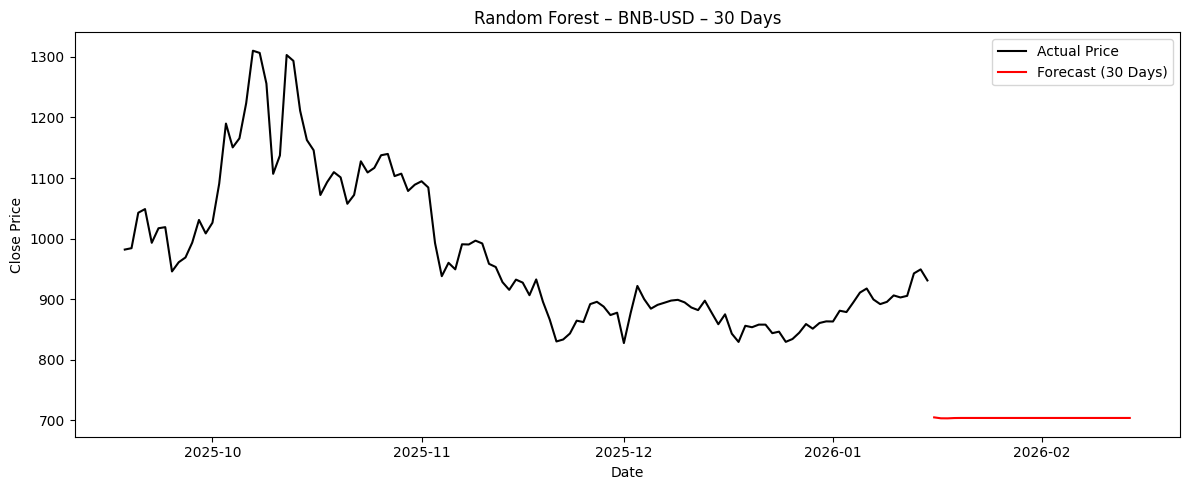

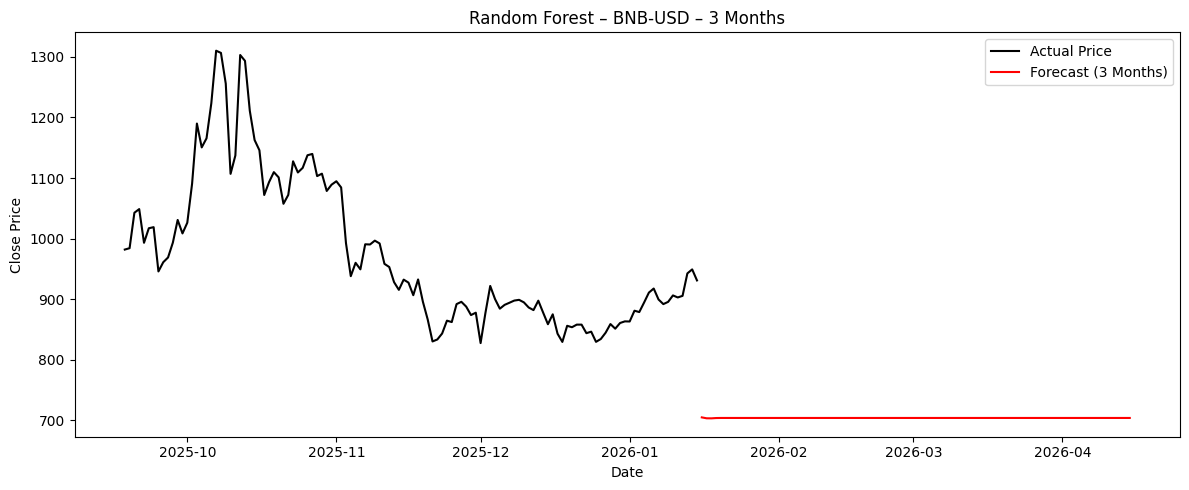


Processing Random Forest for CRV-USD


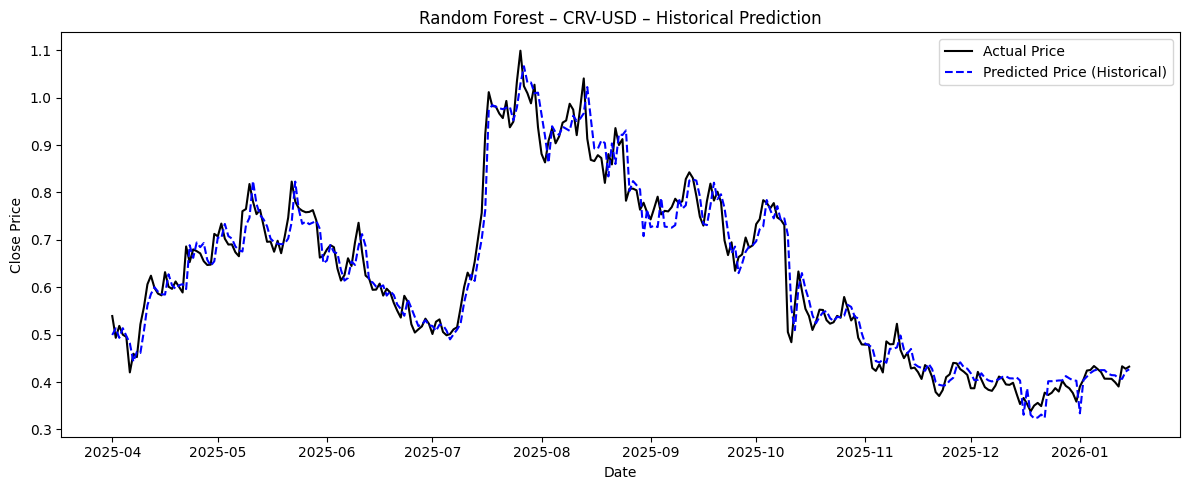

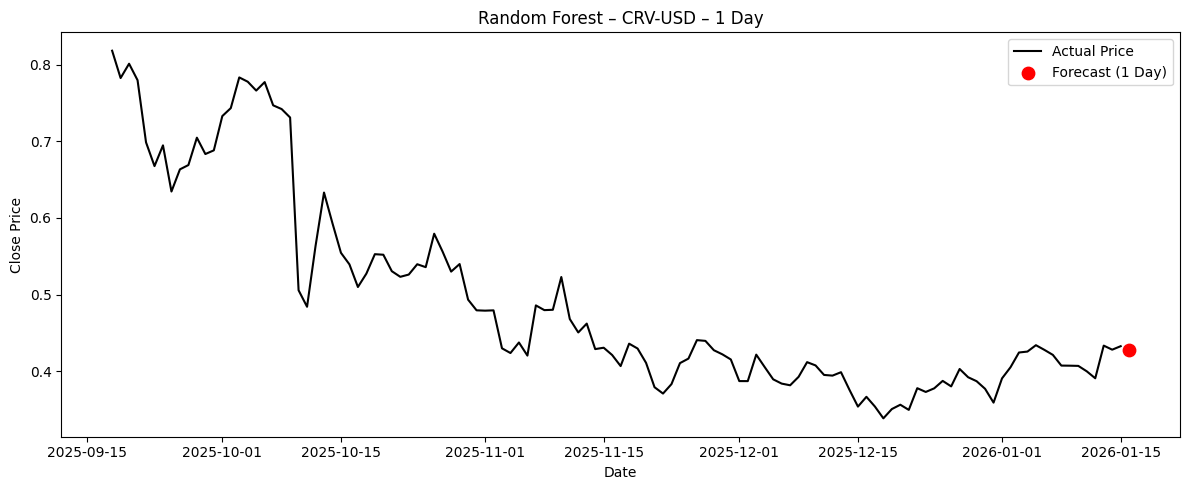

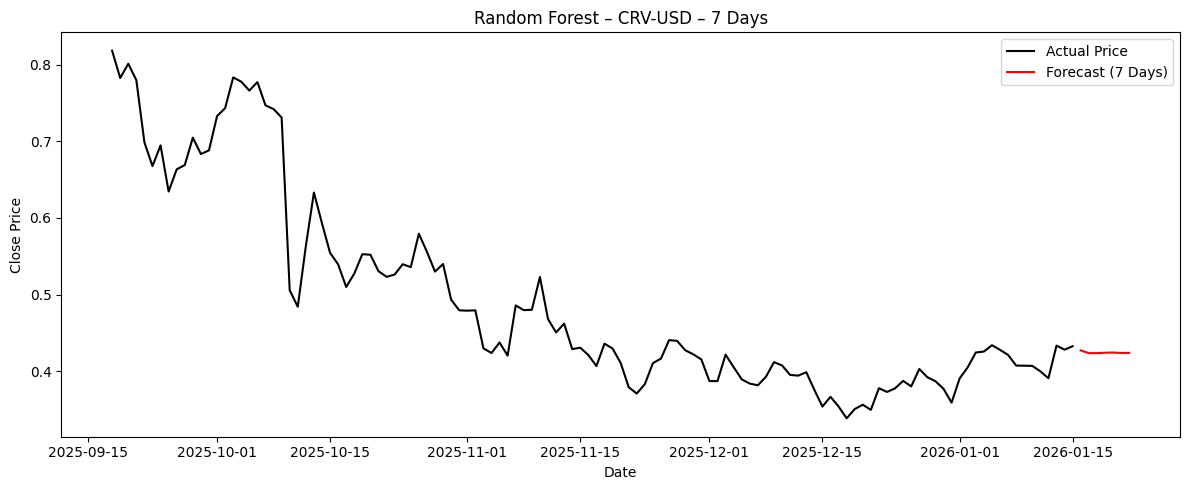

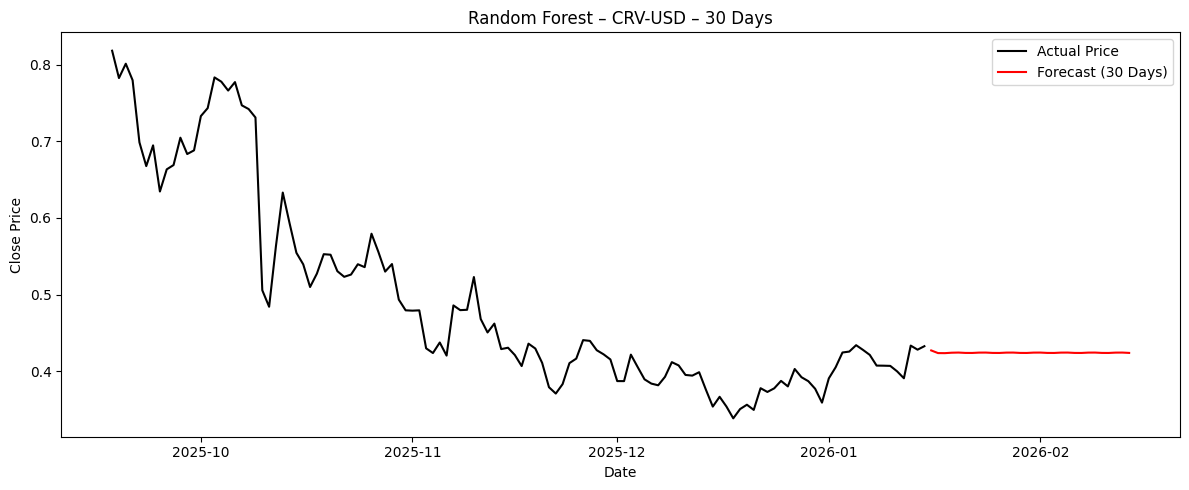

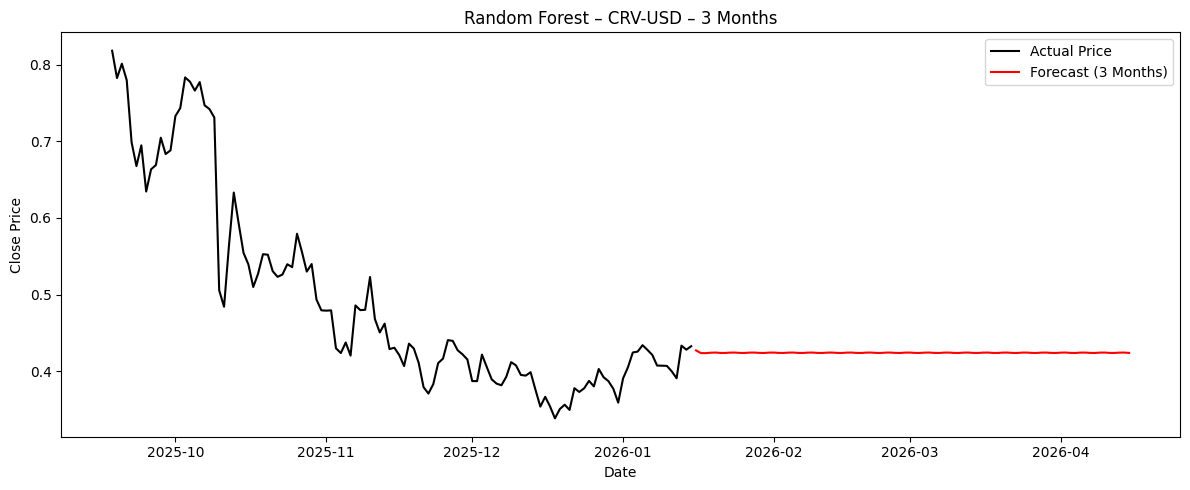


All Random Forest models completed successfully.


In [91]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor



HISTORY_WINDOW = 120

HORIZONS = {
    "1 Day": 1,
    "7 Days": 7,
    "30 Days": 30,
    "3 Months": 90
}

FEATURES = [
    "Close_lag_1", "Close_lag_7", "Close_lag_14",
    "SMA_7", "SMA_14",
    "EMA_7", "EMA_14",
    "Volatility_7", "Volatility_14",
    "Volume_MA_7", "Volume_MA_14"
]


rep_coins_df = pd.read_csv(
    PROJECT_ROOT/"dataset"/"cluster_representatives.csv"
)
selected_coins = rep_coins_df["Selected_Coin"].unique()



for coin in selected_coins:

    print(f"\nProcessing Random Forest for {coin}")

 
    coin_df = df[df["Symbol"] == coin].copy()
    coin_df["Date"] = pd.to_datetime(coin_df["Date"])
    coin_df = coin_df.sort_values("Date").reset_index(drop=True)

    df_coin = coin_df.dropna().copy()

    if len(df_coin) < 200:
        print(f"Skipping {coin} (insufficient data)")
        continue

    X = df_coin[FEATURES]
    y = df_coin["Close"]
    dates = df_coin["Date"]

    train_size = int(len(df_coin) * 0.8)

    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
    dates_test = dates.iloc[train_size:]

  

    rf_model = RandomForestRegressor(
        n_estimators=300,
        max_depth=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1
    )

    rf_model.fit(X_train, y_train)

    y_test_pred = rf_model.predict(X_test)

   

    plt.figure(figsize=(12, 5))
    plt.plot(dates_test, y_test, label="Actual Price", color="black")
    plt.plot(
        dates_test,
        y_test_pred,
        label="Predicted Price (Historical)",
        linestyle="--",
        color="blue"
    )
    plt.title(f"Random Forest – {coin} – Historical Prediction")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    plt.tight_layout()
    plt.show()

    

    def forecast_rf(model, last_row_df, n_days):
        forecasts = []
        current_row = last_row_df.copy()

        for _ in range(n_days):
            pred = model.predict(current_row)[0]
            forecasts.append(pred)

            current_row["Close_lag_14"] = current_row["Close_lag_7"].values
            current_row["Close_lag_7"] = current_row["Close_lag_1"].values
            current_row["Close_lag_1"] = pred

        return np.array(forecasts)

    last_row_df = X.iloc[[-1]]   
    last_date = df_coin["Date"].iloc[-1]


    for label, days in HORIZONS.items():

        forecast_vals = forecast_rf(rf_model, last_row_df, days)

        future_dates = pd.date_range(
            start=last_date + pd.Timedelta(days=1),
            periods=days,
            freq="D"
        )

        plt.figure(figsize=(12, 5))

        # Actual
        plt.plot(
            df_coin["Date"].iloc[-HISTORY_WINDOW:],
            df_coin["Close"].iloc[-HISTORY_WINDOW:],
            label="Actual Price",
            color="black"
        )

        # Forecast
        if days == 1:
            plt.scatter(
                future_dates,
                forecast_vals,
                color="red",
                s=80,
                label="Forecast (1 Day)"
            )
        else:
            plt.plot(
                future_dates,
                forecast_vals,
                color="red",
                label=f"Forecast ({label})"
            )

        plt.title(f"Random Forest – {coin} – {label}")
        plt.xlabel("Date")
        plt.ylabel("Close Price")
        plt.legend()
        plt.tight_layout()
        plt.show()



    rf_3m = forecast_rf(rf_model, last_row_df, 90)

    rf_3m_df = pd.DataFrame({
        "Date": pd.date_range(
            start=last_date + pd.Timedelta(days=1),
            periods=90,
            freq="D"
        ),
        "RF_Forecast_Close": rf_3m
    })

    rf_3m_df.to_csv(PROJECT_ROOT/"dataset"/"models"/
        f"rf_{coin}_3_month_forecast.csv",
        index=False
    )

print("\nAll Random Forest models completed successfully.")


#XGBOOST


Processing XGBoost for DOGE-USD


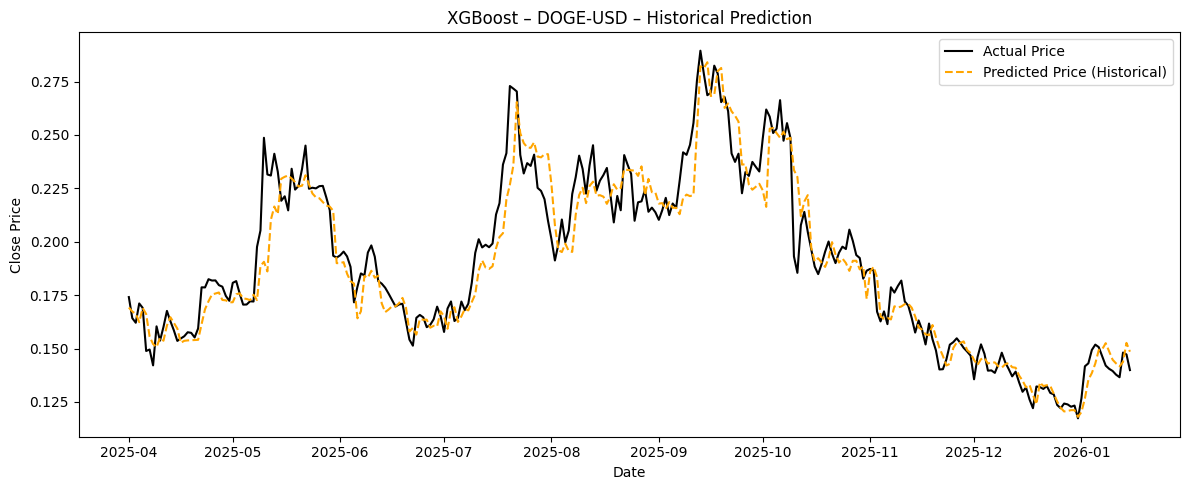

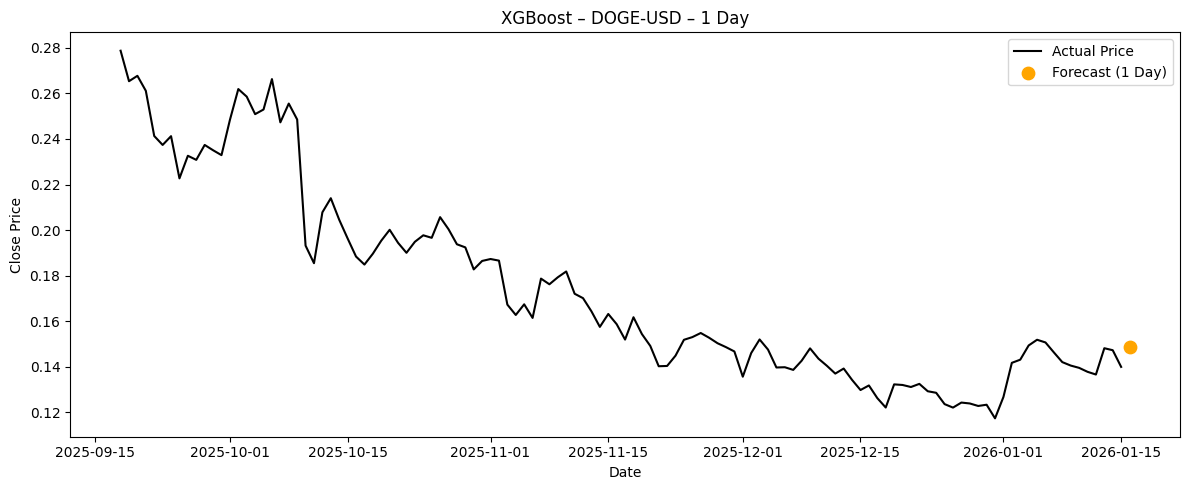

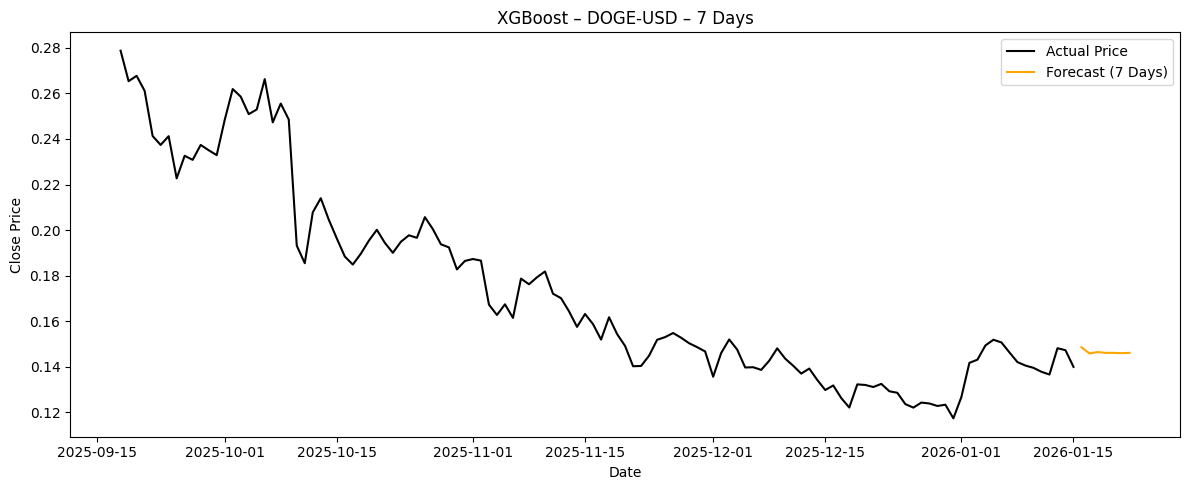

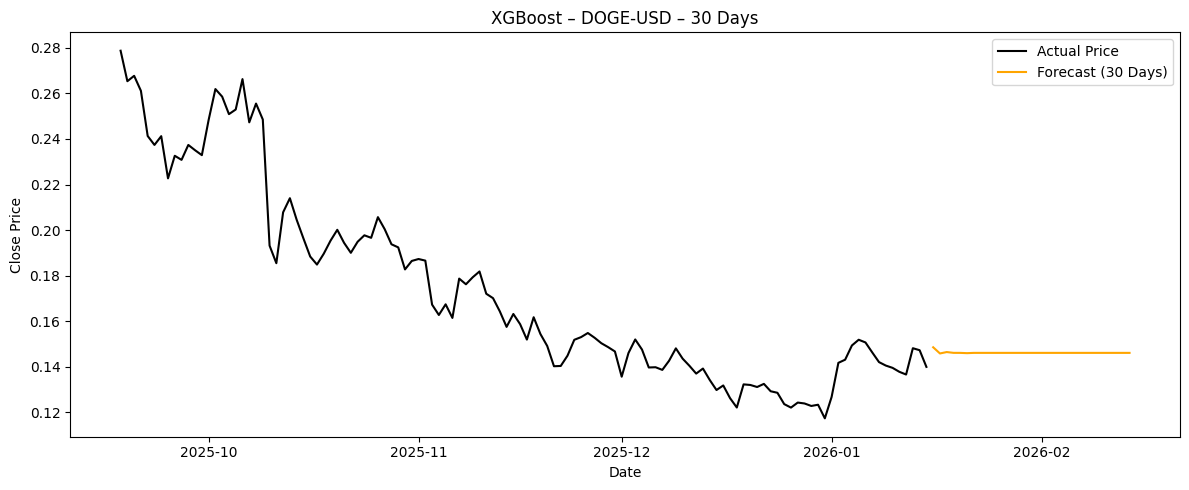

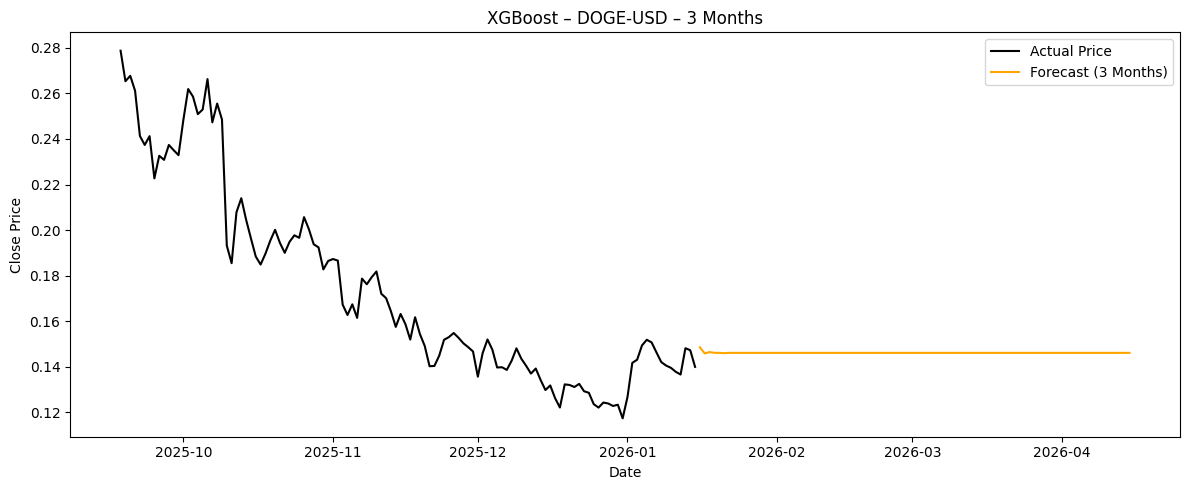


Processing XGBoost for ALGO-USD


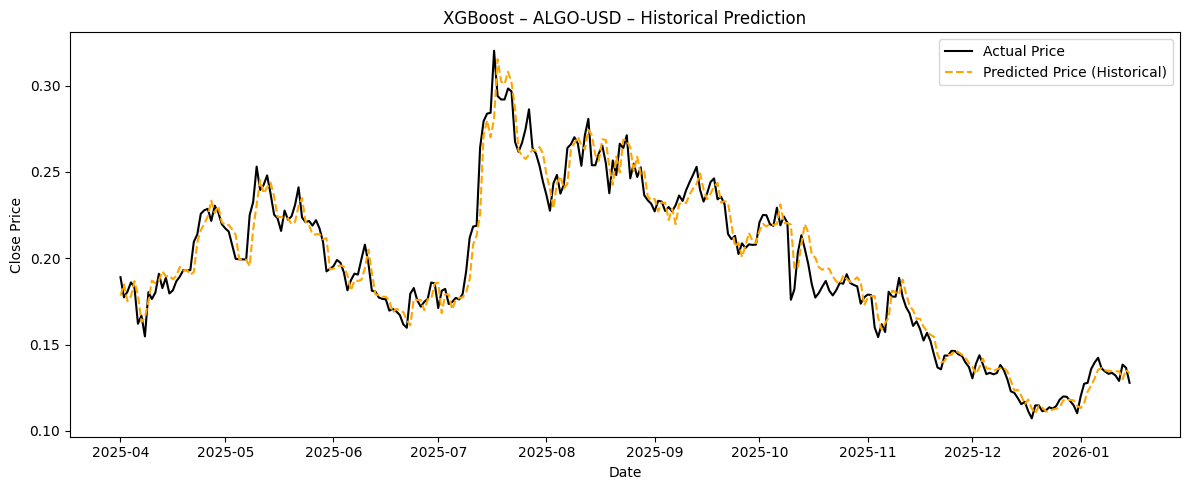

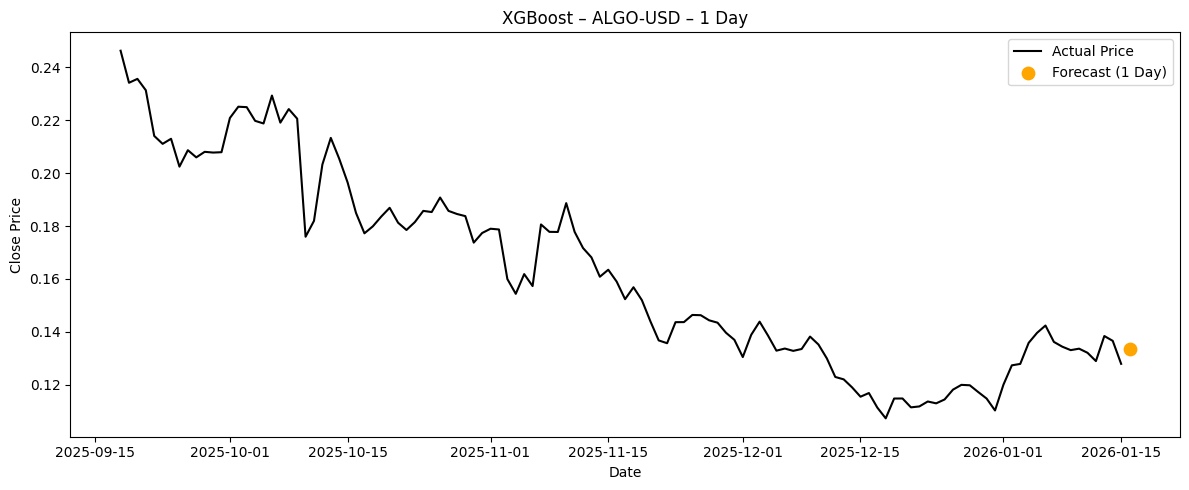

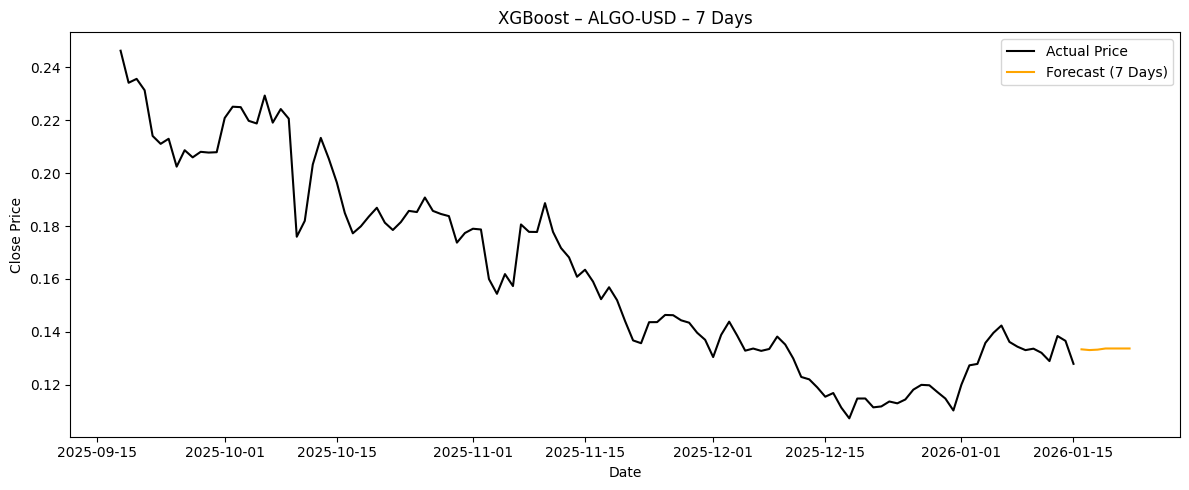

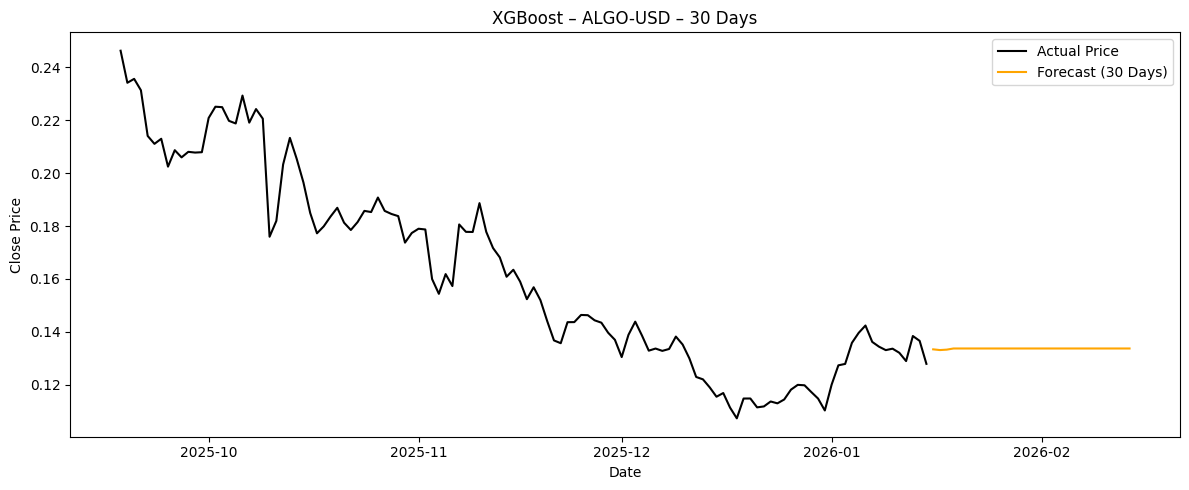

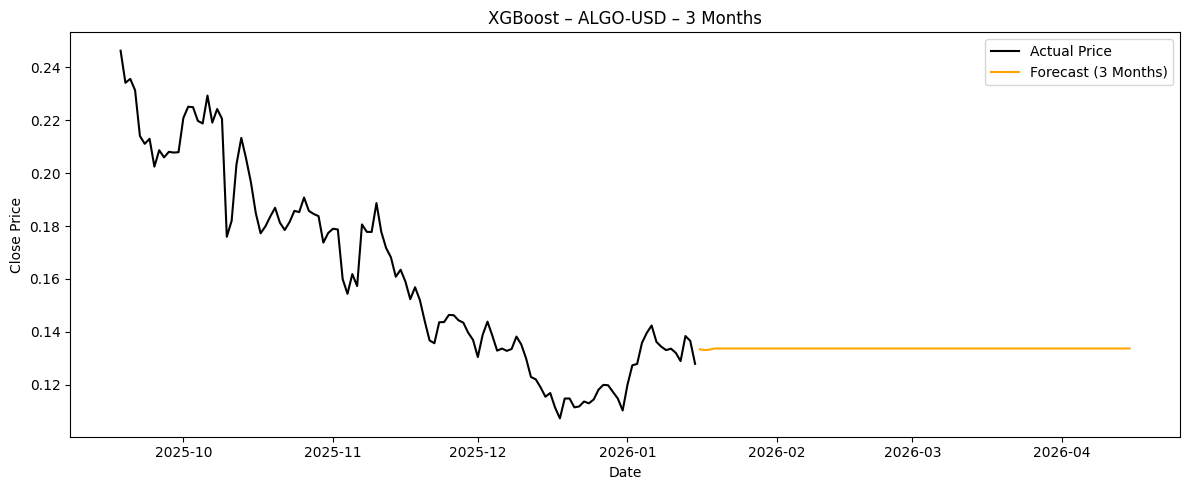


Processing XGBoost for BNB-USD


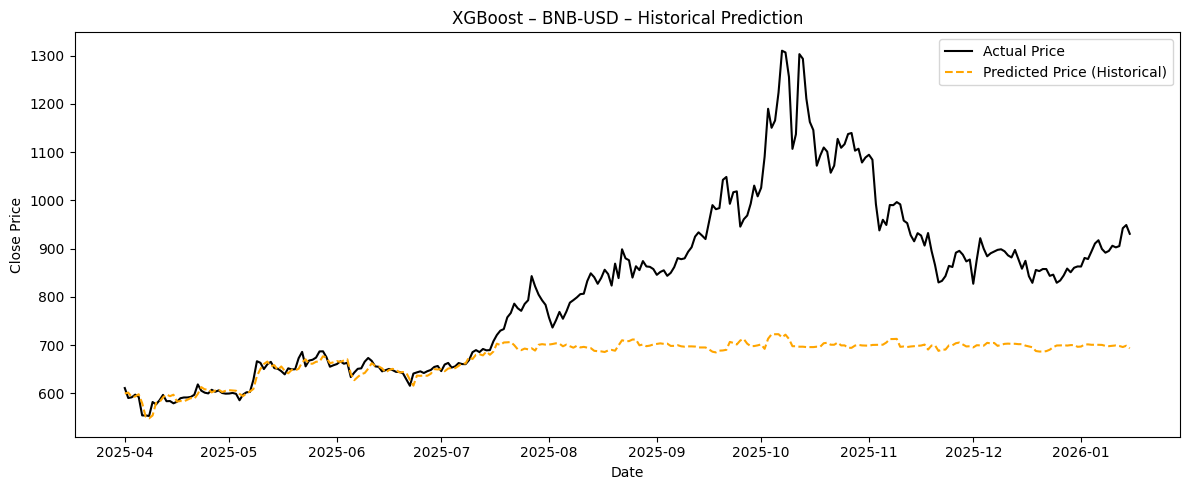

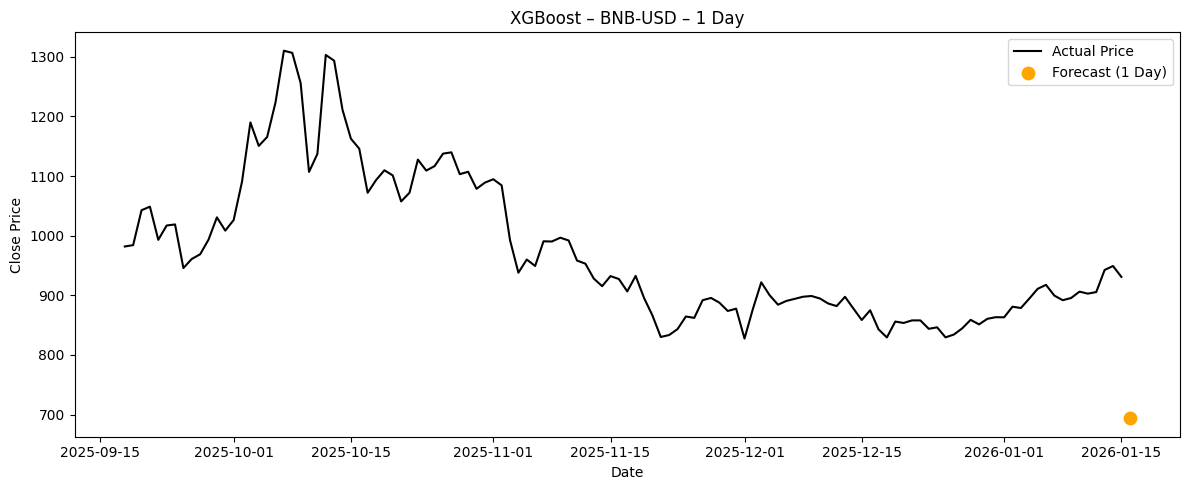

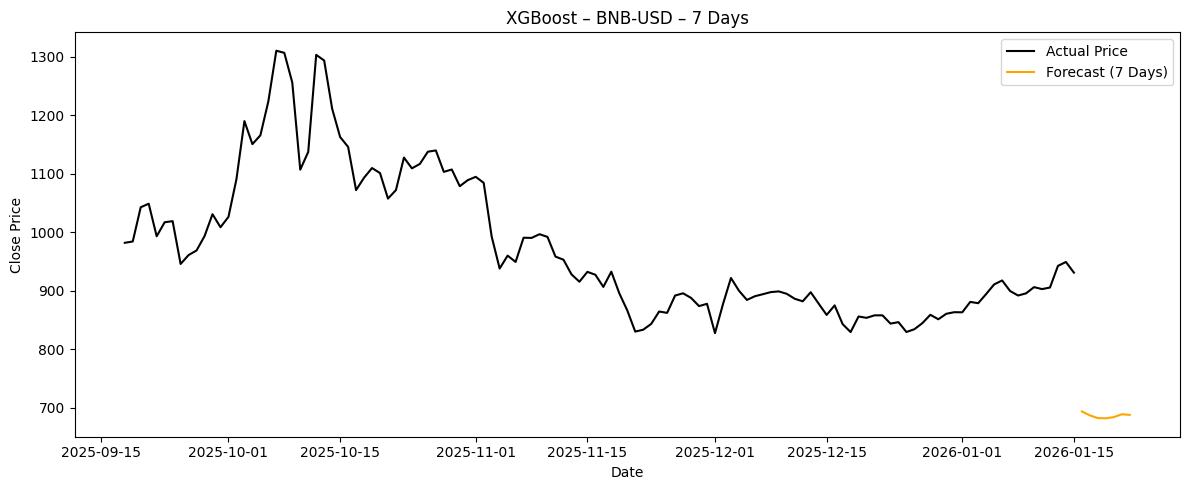

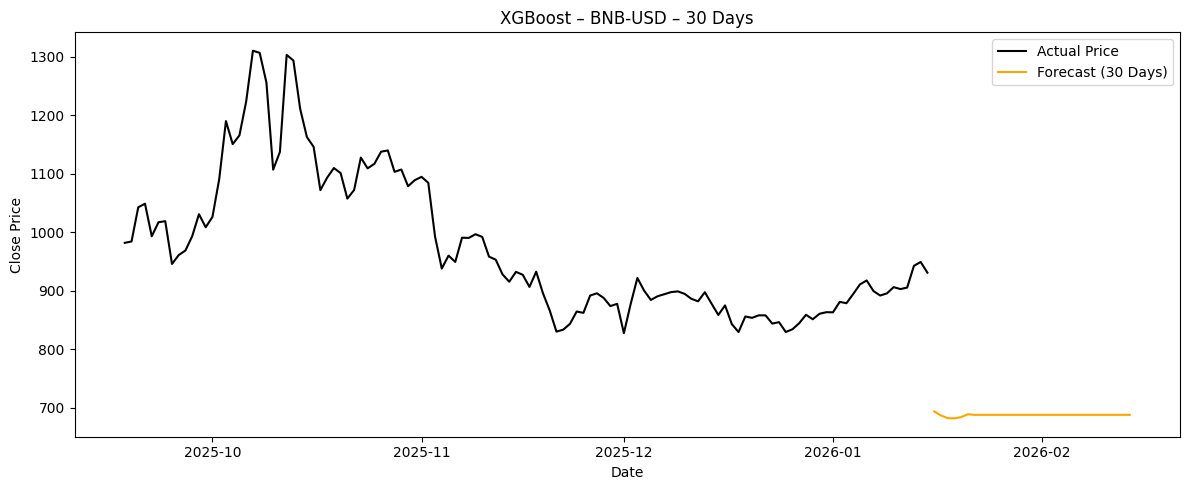

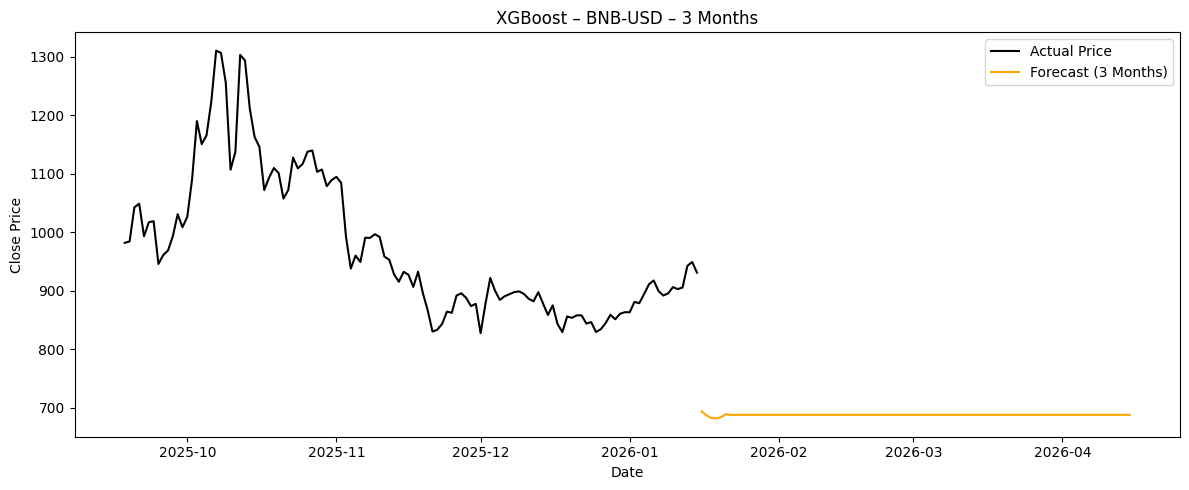


Processing XGBoost for CRV-USD


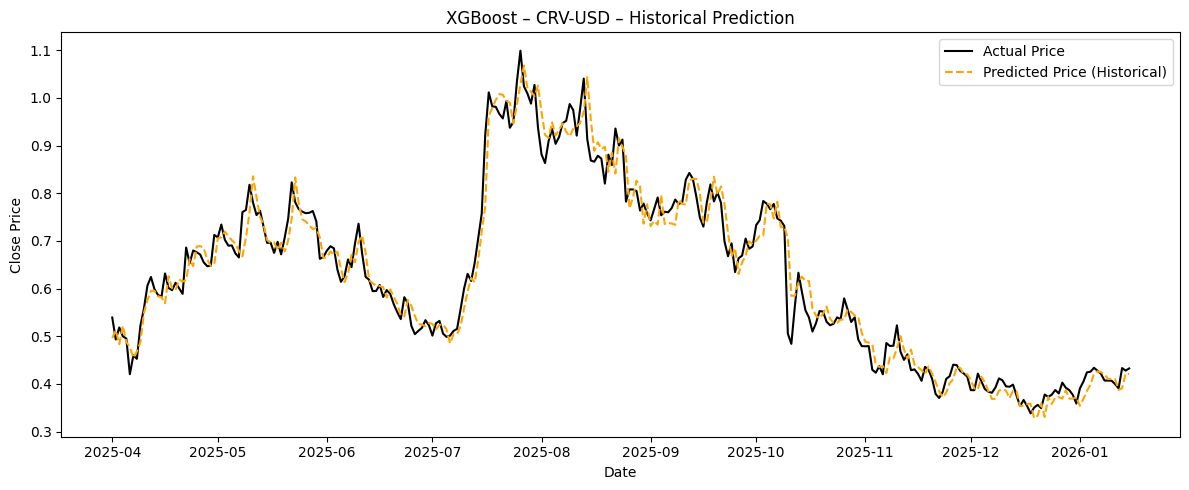

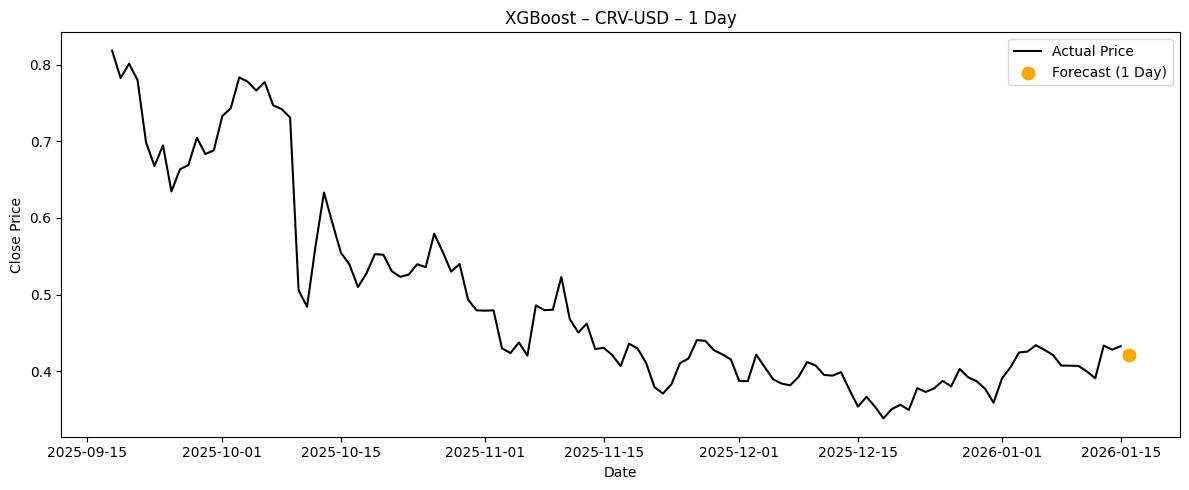

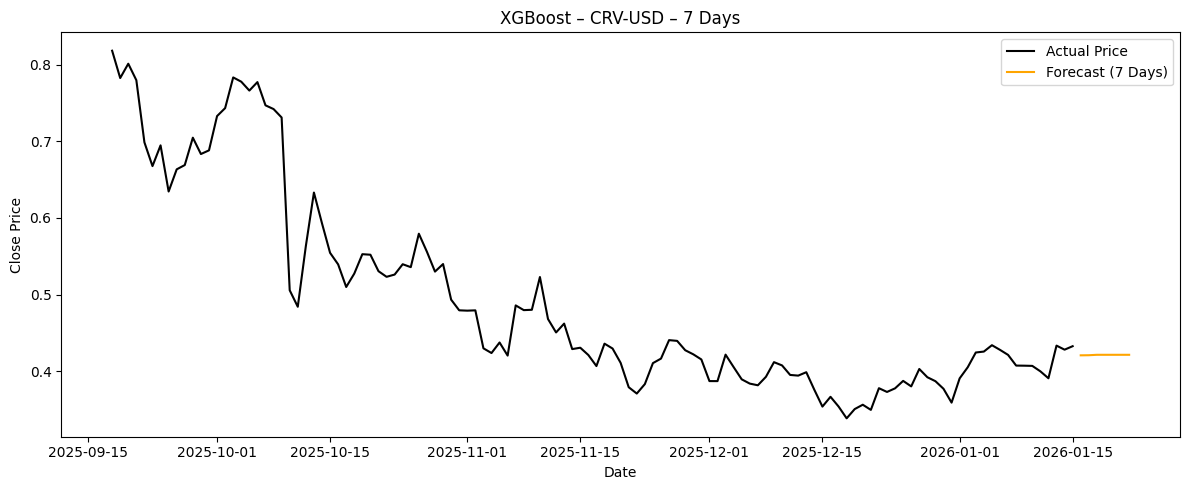

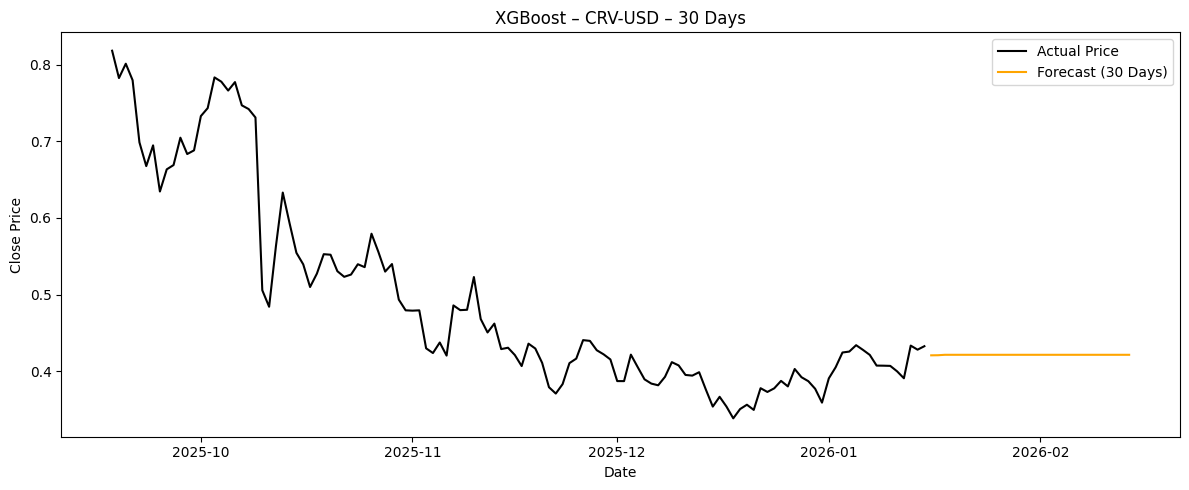

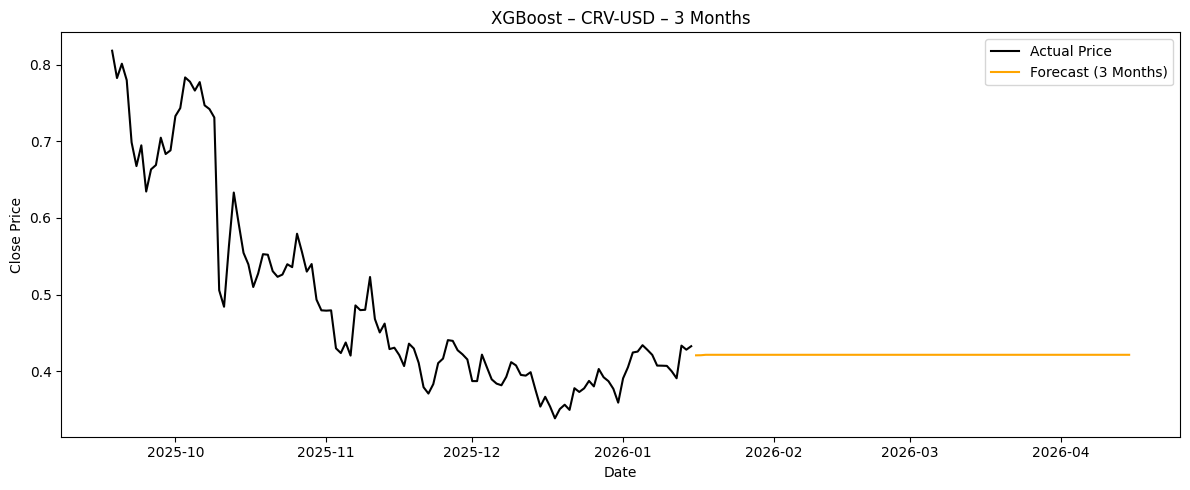


All XGBoost models completed successfully.


In [94]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor



HISTORY_WINDOW = 120

HORIZONS = {
    "1 Day": 1,
    "7 Days": 7,
    "30 Days": 30,
    "3 Months": 90
}

FEATURES = [
    "Close_lag_1", "Close_lag_7", "Close_lag_14",
    "SMA_7", "SMA_14",
    "EMA_7", "EMA_14",
    "Volatility_7", "Volatility_14",
    "Volume_MA_7", "Volume_MA_14"
]



rep_coins_df = pd.read_csv(PROJECT_ROOT/"dataset"/"cluster_representatives.csv")
selected_coins = rep_coins_df["Selected_Coin"].unique()



for coin in selected_coins:

    print(f"\nProcessing XGBoost for {coin}")

 
    coin_df = df[df["Symbol"] == coin].copy()
    coin_df["Date"] = pd.to_datetime(coin_df["Date"])
    coin_df = coin_df.sort_values("Date").reset_index(drop=True)

    df_coin = coin_df.dropna().copy()

    if len(df_coin) < 200:
        print(f"Skipping {coin} (insufficient data)")
        continue

    X = df_coin[FEATURES]
    y = df_coin["Close"]
    dates = df_coin["Date"]

    train_size = int(len(df_coin) * 0.8)

    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
    dates_test = dates.iloc[train_size:]

  

    xgb_model = XGBRegressor(
        n_estimators=300,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1
    )

    xgb_model.fit(X_train, y_train)

    y_test_pred = xgb_model.predict(X_test)

   

    plt.figure(figsize=(12, 5))
    plt.plot(dates_test, y_test, label="Actual Price", color="black")
    plt.plot(
        dates_test,
        y_test_pred,
        label="Predicted Price (Historical)",
        linestyle="--",
        color="orange"
    )
    plt.title(f"XGBoost – {coin} – Historical Prediction")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    plt.tight_layout()
    plt.show()

   

    def forecast_xgb(model, last_row_df, n_days):
        forecasts = []
        current_row = last_row_df.copy()

        for _ in range(n_days):
            pred = model.predict(current_row)[0]
            forecasts.append(pred)

            current_row["Close_lag_14"] = current_row["Close_lag_7"].values
            current_row["Close_lag_7"] = current_row["Close_lag_1"].values
            current_row["Close_lag_1"] = pred

        return np.array(forecasts)

    last_row_df = X.iloc[[-1]]  
    last_date = df_coin["Date"].iloc[-1]

  

    for label, days in HORIZONS.items():

        forecast_vals = forecast_xgb(xgb_model, last_row_df, days)

        future_dates = pd.date_range(
            start=last_date + pd.Timedelta(days=1),
            periods=days,
            freq="D"
        )

        plt.figure(figsize=(12, 5))

        plt.plot(
            df_coin["Date"].iloc[-HISTORY_WINDOW:],
            df_coin["Close"].iloc[-HISTORY_WINDOW:],
            label="Actual Price",
            color="black"
        )

        if days == 1:
            plt.scatter(
                future_dates,
                forecast_vals,
                color="orange",
                s=80,
                label="Forecast (1 Day)"
            )
        else:
            plt.plot(
                future_dates,
                forecast_vals,
                color="orange",
                label=f"Forecast ({label})"
            )

        plt.title(f"XGBoost – {coin} – {label}")
        plt.xlabel("Date")
        plt.ylabel("Close Price")
        plt.legend()
        plt.tight_layout()
        plt.show()



    xgb_3m = forecast_xgb(xgb_model, last_row_df, 90)

    xgb_3m_df = pd.DataFrame({
        "Date": pd.date_range(
            start=last_date + pd.Timedelta(days=1),
            periods=90,
            freq="D"
        ),
        "XGBoost_Forecast_Close": xgb_3m
    })

    xgb_3m_df.to_csv(PROJECT_ROOT/"dataset"/"models"/
        f"xgb_{coin}_3_month_forecast.csv",
        index=False
    )

print("\nAll XGBoost models completed successfully.")


#Evaluation

In [95]:


import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input



def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def smape(y_true, y_pred):
    return np.mean(
        2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))
    ) * 100


LOOKBACK = 30

FEATURES = [
    "Close_lag_1", "Close_lag_7", "Close_lag_14",
    "SMA_7", "SMA_14",
    "EMA_7", "EMA_14",
    "Volatility_7", "Volatility_14",
    "Volume_MA_7", "Volume_MA_14"
]



rep_coins_df = pd.read_csv(PROJECT_ROOT/"dataset"/
    "cluster_representatives.csv"
)

selected_coins = rep_coins_df["Selected_Coin"].unique()



results = []



for coin in selected_coins:

    print(f"Evaluating models for {coin}")

    coin_df = df[df["Symbol"] == coin].copy()
    coin_df["Date"] = pd.to_datetime(coin_df["Date"])
    coin_df = coin_df.sort_values("Date").reset_index(drop=True)
    coin_df = coin_df.dropna()

    if len(coin_df) < 200:
        continue

    split_idx = int(len(coin_df) * 0.8)

    train_df = coin_df.iloc[:split_idx]
    test_df  = coin_df.iloc[split_idx:]

    y_true = test_df["Close"].values



    ts_train = (
        train_df
        .set_index("Date")["Close"]
        .asfreq("D")
    )

    arima_model = ARIMA(ts_train, order=(5, 1, 0))
    arima_fitted = arima_model.fit()

    arima_pred = arima_fitted.forecast(
        steps=len(test_df)
    ).values

    results.append([
        coin, "ARIMA",
        rmse(y_true, arima_pred),
        mae(y_true, arima_pred),
        smape(y_true, arima_pred)
    ])

  

    prices = coin_df["Close"].values.reshape(-1, 1)

    scaler = MinMaxScaler()
    prices_scaled = scaler.fit_transform(prices)

    def create_sequences(data, window):
        X, y = [], []
        for i in range(window, len(data)):
            X.append(data[i-window:i])
            y.append(data[i])
        return np.array(X), np.array(y)

    X_seq, y_seq = create_sequences(prices_scaled, LOOKBACK)

    split_seq = split_idx - LOOKBACK

    X_train, X_test = X_seq[:split_seq], X_seq[split_seq:]
    y_train, y_test_scaled = y_seq[:split_seq], y_seq[split_seq:]

    lstm_model = Sequential([
        Input(shape=(LOOKBACK, 1)),
        LSTM(64, return_sequences=True),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        Dense(1)
    ])

    lstm_model.compile(optimizer="adam", loss="mse")

    lstm_model.fit(
        X_train,
        y_train,
        epochs=30,
        batch_size=32,
        verbose=0
    )

    lstm_pred_scaled = lstm_model.predict(X_test, verbose=0)
    lstm_pred = scaler.inverse_transform(lstm_pred_scaled).flatten()

    results.append([
        coin, "LSTM",
        rmse(y_true, lstm_pred),
        mae(y_true, lstm_pred),
        smape(y_true, lstm_pred)
    ])

  

    prophet_train = train_df[["Date", "Close"]].rename(
        columns={"Date": "ds", "Close": "y"}
    )

    prophet_model = Prophet(
        daily_seasonality=True,
        weekly_seasonality=True,
        yearly_seasonality=True
    )

    prophet_model.fit(prophet_train)

    future = prophet_model.make_future_dataframe(
        periods=len(test_df),
        freq="D"
    )

    prophet_forecast = prophet_model.predict(future)
    prophet_pred = prophet_forecast["yhat"].iloc[-len(test_df):].values

    results.append([
        coin, "Prophet",
        rmse(y_true, prophet_pred),
        mae(y_true, prophet_pred),
        smape(y_true, prophet_pred)
    ])



    X_train = train_df[FEATURES]
    y_train = train_df["Close"]
    X_test  = test_df[FEATURES]

    rf_model = RandomForestRegressor(
        n_estimators=300,
        max_depth=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1
    )

    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)

    results.append([
        coin, "Random Forest",
        rmse(y_true, rf_pred),
        mae(y_true, rf_pred),
        smape(y_true, rf_pred)
    ])



    xgb_model = XGBRegressor(
        n_estimators=300,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1
    )

    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X_test)

    results.append([
        coin, "XGBoost",
        rmse(y_true, xgb_pred),
        mae(y_true, xgb_pred),
        smape(y_true, xgb_pred)
    ])



results_df = pd.DataFrame(
    results,
    columns=["Coin", "Model", "RMSE", "MAE", "SMAPE (%)"]
)

results_df = results_df.sort_values(["Coin", "RMSE"])

results_df.to_csv(PROJECT_ROOT/"dataset"/"models"/
    "model_comparison_metrics.csv",
    index=False
)

results_df


Evaluating models for DOGE-USD


05:44:05 - cmdstanpy - INFO - Chain [1] start processing
05:44:08 - cmdstanpy - INFO - Chain [1] done processing


Evaluating models for ALGO-USD


05:44:46 - cmdstanpy - INFO - Chain [1] start processing
05:44:46 - cmdstanpy - INFO - Chain [1] done processing


Evaluating models for BNB-USD


05:45:28 - cmdstanpy - INFO - Chain [1] start processing
05:45:28 - cmdstanpy - INFO - Chain [1] done processing


Evaluating models for CRV-USD


05:46:18 - cmdstanpy - INFO - Chain [1] start processing
05:46:22 - cmdstanpy - INFO - Chain [1] done processing


Coin          Model        RMSE         MAE  SMAPE (%)
8   ALGO-USD  Random Forest    0.009329    0.006830   3.406155
9   ALGO-USD        XGBoost    0.009401    0.006894   3.447459
6   ALGO-USD           LSTM    0.014473    0.010892   5.453781
5   ALGO-USD          ARIMA    0.048635    0.039399  20.555263
7   ALGO-USD        Prophet    0.118572    0.085107  35.643553
11   BNB-USD           LSTM   54.116121   40.177468   4.659428
13   BNB-USD  Random Forest  196.099106  138.667506  16.469770
14   BNB-USD        XGBoost  204.303886  145.845835  17.468848
12   BNB-USD        Prophet  259.535455  209.197421  27.018150
10   BNB-USD          ARIMA  274.582296  217.188360  28.184287
19   CRV-USD        XGBoost    0.036675    0.026915   4.278163
18   CRV-USD  Random Forest    0.036830    0.026803   4.322877
16   CRV-USD           LSTM    0.054791    0.037959   6.008945
15   CRV-USD          ARIMA    0.218506    0.174025  28.364992
17   CRV-USD        Prophet    0.320249    0.285237  51.235762
3   DOGE-USD  Random Forest    0.011292    0.007951   3.994836
4   DOGE-USD        XGBoost    0.012269    0.008583   4.348142
1   DOGE-USD           LSTM    0.013384    0.009664   4.984244
0   DOGE-USD          ARIMA    0.045805    0.036369  19.312796
2   DOGE-USD        Prophet    0.177626    0.152417  56.277942

#prediction output files

In [97]:


import os
import numpy as np
import pandas as pd

from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input


BASE_DIR = PROJECT_ROOT
DATASET_PATH = f"{BASE_DIR}/dataset/main_crypto_dataset.csv"
REP_PATH = f"{BASE_DIR}/dataset/cluster_representatives.csv"
MODELS_DIR = f"{BASE_DIR}/dataset/models"

os.makedirs(MODELS_DIR, exist_ok=True)

data = pd.read_csv(DATASET_PATH)
data["Date"] = pd.to_datetime(data["Date"])

rep_df = pd.read_csv(REP_PATH)
coins = rep_df["Selected_Coin"].tolist()


def create_lag_features(df, lags=7):
    df = df.copy()
    for lag in range(1, lags + 1):
        df.loc[:, f"lag_{lag}"] = df["Close"].shift(lag)
    return df.dropna()


for coin in coins:

    print(f"Processing {coin}...")

    coin_df = (
        data[data["Symbol"] == coin]
        .sort_values("Date")
        .copy()
    )

  
    ts = coin_df.set_index("Date")["Close"].asfreq("D")

    arima = ARIMA(ts, order=(5, 1, 0)).fit()
    arima_pred = arima.fittedvalues

    pd.DataFrame({
        "Date": arima_pred.index,
        "Predicted_Close": arima_pred.values
    }).to_csv(
        f"{MODELS_DIR}/arima_{coin}_predicted.csv",
        index=False
    )

  
    prophet_df = coin_df[["Date", "Close"]].rename(
        columns={"Date": "ds", "Close": "y"}
    )

    prophet = Prophet(daily_seasonality=True)
    prophet.fit(prophet_df)

    prophet_pred = prophet.predict(prophet_df[["ds"]])

    pd.DataFrame({
        "Date": prophet_pred["ds"],
        "Predicted_Close": prophet_pred["yhat"]
    }).to_csv(
        f"{MODELS_DIR}/prophet_{coin}_predicted.csv",
        index=False
    )

   
    rf_df = create_lag_features(coin_df[["Date", "Close"]])
    X_rf = rf_df.filter(like="lag_")
    y_rf = rf_df["Close"]

    rf = RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_rf, y_rf)

    rf_pred = rf.predict(X_rf)

    pd.DataFrame({
        "Date": rf_df["Date"],
        "Predicted_Close": rf_pred
    }).to_csv(
        f"{MODELS_DIR}/rf_{coin}_predicted.csv",
        index=False
    )

   
    xgb = XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        objective="reg:squarederror",
        random_state=42
    )

    xgb.fit(X_rf, y_rf)
    xgb_pred = xgb.predict(X_rf)

    pd.DataFrame({
        "Date": rf_df["Date"],
        "Predicted_Close": xgb_pred
    }).to_csv(
        f"{MODELS_DIR}/xgb_{coin}_predicted.csv",
        index=False
    )

   
    prices = coin_df["Close"].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    prices_scaled = scaler.fit_transform(prices)

    LOOKBACK = 30
    X_lstm, y_lstm = [], []

    for i in range(LOOKBACK, len(prices_scaled)):
        X_lstm.append(prices_scaled[i-LOOKBACK:i])
        y_lstm.append(prices_scaled[i])

    X_lstm = np.array(X_lstm)
    y_lstm = np.array(y_lstm)

    model = Sequential([
        Input(shape=(LOOKBACK, 1)),
        LSTM(64, return_sequences=True),
        Dropout(0.2),
        LSTM(32),
        Dense(1)
    ])

    model.compile(optimizer="adam", loss="mse")
    model.fit(X_lstm, y_lstm, epochs=30, batch_size=32, verbose=0)

    lstm_pred = model.predict(X_lstm, verbose=0)
    lstm_pred_inv = scaler.inverse_transform(lstm_pred)

    pd.DataFrame({
        "Date": coin_df["Date"].iloc[LOOKBACK:],
        "Predicted_Close": lstm_pred_inv.flatten()
    }).to_csv(
        f"{MODELS_DIR}/lstm_{coin}_predicted.csv",
        index=False
    )

print("All prediction CSVs generated successfully (no warnings).")


Processing DOGE-USD...


05:50:09 - cmdstanpy - INFO - Chain [1] start processing
05:50:18 - cmdstanpy - INFO - Chain [1] done processing


Processing ALGO-USD...


05:51:58 - cmdstanpy - INFO - Chain [1] start processing
05:51:58 - cmdstanpy - INFO - Chain [1] done processing


Processing BNB-USD...


05:52:34 - cmdstanpy - INFO - Chain [1] start processing
05:52:35 - cmdstanpy - INFO - Chain [1] done processing


Processing CRV-USD...


05:54:42 - cmdstanpy - INFO - Chain [1] start processing
05:54:42 - cmdstanpy - INFO - Chain [1] done processing


All prediction CSVs generated successfully (no warnings).


In [ ]:


import os
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error


BASE_DIR = PROJECT_ROOT
DATASET_PATH = f"{BASE_DIR}/dataset/main_crypto_dataset.csv"
MODELS_DIR = f"{BASE_DIR}/dataset/models"
OUTPUT_PATH = f"{MODELS_DIR}/model_comparison_metrics.csv"


actual_df = pd.read_csv(DATASET_PATH)
actual_df["Date"] = pd.to_datetime(actual_df["Date"])


models = {
    "ARIMA": "arima",
    "LSTM": "lstm",
    "Random Forest": "rf",
    "XGBoost": "xgb",
    "Prophet": "prophet"
}

coins = actual_df["Symbol"].unique().tolist()


def direction_accuracy(actual, predicted):
    actual_diff = np.sign(actual.diff().iloc[1:])
    pred_diff = np.sign(predicted.diff().iloc[1:])
    return (actual_diff == pred_diff).mean() * 100


results = []

for model_name, prefix in models.items():
    for coin in coins:

        pred_file = f"{MODELS_DIR}/{prefix}_{coin}_predicted.csv"
        if not os.path.exists(pred_file):
            continue

        # Load predicted
        pred_df = pd.read_csv(pred_file)
        pred_df["Date"] = pd.to_datetime(pred_df["Date"])

        # Load actual
        act_df = (
            actual_df[actual_df["Symbol"] == coin]
            .sort_values("Date")[["Date", "Close"]]
        )

        # Align on dates
        merged = pd.merge(act_df, pred_df, on="Date", how="inner")

        if len(merged) < 10:
            continue

        y_true = merged["Close"]
        y_pred = merged["Predicted_Close"]

        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        dir_acc = direction_accuracy(y_true, y_pred)

        results.append({
            "Model": model_name,
            "Coin": coin,
            "MAE": round(mae, 4),
            "RMSE": round(rmse, 4),
            "Direction_Accuracy": round(dir_acc, 2)
        })


metrics_df = pd.DataFrame(results)
metrics_df.to_csv(OUTPUT_PATH, index=False)

print(" Model comparison metrics generated:")
print(OUTPUT_PATH)
metrics_df.head()


 Model comparison metrics generated:
c:\Users\metalvampire77\Desktop\solent university\programming_for_problem_solving\com724/dataset/models/model_comparison_metrics.csv


Model      Coin      MAE     RMSE  Direction_Accuracy (%)
0  ARIMA  ALGO-USD   0.0101   0.0298                   50.73
1  ARIMA   BNB-USD  10.2795  19.0153                   46.78
2  ARIMA   CRV-USD   0.0373   0.1056                   47.13
3  ARIMA  DOGE-USD   0.0051   0.0092                   46.64
4   LSTM  ALGO-USD   0.0139   0.0209                   49.61

In [101]:


import os
import pandas as pd
import numpy as np


BASE_DIR = PROJECT_ROOT
DATASET_PATH = f"{BASE_DIR}/dataset/main_crypto_dataset.csv"
REP_PATH = f"{BASE_DIR}/dataset/cluster_representatives.csv"
MODELS_DIR = f"{BASE_DIR}/dataset/models"

OUTPUT_PATH = f"{MODELS_DIR}/trading_signals.csv"


MODELS = {
    "ARIMA": "arima",
    "LSTM": "lstm",
    "Random Forest": "rf",
    "XGBoost": "xgb",
    "Prophet": "prophet"
}

HORIZONS = {
    "7D": 7,
    "14D": 14,
    "30D": 30
}

BUY_THRESHOLD = 0.03   # +3%
SELL_THRESHOLD = -0.03 # -3%


data = pd.read_csv(DATASET_PATH)
data["Date"] = pd.to_datetime(data["Date"])

rep_df = pd.read_csv(REP_PATH)
coins = rep_df["Selected_Coin"].tolist()

signals = []


for coin in coins:

    coin_df = (
        data[data["Symbol"] == coin]
        .sort_values("Date")
        .copy()
    )

    current_price = coin_df["Close"].iloc[-1]

    # Trend via moving averages (optional marks)
    if "SMA_7" in coin_df.columns and "SMA_14" in coin_df.columns:
        trend = (
            "Uptrend"
            if coin_df["SMA_7"].iloc[-1] > coin_df["SMA_14"].iloc[-1]
            else "Downtrend"
        )
        ma_signal = (
            "Bullish"
            if coin_df["SMA_7"].iloc[-1] > coin_df["SMA_14"].iloc[-1]
            else "Bearish"
        )
    else:
        trend = "Neutral"
        ma_signal = "Neutral"

    for model_name, prefix in MODELS.items():

        forecast_file = f"{MODELS_DIR}/{prefix}_{coin}_3_month_forecast.csv"
        if not os.path.exists(forecast_file):
            continue

        forecast_df = pd.read_csv(forecast_file)
        forecast_df["Date"] = pd.to_datetime(forecast_df["Date"])

        forecast_col = [c for c in forecast_df.columns if "Forecast" in c][0]

        for horizon_label, days in HORIZONS.items():

            if len(forecast_df) < days:
                continue

            forecast_price = forecast_df.iloc[days - 1][forecast_col]

            expected_return_pct = (
                (forecast_price - current_price) / current_price
            )

            if expected_return_pct >= BUY_THRESHOLD:
                signal = "BUY"
            elif expected_return_pct <= SELL_THRESHOLD:
                signal = "SELL"
            else:
                signal = "HOLD"

            signals.append({
                "Symbol": coin,
                "Model": model_name,
                "Horizon": horizon_label,
                "Current_Price": round(current_price, 4),
                "Forecast_Price": round(forecast_price, 4),
                "Signal": signal,
                "Entry_Price": round(current_price, 4),
                "Exit_Price": round(forecast_price, 4),
                "Expected_Return_%": round(expected_return_pct * 100, 2),
                "Trend": trend,
                "MA_Signal": ma_signal
            })


signals_df = pd.DataFrame(signals)
signals_df.to_csv(OUTPUT_PATH, index=False)

signals_df.head()


Symbol  Model Horizon  Current_Price  Forecast_Price Signal  Entry_Price  \
0  DOGE-USD  ARIMA      7D         0.1399          0.1394   HOLD       0.1399   
1  DOGE-USD  ARIMA     14D         0.1399          0.1394   HOLD       0.1399   
2  DOGE-USD  ARIMA     30D         0.1399          0.1394   HOLD       0.1399   
3  DOGE-USD   LSTM      7D         0.1399          0.1419   HOLD       0.1399   
4  DOGE-USD   LSTM     14D         0.1399          0.1394   HOLD       0.1399   

   Exit_Price  Expected_Return_%      Trend MA_Signal  
0      0.1394              -0.34  Downtrend   Bearish  
1      0.1394              -0.34  Downtrend   Bearish  
2      0.1394              -0.34  Downtrend   Bearish  
3      0.1419               1.42  Downtrend   Bearish  
4      0.1394              -0.37  Downtrend   Bearish

In [102]:


import os
import pandas as pd

BASE_DIR = PROJECT_ROOT
MODELS_DIR = f"{BASE_DIR}/dataset/models"
OUTPUT_PATH = f"{MODELS_DIR}/profit_target_inputs.csv"
DATASET_PATH = f"{BASE_DIR}/dataset/main_crypto_dataset.csv"
REP_PATH = f"{BASE_DIR}/dataset/cluster_representatives.csv"

os.makedirs(MODELS_DIR, exist_ok=True)

data = pd.read_csv(DATASET_PATH)
data["Date"] = pd.to_datetime(data["Date"])

rep_df = pd.read_csv(REP_PATH)
COINS = rep_df["Selected_Coin"].tolist()

MODELS = {
    "ARIMA": "arima",
    "LSTM": "lstm",
    "Random Forest": "rf",
    "XGBoost": "xgb",
    "Prophet": "prophet"
}

HORIZONS = {
    7: "7D",
    30: "30D",
    90: "90D"
}

rows = []

for coin in COINS:
    for model_name, prefix in MODELS.items():

        path = f"{MODELS_DIR}/{prefix}_{coin}_3_month_forecast.csv"
        if not os.path.exists(path):
            continue

        df = pd.read_csv(path)
        df["Date"] = pd.to_datetime(df["Date"])

        forecast_col = [c for c in df.columns if c != "Date"][0]

        current_price = df.iloc[0][forecast_col]

        for days, label in HORIZONS.items():
            if len(df) < days:
                continue

            forecast_price = df.iloc[days - 1][forecast_col]
            return_pct = ((forecast_price - current_price) / current_price) * 100
            profit_per_unit = forecast_price - current_price

            rows.append({
                "Coin": coin,
                "Model": model_name,
                "Horizon_Days": days,
                "Current_Price": round(current_price, 4),
                "Forecast_Price": round(forecast_price, 4),
                "Expected_Return_Pct": round(return_pct, 2),
                "Expected_Profit_per_Unit": round(profit_per_unit, 4)
            })

profit_df = pd.DataFrame(rows)
profit_df.to_csv(OUTPUT_PATH, index=False)

print(" profit_target_inputs.csv regenerated correctly")
profit_df.head()


 profit_target_inputs.csv regenerated correctly


Coin  Model  Horizon_Days  Current_Price  Forecast_Price  \
0  DOGE-USD  ARIMA             7         0.1396          0.1394   
1  DOGE-USD  ARIMA            30         0.1396          0.1394   
2  DOGE-USD  ARIMA            90         0.1396          0.1394   
3  DOGE-USD   LSTM             7         0.1443          0.1419   
4  DOGE-USD   LSTM            30         0.1443          0.1347   

   Expected_Return_Pct  Expected_Profit_per_Unit  
0                -0.13                   -0.0002  
1                -0.12                   -0.0002  
2                -0.12                   -0.0002  
3                -1.64                   -0.0024  
4                -6.63                   -0.0096